#**Comprehensive Analysis of Movie Datasets**

---
###**Course:**

> Data Visualization - DAT206


###**Prepared by:**

> Mustafa FarajAllah
---

###**Supervised by:**
> Dr. Salam Fraihat

---

#**Abstract**

Abstract—This project focuses on comprehensive analysis and visualization of 6 movie datasets, performing data preparation, and exploratory data analysis (EDA). The workflow begins with data preprocessing to ensure data quality and consistency. EDA techniques are then employed to uncover key trends, patterns, and insights within the datasets, including relationships between revenues, budget, genres, and other key variables. The objective of this project is to make data-driven storytelling that can help with decision-making and provide insights/tips for movie production companies. The entertainment companies who which to follow the key trends found can expect 25% grow in revenue.

#**Introduction**

Movie production is one of the fastest growing industries that combines art, business, and culture to entertain, educate, and create trends. They are typically shown in theaters, on television, or through streaming platforms, and have become a global language that connect people across borders, affecting their perspective on the world as movies raise awareness. What makes movies special is that it can gain revenue from multiple sources both during and after the movie was released.
In this project, we aim to analyze the characteristics of movies to extract insights and trends from the data in the form of visualizations that can be presented to stakeholders, including businesses and investors. Those graphs would help in understanding the market and take big decisions safely with minimal risk and achieve the best potential revenue.
Finally, we will construct a machine learning model trained on the data using different algorithms, then choose the best one in terms of predicting the movie revenue post-release.

#**Objectives**

**1.** Creating consistent visualizations that tell a story.

**2.** Help in decision-making for the top movie production companies.

**3.** Provide insights/tips for relatively small movie production companies to increase their revenue.

**4.** Build a machine learning model that can predict the movie overall revenue after release.


#**Our criteria**

**1.** Know Your Data (KYD): Have deep understanding of our datasets by being aware of key features.

**2.** Consistency: Apply the necessary cleansing and preprocessing on the data to ensure no bias is introduced into any graph.

**3.** Transparency: Using the original data with no manipulations to change an existing trend.

**4.** Simplicity: Visualize the data using the appropriate graphs, making sure that the graph reaches the stakeholders clearly with no complexity.

**5.** Generalization: Ensure that the machine learning model can perform well on unseen data after learning from the training set, making sure that the model is not overfitting nor memorizing the data trained on.


#**The datasets used**

To achieve our objectives, we searched the internet for valid, real-world datasets. We stumbled abone the following 6 datasets:

1.	The Numbers dataset (not clean from the author):
[The Numbers](https://www.the-numbers.com/) is the most reliable website that calculates the movie revenue in real time. The website is constantly being updated, proving its reliability. Additionally, there are many tabs in the website to gain important data from. A Kaggler scrapped a tab that contain financial information regarding some movies, around 6 thousands records and downloaded the data on [Kaggle](https://www.kaggle.com/datasets/michaelmatta0/movies-ultimate-metrics-features-and-metadata/data).
The issue with this dataset is that it contains a lot of empty cells (NaNs).

2.	TMDB dataset (not cleansed from the author):
[TMDB](https://www.themoviedb.org/) is the biggest movie dataset in the world, containing hundreds of thousands of movies. A Kaggler scrapped their website and downloaded the data on [Kaggle](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/data).
However, this dataset is [unreliable](https://www.quora.com/How-many-movies-have-ever-been-made-and-how-many-of-those-are-available-for-streaming#:~:text=According%20to%20Google%2C%20over%20500%2C000,multiple%20platforms%2C%20so%20about%20half.), as existing movies in the world did not exceed 500 thousands movies, while the data has over 1.2 million movies. A question raised, why use it if it is not reliable? Well, as we discussed in dataset number 1, that dataset contains a lot of empty cells (NaNs), we wanted to fill those missing cells using real-world data, which TMDB can do. But we just mentioned that the data is not reliable? In this case, we will only take the records in TMDB that correspond to the The Numbers dataset, as we know for sure that The Numbers dataset is reliable.

3.	Box Office MOJO dataset (not cleansed from the author):
[Box Office MOJO](https://www.boxofficemojo.com/year/world/?ref_=bo_nb_yl_tab) is a reliable website that stores Box Office revenue for movies. They have a tab that sums all Box Office revenue in a certain year. A Kaggler scrapped their website and downloaded the data on [Kaggle](https://www.kaggle.com/datasets/jonbown/worldwide-box-office-rankings-1977).
However, this dataset only calculates the Box Office revenue of the top 200 movies, this dataset alone is insufficient to capture global trends, so we had to merge it with more datasets to be able to capture real-world trends.


4.	Box Office August 2019 (cleansed from the author):
After searching for another Box Office dataset for long time, we stumbled abone a [GitHub repository](https://github.com/prasertcbs/basic-dataset/tree/master?tab=readme-ov-file#readme) that had a diverse number of datasets, among them was [Box Office August 2019](https://github.com/prasertcbs/basic-dataset/blob/master/boxoffice_august_2019.csv). The data in it was scrapped from BoxO ffice MOJO.

5.	Netflix Stock Market dataset (cleansed from the author):
We kept searching for Netflix Revenue dataset but did not find one. So, we thought of employing Netflix Stock Market data to mimic the revenue of the organization. The data was found on [Kaggle](https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction/data).

6.	IMDB (manual entries):
We searched the web and spotted that [IMDB](https://www.imdb.com/) has a record in their website for every movie.
The website counts the number of movies produced in each decade, we created a 4 record dataframe manually using the website data.

#**Necessary importations / settings**

In [ ]:
# pip installs
!pip -q install pycountry
!pip -q install holidays
!pip -q install VizDat
!pip -q install pywaffle
!pip -q install optuna

In [ ]:
#data manipulation tools
import pandas as pd
import numpy as np

#file manipulation tool
import glob
import os

#data visualization tools
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from pywaffle import Waffle

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

import VizDat
import shap

#imputation
from sklearn.impute import SimpleImputer

#feature engineering
import holidays
import pycountry     #provides a country code for the contry
import re            #regular expressions, used to extract numbers from STRING

#connect with google drive
from google.colab import drive

In [ ]:
#mounting with google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#settings with pandas
pd.set_option('display.max_columns', None) #see all columns
pd.set_option('display.max_rows', 100)      #increase the number of records shown
pd.set_option('display.max_colwidth', 25)  #increase the number of characters in each cell

#**Data Preprocessing**

In this step, we aim to do the following for every dataset:
1. Data understanding and cleansing
2. Data Merging (if needed)
3. Feature engineering


##**1) TMDB Dataset**

About the first dataset **`TMDB`**:

This dataset was scraped from the [TMDB website](https://www.themoviedb.org/), the world's largest movie database, containing over 1.2 million records!

Data was obtained from a Kaggler (he scrapped it and did the heavy work), [dataset link](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/data).



**NOTES**:
- This dataset contains ALOT of redundent records! Read [this](https://www.quora.com/How-many-movies-have-ever-been-made-and-how-many-of-those-are-available-for-streaming#:~:text=According%20to%20Google%2C%20over%20500%2C000,multiple%20platforms%2C%20so%20about%20half.) for further details.

- The main reason we took this dataset is to fill the missing values in another dataset (The Numbers Dataset).

- We cannot use this dataset as it is not reliable. Additionally, we cannot filter it without deleting some important records.

###**Step 1) Read the dataset**

In [ ]:
#read the `tmdb` dataset
tmdb_df = pd.read_csv('/content/drive/MyDrive/Datasets/Not cleaned Datasets/TMDB_movie_dataset_v11_NotClean.csv')

In [ ]:
#overview of the dataframe
tmdb_df.head(3)

id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   

      revenue  runtime  adult             backdrop_path     budget  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS...  160000000   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4Q...  165000000   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4C...  185000000   

                   homepage    imdb_id original_language   original_title  \
0  https://www.warnerbro...  tt1375666                en        Inception   
1  http://www.interstell...  tt0816692                en     Interstellar   
2  https://www.warnerbro...  tt0468569                en  The Dark Knight   

                   overview  popularity               poster_path  \
0  Cobb, a skilled thief...      83.952  /oYuLEt3zVCKq57qu2F8d...   
1  The adventures of a g...     140.241  /gEU2QniE6E77NI6lCU6M...   
2  Batman raises the sta...     130.643  /qJ2tW6WMUDux911r6m7h...   

                    tagline                    genres  \
0  Your mind is the scen...  Action, Science Ficti...   
1  Mankind was born on E...  Adventure, Drama, Sci...   
2  Welcome to a world wi...  Drama, Action, Crime,...   

       production_companies      production_countries  \
0  Legendary Pictures, S...  United Kingdom, Unite...   
1  Legendary Pictures, S...  United Kingdom, Unite...   
2  DC Comics, Legendary ...  United Kingdom, Unite...   

           spoken_languages                  keywords  
0  English, French, Japa...  rescue, mission, drea...  
1                   English  rescue, future, space...  
2         English, Mandarin  joker, sadism, chaos,...

###**Step 2) Data understanding and cleansing**

In [ ]:
#what is the number of duplicated records?
print("There are", tmdb_df.duplicated().sum(), "duplicated records")

#what does the feature `status` contain?
print("Unique values under status feature:", tmdb_df.status.unique())

#what is the oldest and newest movie we have?
#change the dtype of `release_date`
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], errors='coerce')
print("Oldest movie:", tmdb_df['release_date'].min())
print("Newest movie:", tmdb_df['release_date'].max())

There are 371 duplicated records
Unique values under status feature: ['Released' 'Planned' 'Post Production' 'In Production' 'Rumored'
 'Canceled']
Oldest movie: 1800-01-01 00:00:00
Newest movie: 2099-11-18 00:00:00


**Notes**:
1. We have 371 duplicated records.
2. We got a very big period of time to work with.

**Question**: How many movies are not released? (those records must be excluded)

In [ ]:
print("In this dataframe, number of movies that are not labeled as 'released':", tmdb_df[tmdb_df['status'] != "Released"].shape[0])

In this dataframe, number of movies that are not labeled as 'released': 30424


In [ ]:
#what is the percentage of NaNs exist in `tmdb_df`?
missing_percentage = (tmdb_df.isna().sum() / len(tmdb_df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
missing_percentage[missing_percentage != 0]

homepage                89.472330
tagline                 85.992547
backdrop_path           73.830811
keywords                73.511034
production_companies    55.417415
imdb_id                 48.456512
production_countries    45.320822
spoken_languages        43.595093
genres                  41.004537
poster_path             32.510591
overview                20.944793
release_date            17.796569
title                    0.001086
original_title           0.001086
dtype: float64

**Comments**:
- We can estimate the `production_countries` from the `original_languages`, as it contains no missing values.

- Some records contain a list of countries involved in the creation of a movie, we do not want that, for simplicity reasons.

- The most important features `budget` and `revenue` does not seem to have NaN values. That does not necessarly mean they are clean.

In [ ]:
#further investigation regarding the `budget` and `revenue`
zero_percentage = tmdb_df[['revenue', 'budget']] == 0

zero_percentage = (zero_percentage.sum() / len(zero_percentage)) * 100
zero_percentage = zero_percentage.sort_values(ascending=False)
zero_percentage

revenue    98.194724
budget     94.695723
dtype: float64

**Comment**: Although the dataset contains over **1 million records**, the `revenue` and `budget` columns have a very large percentage of zero values approximately 98% and 95% respectively (as seen above). These zero entries significantly limit the dataset usefulness for **financial visualizations** or analyses related to movie earnings. Hence, we will drop them once we want to perform financial visualization!

In [ ]:
#Quick data cleansing

#dropping the unnecessary features
tmdb_df = tmdb_df.drop(columns=['id', 'imdb_id', 'original_title', 'overview', 'poster_path',
                                'keywords', 'homepage', 'backdrop_path', 'tagline', 'spoken_languages'])

In [ ]:
#dropping the NaN in specific features
tmdb_df = tmdb_df.dropna(subset=['title', 'budget', 'revenue', 'release_date'])

#dropping the duplicated records
tmdb_df = tmdb_df.drop_duplicates()

#filter out In Production movies
tmdb_df = tmdb_df[tmdb_df['status'] == 'Released']

#sorting the dataframe based on `release_date`
tmdb_df = tmdb_df.sort_values('release_date')

#reset the index
tmdb_df = tmdb_df.reset_index(drop=True)

#verify the shape of the dataframe after cleaning
print('The number of records available in the TMDB dataset:', tmdb_df.shape[0])

The number of records available in the TMDB dataset: 972475


**Note**: As mentioned in the comment cell, we will try to estimate the production country of movies based on the original language.

In [ ]:
#the unique values under `original_language`
tmdb_df.original_language.unique()

array(['he', 'pt', 'en', 'fr', 'xx', 'dz', 'de', 'it', 'es', 'nl', 'sv',
       'da', 'ja', 'cs', 'az', 'ro', 'ko', 'fa', 'pl', 'no', 'sr', 'el',
       'zh', 'mk', 'sl', 'ru', 'ar', 'fi', 'is', 'ka', 'uk', 'sh', 'hu',
       'hr', 'yi', 'et', 'mr', 'tl', 'cn', 'lv', 'la', 'nb', 'ca', 'bg',
       'tr', 'gu', 'mi', 'af', 'hi', 'bn', 'my', 'sk', 'th', 'vi', 'uz',
       'cv', 'ur', 'hy', 'gl', 'be', 'ii', 'id', 'ml', 'ay', 'ta', 'lt',
       'te', 'ab', 'kn', 'ms', 'am', 'cy', 'sa', 'ga', 'or', 'fy', 'mn',
       'lb', 'as', 'kk', 'sq', 'ps', 'si', 'pa', 'eo', 'nn', 'mo', 'eu',
       'sd', 'ty', 'km', 'tg', 'bs', 'lo', 'qu', 'ug', 'so', 'wo', 'ks',
       'tk', 'ne', 'ln', 'ky', 'ha', 'zu', 'gd', 'mt', 'cr', 'sw', 'mg',
       'iu', 'bm', 'kl', 'fo', 'xh', 'br', 'ht', 'yo', 'st', 'av', 'ff',
       'co', 'oc', 'bi', 'dv', 'ny', 'se', 'rm', 'bo', 'ig', 'ku', 'kw',
       'ba', 'rw', 'ti', 'kj', 'sm', 'jv', 'gn', 'ce', 'tt', 'sn', 'ak',
       'tn', 'to', 'tw', 'ik', 'ts', 'mh', 'nv', 'i

In [ ]:
#create a dictionary for "almost" all language code
language_to_country = {
    'en': 'United States', 'fr': 'France', 'de': 'Germany', 'es': 'Spain',
    'zh': 'China', 'pt': 'Portugal', 'ru': 'Russia', 'ja': 'Japan', 'it': 'Italy',
    'nl': 'Netherlands', 'sv': 'Sweden', 'da': 'Denmark', 'fi': 'Finland', 'no': 'Norway',
    'ko': 'South Korea', 'pl': 'Poland', 'ar': 'Saudi Arabia', 'tr': 'Turkey',
    'he': 'Israel', 'id': 'Indonesia', 'hi': 'India', 'bn': 'Bangladesh', 'vi': 'Vietnam',
    'th': 'Thailand', 'el': 'Greece', 'cs': 'Czech Republic', 'hu': 'Hungary', 'ro': 'Romania',
    'uk': 'Ukraine', 'bg': 'Bulgaria', 'fa': 'Iran', 'ur': 'Pakistan', 'ms': 'Malaysia',
    'tl': 'Philippines', 'af': 'South Africa', 'sw': 'Kenya', 'ha': 'Nigeria',
    'zu': 'South Africa', 'yo': 'Nigeria', 'ig': 'Nigeria', 'ka': 'Georgia',
    'et': 'Estonia', 'lv': 'Latvia', 'lt': 'Lithuania', 'sq': 'Albania',
    'kk': 'Kazakhstan', 'hy': 'Armenia', 'ka': 'Georgia', 'mn': 'Mongolia', 'tg': 'Tajikistan',
    'uz': 'Uzbekistan', 'tk': 'Turkmenistan', 'ky': 'Kyrgyzstan', 'ne': 'Nepal', 'si': 'Sri Lanka',
    'pa': 'Pakistan', 'ta': 'Sri Lanka', 'te': 'India', 'kn': 'India', 'ml': 'India', 'or': 'India',
    'as': 'India', 'mr': 'India', 'gu': 'India', 'sd': 'Pakistan', 'ps': 'Afghanistan',
    'bo': 'Tibet', 'dz': 'Bhutan', 'qu': 'Peru', 'mt': 'Malta',
    'gd': 'Scotland', 'cy': 'Wales', 'ga': 'Ireland', 'eu': 'France', 'mo': 'Moldova', 'bs': 'Bosnia',
    'sr': 'Serbia', 'hr': 'Croatia', 'sl': 'Slovenia', 'mk': 'North Macedonia', 'is': 'Iceland',
    'lb': 'Luxembourg', 'fo': 'Faroe Islands', 'sa': 'India', 'br': 'France', 'eo': 'Esperanto',
}

#mapping the `original_language` to a new feature called `main_country`
tmdb_df['main_country'] = tmdb_df['original_language'].map(language_to_country)

#dropping the `original_language` feature
tmdb_df = tmdb_df.drop(columns=['original_language'])

In [ ]:
#what is the number of missing values for the newly generated feature `main_country`?
print("How many emptry cells under the newly generated feature:", tmdb_df['main_country'].isna().sum())

How many emptry cells under the newly generated feature: 18424


In [ ]:
#Now, we are planning to fill the remaining missing values using the feature `production_countries`

#is there some records where `main_country` is NaN but `production_countries` is not NaN?
tmdb_df[tmdb_df['main_country'].isna() & tmdb_df['production_countries'].notna()].shape[0]

14477

Yes, then we can fill even more values!

In [ ]:
#set a list of most important contries
priority_countries = ["United States", "United States of America", "United Kingdom",
                      "Australia", "Republic of Korea", "France", "Italy", "Spain", "Canada", "Japan"]

#create a function that is hybrid (either selects a priority country or the first country)
def extract_main_country(country_str):
    """Finds a priority country; otherwise, takes the first valid country."""
    if pd.isna(country_str) or country_str == "Unknown":
        return "Unknown"

    countries = [c.strip() for c in country_str.split(",") if c.strip() != "Unknown"]  # Remove spaces & ignore "Unknown"

    #if list is empty
    if not countries:
        return "Unknown"

    # Check if any priority country exists in the list
    for country in countries:
        if country in priority_countries:
            return country  # Return the first priority country found

    return countries[0]  # Default to the first valid country

# Create a copy with only 'production_countries'
tmdb_df_copy = tmdb_df[['production_countries']].copy()

# Extract the main country from 'production_countries'
tmdb_df_copy['main_country_extracted'] = tmdb_df_copy['production_countries'].apply(extract_main_country)

# Fill NaN values in 'main_country' with the extracted values from 'main_country_extracted'
tmdb_df['main_country'] = tmdb_df['main_country'].fillna(tmdb_df_copy['main_country_extracted'])

# Drop 'production_countries' after extraction (optional)
tmdb_df = tmdb_df.drop(columns=['production_countries'])

In [ ]:
#an issue spotted, there is "INCONSISTENCY"
tmdb_df['main_country'] = tmdb_df['main_country'].replace("United States of America", "United States")

def get_standard_country_name(country_name):
    try:
        country = pycountry.countries.lookup(country_name)
        return country.name  #returns the official country name
    except LookupError:
        return None  #mark as None for unknown or inconsistent names

tmdb_df["main_country"] = tmdb_df["main_country"].apply(get_standard_country_name)

In [ ]:
#iterating over all columns
for col in tmdb_df.columns:

  #condition to check if the columns is numerical
  if pd.api.types.is_numeric_dtype(tmdb_df[col]):
    tmdb_df[col] = tmdb_df[col].fillna(0)

  #otherwise, it's categorical
  else:
    tmdb_df[col] = tmdb_df[col].fillna("Unknown")

**Lets now clean the `production_companies` feature.**

**Notes**:
- There are many records that does not have a recorded production company, this can be because of outdated movie or even such information is not provided in the TMDB dataset.

- We will be summarizing the companies together to know how profitable is the company. For instance, Disney (head company) has alot of sub-companies including Pixar, Marvel, 20th Century Fox, and many more will be summed under the same company, Disney. Same for different major companies!

- The independent companies will be left over UNTOUCHED, since they are not compairable with big entertainment companies.

**IMPORTANT**:
- Some sub-companies were bought by the head company in later years, but we included all the movies of sub-company to the head company even though head company did not own the sub-company at the time. (e.g. Marvel were bought by Disney in 2009, but we included all the work of Marvel to Disney to avoid complexity)

- The sub-companies assosiated with a head company were generated with domain knowleadge. The Dataset contained different format of writing the company, for instance, **20th Century Fox**, **Twentieth Century Fox**, **20th Century Studios**, and more. They were spotted with group work!

In [ ]:
#the idea was ours, and the implementation was with the assistence of AI tools

# Mapping of production company aliases to umbrella names
company_groups = {
    "Disney": [
        "Walt Disney Pictures", "Walt Disney Animation Studios", "Marvel Studios", "Marvel Entertainment",
        "Disney-Pixar", "Fox Searchlight Pictures", "Searchlight Pictures", "Blue Sky Studios", "Lucasfilm",
        "20th Century Fox", "Twentieth Century Fox", "Twentieth Century-Fox Productions", "20th Century Studios",
        "Fox 2000 Pictures", "Disney"
    ],
    "Netflix": [
        "Netflix Animation", "Netflix"
    ],
    "Warner": [
        "Warner Bros. Pictures", "Warner Bros.", "Warner Bros. Animation", "Warner Animation Group",
        "Warner Bros-Seven Arts", "DC Entertainment", "Warner Premiere", "DC Comics", "DC Films",
        "New Line Cinema", "Castle Rock Entertainment", "Warner Bros Animation", "Warner"
    ],
    "Paramount": [
        "Paramount", "Paramount Pictures", "MTV Films", "Paramount Players", "Nickelodeon Films",
        "Nickelodeon Movies", "Paramount Animation", "BET Films", "Skydance Productions", "Bad Robot",
        "Republic Pictures"
    ],
    "Amazon MGM": [
        "United Artists", "Metro-Goldwyn-Mayer Pictures", "Metro-Goldwyn-Mayer", "Amazon Studios",
        "American International Pictures", "Big Indie Pictures", "Orion Pictures", "Amazon MGM Studios",
        "Amazon MGM"
    ],
    "Universal Pictures": [
        "Universal Pictures", "Universal Pictures International", "Illumination Entertainment", "Focus Features",
        "Working Title Films", "DreamWorks Animation", "Monkeypaw Pictures", "Blumhouse", "Amblin Entertainment",
        "Universal 1440 Entertainment"
    ],
    "Sony": [
        "Sony Pictures Animation", "Sony Pictures", "Columbia Pictures", "TriStar Television", "TriStar Pictures",
        "Columbia TriStar Home Entertainment", "Screen Gems", "Stage 6 Films", "Sony Pictures Classics",
        "Sony Music Film", "Left Bank Pictures", "Affirm Films", "Sony"
    ]
}

# Build a reverse dictionary mapping each alias (in lower case) to its umbrella name.
alias_to_group = {}
for umbrella, aliases in company_groups.items():
    for alias in aliases:
        alias_to_group[alias.lower()] = umbrella

# Pre-sort the aliases by length in descending order to prioritize longer (more specific) matches.
sorted_aliases = sorted(alias_to_group.keys(), key=len, reverse=True)

def simplify_production_companies(companies_str):
    """
    For a given string of production/financing companies separated by commas,
    replace any aliases that belong to a known umbrella with that umbrella name.
    Only one umbrella entry is kept if multiple aliases appear.
    """
    # Handle empty or non-string inputs
    if not companies_str or not isinstance(companies_str, str):
        return companies_str

    # Split by comma and clean each part
    parts = [part.strip() for part in companies_str.split(",") if part.strip()]

    matched_groups = set()
    residuals = []

    for part in parts:
        normalized = part.lower()
        found = False
        for alias in sorted_aliases:
            if alias in normalized:
                matched_groups.add(alias_to_group[alias])
                found = True
                break  # Only use the first matching alias
        if not found:
            residuals.append(part)

    # Build final list: umbrella names (sorted) followed by any leftover company names.
    final_list = sorted(matched_groups) + residuals
    return ", ".join(final_list)

In [ ]:
#calling the function
tmdb_df["simplified_companies"] = tmdb_df["production_companies"].apply(simplify_production_companies)

#dropping the `Theater counts` feature
tmdb_df = tmdb_df.drop(columns=['production_companies'])

###**Step 3) Feature engineering**

**The creation of `holiday_name` and `is_holiday` features**:

To create the holiday feature, we have to create a function to create holiday column corresponding to the date and country.

The idea was presented in the following Kaggle [discussion](https://www.kaggle.com/competitions/playground-series-s5e1/discussion/554399), and the code was integrated from the following Kaggle [notebook](https://www.kaggle.com/code/jiaoyouzhang/fss-lightgbm-holidays-fitter) (with AI tools enhancements).

Such feature can be segnificant to discover different trends!

In [ ]:
def get_holiday_for_row(row):
    """Getting a holiday for the row"""
    country_code = get_country_code(row['main_country'])
    if not country_code:  # Handle missing country code
        return 'Unknown Country'

    date_obj = row['release_date']
    holiday_name = get_holiday_name(country_code, date_obj)

    if holiday_name is None:  # Handle missing holiday name
        return 'No Holiday'

    return holiday_name

#-------------------

country_aliases = {
    "Republic of Korea": "Korea, Republic of",
    "South Korea": "Korea, Republic of",
    "Czech Republic": "Czechia",
    "United States of America": "United States",
    "Islamic Republic of Iran": "Iran, Islamic Republic of",
    "Iran": "Iran, Islamic Republic of",
    "Turkey": "Türkiye",
    "Taiwan": "Taiwan, Province of China"
}

def get_country_code(country_name):
    """Get the country code using pycountry, handling alternative names."""
    try:
        # Ignore "Unknown"
        if country_name == "Unknown":
            return None

        # Check if the country name has a known alias
        country_name = country_aliases.get(country_name, country_name)

        # Get the country from pycountry
        country = pycountry.countries.get(name=country_name)

        if country:
            return country.alpha_2  # Return country code (e.g., "US" for United States)
        else:
            print(f"Unknown Country: {country_name}")
            return None
    except Exception as e:
        print(f"Error getting country code for {country_name}: {e}")
        return None

#-------------------

def get_nearest_valid_year(year):
    """Returns the nearest valid year within the range 2001-2035."""
    return min(max(year, 2001), 2035)

def get_holiday_name(country_code, date_obj):
    """Get the holiday name, using the closest valid year if out of range."""
    try:
        valid_year = get_nearest_valid_year(date_obj.year)

        # Check if it's a leap year holiday (Feb 29)
        if date_obj.month == 2 and date_obj.day == 29:
            return "Leap Year Day"

        # Check if it's a news year holiday
        if date_obj.month == 1 and date_obj.day == 1:
            return "New Year's Day"

        country_holidays = holidays.CountryHoliday(country_code, years=valid_year)
        adjusted_date = date_obj.replace(year=valid_year)

        return country_holidays.get(adjusted_date) or "No Holiday"

    except Exception as e:
        print(f"Error getting holiday for {country_code} on {date_obj}: {e}")
        return "Unknown Holiday"

In [ ]:
#creating the holiday feature
tmdb_df['holidays_name'] = tmdb_df.apply(get_holiday_for_row, axis=1)

Error getting holiday for BT on 1894-12-15 00:00:00: Country BT not available
Error getting holiday for MM on 1920-10-12 00:00:00: Country MM not available
Error getting holiday for MN on 1945-11-17 00:00:00: Country MN not available
Error getting holiday for MM on 1950-01-20 00:00:00: Country MM not available
Error getting holiday for MM on 1953-12-31 00:00:00: Country MM not available
Error getting holiday for TJ on 1957-04-09 00:00:00: Country TJ not available
Error getting holiday for MN on 1961-03-01 00:00:00: Country MN not available
Error getting holiday for MN on 1961-03-01 00:00:00: Country MN not available
Error getting holiday for MN on 1963-01-24 00:00:00: Country MN not available
Error getting holiday for SN on 1963-06-30 00:00:00: Country SN not available
Error getting holiday for MN on 1963-07-12 00:00:00: Country MN not available
Error getting holiday for MN on 1963-07-12 00:00:00: Country MN not available
Error getting holiday for TM on 1964-01-02 00:00:00: Country TM 

/usr/local/lib/python3.11/dist-packages/holidays/countries/marshall_islands.py:38: Warning: Years before 2020 are not available for the Marshall Islands (MH).
  warnings.warn(


Error getting holiday for MN on 2012-10-16 00:00:00: Country MN not available
Error getting holiday for IQ on 2012-10-17 00:00:00: Country IQ not available
Error getting holiday for TJ on 2012-11-23 00:00:00: Country TJ not available
Error getting holiday for IQ on 2012-11-25 00:00:00: Country IQ not available
Error getting holiday for NP on 2012-12-07 00:00:00: Country NP not available
Error getting holiday for IQ on 2013-01-15 00:00:00: Country IQ not available
Error getting holiday for RW on 2013-01-28 00:00:00: Country RW not available
Error getting holiday for MN on 2013-02-18 00:00:00: Country MN not available
Error getting holiday for NP on 2013-02-22 00:00:00: Country NP not available
Error getting holiday for MN on 2013-03-07 00:00:00: Country MN not available
Error getting holiday for MM on 2013-03-15 00:00:00: Country MM not available
Error getting holiday for MN on 2013-03-25 00:00:00: Country MN not available
Error getting holiday for MN on 2013-04-13 00:00:00: Country MN 

In [ ]:
#create `is_holiday` feature based on holiday_name
tmdb_df['is_holiday'] = tmdb_df['holidays_name'].apply(lambda x: 0 if x == 'No Holiday' else 1)

**IMPORTANT NOTES**:
- The holiday function took over 10 min to finish executing due to the large number of records.

- The records that has "Unknown" under the feature `main_country` got the holiday name "Unknown Country" and it was considered as a holiday for some reason. This actually holds for some dates but not all of them. To avoid confusion, we set them to "No holiday" and `is_holiday` to 0.

In [ ]:
indices_to_modify = tmdb_df['holidays_name'] == "Unknown Country"

# Update `holidays_name` to "No Holiday"
tmdb_df.loc[indices_to_modify, 'holidays_name'] = "No Holiday"

# Update `is_holiday` to 0
tmdb_df.loc[indices_to_modify, 'is_holiday'] = 0

## **2) The Numbers Dataset**

About the second dataset **`The Numbers`**:

This dataset was scraped from the [The Numbers website](https://www.the-numbers.com/), very reliable information regarding movies!

Data was obtained from a Kaggler (he scrapped it and did the heavy work), [dataset link](https://www.kaggle.com/datasets/michaelmatta0/movies-ultimate-metrics-features-and-metadata/data).

**NOTE**:
- We will be using this dataset for our analysis as it is reliable.

### **Step 1) Read the dataset**

In [ ]:
#read the `tmdb` dataset
movies_df = pd.read_csv('/content/drive/MyDrive/Datasets/Not cleaned Datasets/Top Movies(Clean Num. Not cleaned Cols).csv')

In [ ]:
#overview of the dataframe
movies_df.head(3)

id                Movie Name Release Date  Production Budget (USD)  \
0  1  Star Wars Ep. VII: Th...   2015-12-16                533200000   
1  2  Avatar: The Way of Water   2022-12-09                460000000   
2  3  Indiana Jones and the...   2023-06-28                402300000   

   Domestic Gross (USD)  Worldwide Gross (USD)  Domestic Box Office (USD)  \
0             936662225             2056046835               936662225.0    
1             684075767             2315589775               684075767.0    
2             174480468              383963057               174480468.0    

   International Box Office (USD)  Worldwide Box Office (USD)  \
0              1.119385e+09                    2.056047e+09     
1              1.631514e+09                    2.315590e+09     
2              2.094826e+08                    3.839631e+08     

   Est. Domestic DVD Sales (USD)  Est. Domestic Blu-ray Sales (USD)  \
0                39601100.0                    151559711.0            
1                 7771432.0                     11365092.0            
2                       NaN                            NaN            

   Total Est. Domestic Video Sales (USD)  Opening Weekend (USD)  Legs  \
0               191160811.0                         247966675.0  3.78   
1                19136524.0                         134100226.0  5.10   
2                       NaN                          60368101.0  2.89   

   Infl. Adj. Dom. BO (USD) Video Release MPAA Rating  Running Time (minutes)  \
0              1.191448e+09    2016-04-01       PG-13                   136.0   
1              6.935964e+08    2023-03-28       PG-13                   190.0   
2              1.744805e+08    2023-08-29       PG-13                   142.0   

       Franchise                  Keywords               Source      Genre  \
0      Star Wars  Space Opera,Good vs. ...  Original Screenplay  Adventure   
1         Avatar  Action Adventure,Dela...  Original Screenplay     Action   
2  Indiana Jones  1960s,Space Program,N...  Original Screenplay  Adventure   

       Production Method       Creative Type Production/Financing Companies  \
0  Animation,Live Action     Science Fiction       Lucasfilm,Bad Robot        
1  Animation,Live Action     Science Fiction  Lightstorm Entertainm...        
2            Live Action  Historical Fiction  Lucasfilm,Walt Disney...        

  Production Countries Languages         Domestic Releases  \
0        United States   English  December 18th, 2015 (...   
1        United States   English  December 16th, 2022 (...   
2        United States   English  June 30th, 2023 (Wide...   

     International Releases            Theater counts  \
0  December 16th, 2015 (...  4,134 opening theater...   
1  December 9th, 2022 (W...  4,202 opening theater...   
2  June 28th, 2023 (Wide...  4,600 opening theater...   

   Domestic Share Percentage                 Movie URL  
0                      45.6   https://www.the-numbe...  
1                      29.5   https://www.the-numbe...  
2                      45.4   https://www.the-numbe...

###**Step 2) Data understanding and cleansing**

In [ ]:
#what is the number of duplicated records?
print("There are", movies_df.duplicated().sum(), "duplicated records")

print("The shape of the dataset:", movies_df.shape)

#what is the oldest and newest movie we have?
#change the dtype of `release_date`
movies_df['Release Date'] = pd.to_datetime(movies_df['Release Date'], errors='coerce')
print("Oldest movie:", movies_df['Release Date'].min())
print("Newest movie:", movies_df['Release Date'].max())

There are 0 duplicated records
The shape of the dataset: (6569, 32)
Oldest movie: 1969-04-01 00:00:00
Newest movie: 2068-12-11 00:00:00


In [ ]:
#What is the percentage of NaNs exist in `movies_df`?
missing_percentage = (movies_df.isna().sum() / len(movies_df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
missing_percentage[missing_percentage != 0]

Franchise                                78.337647
Est. Domestic Blu-ray Sales (USD)        67.179175
Est. Domestic DVD Sales (USD)            60.937738
Total Est. Domestic Video Sales (USD)    58.136703
International Releases                   50.814431
Production/Financing Companies           36.063328
Worldwide Box Office (USD)               23.215101
International Box Office (USD)           23.215101
Video Release                            18.739534
Theater counts                           17.887045
Opening Weekend (USD)                    17.856599
Legs                                     15.344801
Languages                                14.705435
Infl. Adj. Dom. BO (USD)                 14.172629
Keywords                                 13.457147
Running Time (minutes)                   12.437205
Domestic Box Office (USD)                10.991018
Domestic Share Percentage                10.991018
Production Countries                      8.372659
Domestic Releases                         7.048257
MPAA Rating                               5.936977
Creative Type                             4.566905
Source                                    4.079769
Production Method                         3.090272
Genre                                     2.968488
Release Date                              2.268230
dtype: float64

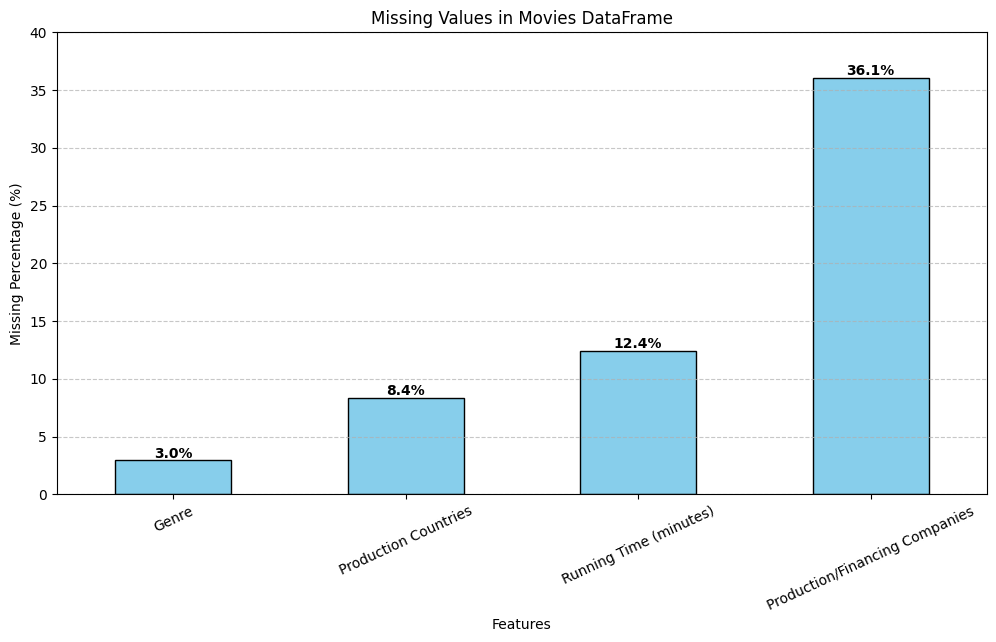

In [ ]:
# Select specific columns to visualize (to make meaningful comparison)
columns_to_plot = ['Genre', 'Production Countries', 'Running Time (minutes)',
                   'Production/Financing Companies']

# Filter the missing percentage for these columns
filtered_missing = missing_percentage.loc[columns_to_plot]

# Create the bar chart
plt.figure(figsize=(12, 6))
ax = filtered_missing.plot(kind='bar', color='skyblue', edgecolor='black')

# Add percentage values on top of each bar
for index, value in enumerate(filtered_missing):
    plt.text(index, value + 0.2, f"{value:.1f}%", ha='center', fontsize=10, fontweight='bold')

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Missing Percentage (%)")
plt.title("Missing Values in Movies DataFrame")
plt.xticks(rotation=25)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis limit
plt.ylim(0, 40)

# Show the plot
plt.show()

**Comment**: `movies_df` contain a large number of missing values. Those missing values can be imputed with the use of `tmdb_df` (thats one of the reasons why we readed this dataset)

**Note**:
- In the plot, we chose the 5 features above to make a meaningful comaprison before and after imputation.

**Question**, are the movies in the `movies_df` and `TMDB_df` duplicated? For example, is the feature containing the movie title has similar entries?

**`Please note that the answer was generated based on analysis not assumptions`**

**Answer**: Some movie titles are duplicated for both dataframes. The reason for this might be for "movie remake" purposes. For instance, the very famous movie "Robin Hood" has 2 versions recorded in the first dataset (`movies_df`) and 13 versions in the second dataset (`tmdb_df`), with each has its own budget and release date.

**What to do?**

Should we just drop the duplicated records in the `movies_df`? No, we will lose information.

To save the "movie remakes", we have to merge the two dataframes but based on 2 features, `movie title` and `release date`.

This sounds straight forward, but alot of time was spent on this step alone because there is no matching unique key for the movies.

In [ ]:
#rename the features in `movies_df` dataframe so we can compair with the `tmdb_df`
movies_df = movies_df.rename(columns={"Movie Name": "title", "Release Date": "release_date"})

In [ ]:
#since we have recorded the movies above, lets drop them from the original dataframe
movies_df = movies_df.dropna(subset=['release_date'])

movies_df = movies_df.sort_values('release_date')

**Merging the `tmdb_df` with `movies_df`**:

**Comment**: While trying to merge the dataframes in ALOT of different ways, below are some of the challenges we faced:
- Overall, there is inconsistency on how both datasets have recorded the `release_date` feature, making it a challenge to merge using this feature.
- Older movies seem to have VERY inconsistent release dates, with a difference in periods some cases go beyond  365 days!

- Newer movies seem to have also inconsistency in `release_date` feature but go to 90 - 200 days.

**Possible solution**: We discovered a merging function called merge_asof(). This function works well with merging the "fuzzy" records (records that contain inconsistent data). To make the merge more reliable and consistent, we decided to cut the `movies_df` into 3 parts:
- Older movies (ranging before 2000-01-01)
- Newer movies (ranging from 2000-01-01 to 2025-01-20)
- Movies still in production (beyond 2025-01-20)

In [ ]:
#First split, movies beyond 2025-1-20
#(why this date? because the dataset on Kaggle was updated before 2 months from now!)
unreleased_movies = movies_df[movies_df['release_date'] > pd.Timestamp('2025-1-20')]

#the "~" operator is used as a negation, undo what we just did in the line above
movies_df = movies_df[~(movies_df['release_date'] > pd.Timestamp('2025-1-20'))]

In [ ]:
#Second split, all movies before 2000-01-01 are considered as old (domain knowledge)
old_movies = movies_df[movies_df['release_date'] < pd.Timestamp('2000-01-01')]

#the "~" operator is used as a negation, undo what we just did in the line above
movies_df = movies_df[~(movies_df['release_date'] < pd.Timestamp('2000-1-01'))]

#thid split, no need to make it, since `movies_df`
#now contain the movies between 2000-01-01 and 2025-1-20 inclusive!

In [ ]:
#verification of what have been done:

print("The shape of old_movies dataframe along with smallest and biggest date:\n",
      old_movies.shape, old_movies['release_date'].min(), old_movies['release_date'].max())

print() #space

print("The shape of movies_df dataframe along with smallest and biggest date:\n",
      movies_df.shape, movies_df['release_date'].min(), movies_df['release_date'].max())

print() #space

print("The shape of unreleased_movies dataframe along with smallest and biggest date:\n",
      unreleased_movies.shape, unreleased_movies['release_date'].min(), unreleased_movies['release_date'].max())

The shape of old_movies dataframe along with smallest and biggest date:
 (1260, 32) 1969-04-01 00:00:00 1999-12-31 00:00:00

The shape of movies_df dataframe along with smallest and biggest date:
 (5000, 32) 2000-01-12 00:00:00 2025-01-17 00:00:00

The shape of unreleased_movies dataframe along with smallest and biggest date:
 (160, 32) 2025-01-22 00:00:00 2068-12-11 00:00:00


In [ ]:
#sorting the dataframes just so we can use the pd.merge_asof()
old_movies = old_movies.sort_values(by='release_date')
movies_df = movies_df.sort_values(by='release_date')

In [ ]:
#read the cleaned version of `tmdb_df`
tmdb_df = pd.read_csv('/content/drive/MyDrive/Datasets/Cleaned Datasets/TMDB_cleaned.csv')

tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

In [ ]:
#perform the merge
merged_df1 = pd.merge_asof(
    old_movies,                       #first dataframe
    tmdb_df,                          #second dataframe
    left_on='release_date',           #the feature we want to merge on
    right_on='release_date',          #the feature we want to merge on
    by='title',                       #compair the above feature with `title`
    direction='nearest',              #how to choose? nearest. Some other parameters exits
    tolerance=pd.Timedelta(days=365)  #in the range of -365 and +365 from the original date
)

merged_df2 = pd.merge_asof(
    movies_df,
    tmdb_df,
    left_on='release_date',
    right_on='release_date',
    by='title',
    direction='nearest',
    tolerance=pd.Timedelta(days=180)
)

#Notice how the "tolerance" parameter was set to 365 days in `merged_df1` because older
#movies tend to have very inconsistent difference (discussed above, in the comment cell)

#In the contrary, the "tolerance" parameter was set to 180 days in `merged_df2` because
#newer movies have less inconsistency (discussed above, in the comment cell)

In [ ]:
#concatinating the two outputed dataframes
stacked_df = pd.concat([merged_df1, merged_df2], ignore_index=True)

#why we chose 'status' feature? because it does not contain any null. Infact, we can use any feature here
print("Number of movies that did not find a match:", stacked_df[stacked_df['status'].isna()].shape[0])

Number of movies that did not find a match: 1438


**Comment**: Not all the records have a match with the TMDB database. We got as mentioned above, 1438 records with no match (meaning that we have NaN in the other side of the final dataframe)

Possible reasons:
1. Very old move, not found in TMDB database.
2. Recent movie, still not recorded in the TMDB database.
3. Incorrect way of matching (possibly a small number of records)

**NOTE**: Regarding number 3, we spent merging the dataframes over 6 hours! the way we did it above got the lowest number of unmatched records.

**NOTE**: The dataframe stacked_df is created by merging two dataframes, which contain several similar features (e.g., `runtime` and `Running Time (minutes)`). To clean the data, we will retain one version of each duplicate feature while ensuring it is filled with values from the feature we drop.

In [ ]:
#feature one `Running Time (minutes)`:
print("Runtime feature available in one record but not the other:", stacked_df[stacked_df['runtime'].notnull() & stacked_df['Running Time (minutes)'].isnull()].shape[0])
stacked_df.loc[stacked_df['Running Time (minutes)'].isnull(), 'Running Time (minutes)'] = stacked_df['runtime']

print()

#feature two `Genre`
print("Genre feature available in one record but not the other:", stacked_df[stacked_df['genres'].notnull() & stacked_df['Genre'].isnull()].shape[0])
stacked_df.loc[stacked_df['Genre'].isnull(), 'Genre'] = stacked_df['genres']

print()

#feature three `Production/Financing Companies`
print("Production/Financing Companies feature available in one record but not the other:", stacked_df[stacked_df['production_companies'].notnull() & stacked_df['Production/Financing Companies'].isnull()].shape[0])
stacked_df.loc[stacked_df['Production/Financing Companies'].isnull(), 'Production/Financing Companies'] = stacked_df['production_companies']

print()

#feature four `Production Countries`
print("Production Countries feature available in one record but not the other:", stacked_df[stacked_df['main_country'].notnull() & stacked_df['Production Countries'].isnull()].shape[0])
stacked_df.loc[stacked_df['Production Countries'].isnull(), 'Production Countries'] = stacked_df['main_country']

print()

#feature five `Worldwide Gross (USD)`
print("Production/Financing Companies feature available in one record but not the other:", stacked_df[(stacked_df['revenue'].notnull()) & (stacked_df['Worldwide Gross (USD)'] == 0)].shape[0])
stacked_df.loc[stacked_df['Worldwide Gross (USD)'] == 0, 'Worldwide Gross (USD)'] = stacked_df['revenue']

Runtime feature available in one record but not the other: 412

Genre feature available in one record but not the other: 77

Production/Financing Companies feature available in one record but not the other: 1430

Production Countries feature available in one record but not the other: 360

Production/Financing Companies feature available in one record but not the other: 172


In [ ]:
#pandas will do the math manually for every column
missing_percentage = (stacked_df.isna().sum() / len(stacked_df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)

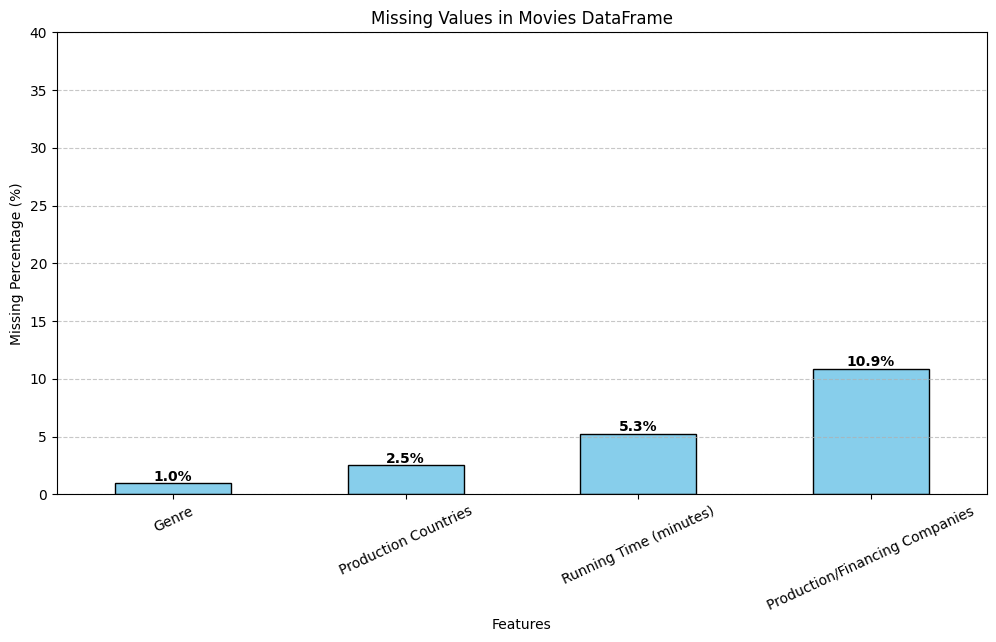

In [ ]:
# Select specific columns to visualize
columns_to_plot = ['Genre', 'Production Countries', 'Running Time (minutes)',
                   'Production/Financing Companies']

# Filter the missing percentage for these columns
filtered_missing = missing_percentage.loc[columns_to_plot]

# Create the bar chart
plt.figure(figsize=(12, 6))
ax = filtered_missing.plot(kind='bar', color='skyblue', edgecolor='black')

# Add percentage values on top of each bar
for index, value in enumerate(filtered_missing):
    plt.text(index, value + 0.2, f"{value:.1f}%", ha='center', fontsize=10, fontweight='bold')

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Missing Percentage (%)")
plt.title("Missing Values in Movies DataFrame")
plt.xticks(rotation=25)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis limit
plt.ylim(0, 40)

# Show the plot
plt.show()

In [ ]:
#filling the missing values
for col in stacked_df.columns:
  if pd.api.types.is_numeric_dtype(stacked_df[col]):  # Check if column is numerical
    stacked_df[col] = stacked_df[col].fillna(0)

  else:  # Otherwise, it's categorical
    stacked_df[col] = stacked_df[col].fillna("Unknown")

**Comment**: Notice below how we dropped both `Worldwide Box Office (USD)` and `Domestic Box Office (USD)` since according to the dataset auther, they are redundent with `Domestic Gross (USD)` and `Worldwide Gross (USD)`.

Read for more details: [link](https://www.kaggle.com/datasets/michaelmatta0/movies-ultimate-metrics-features-and-metadata/discussion/570368).

In [ ]:
#drop redundent features
stacked_df = stacked_df.drop(
    columns=[
        'id', 'Domestic Box Office (USD)', 'Worldwide Box Office (USD)',
        'International Box Office (USD)', 'Legs', 'Infl. Adj. Dom. BO (USD)',
        'Video Release', 'Keywords', 'Franchise', 'genres', 'main_country',
        'Languages', 'International Releases', 'Domestic Releases', 'revenue',
        'status', 'budget', 'genres', 'Movie URL', 'production_companies',
        'holidays_name', 'is_holiday', 'runtime'
    ]
)

**Cleansing**

In [ ]:
#set a list of most important contries
priority_countries = ["United States", "United States of America", "United Kingdom",
                      "Australia", "Republic of Korea", "France", "Italy", "Spain", "Canada", "Japan"]

#create a function that is hybrid (either selects a priority country or the first country)
def extract_main_country(country_str):
    """Finds a priority country; otherwise, takes the first valid country."""
    if pd.isna(country_str) or country_str == "Unknown":
        return "Unknown"

    countries = [c.strip() for c in country_str.split(",") if c.strip() != "Unknown"]  # Remove spaces & ignore "Unknown"

    #if list is empty
    if not countries:
        return "Unknown"

    # Check if any priority country exists in the list
    for country in countries:
        if country in priority_countries:
            return country  # Return the first priority country found

    return countries[0]  # Default to the first valid country

#call the function
stacked_df['main_country'] = stacked_df['Production Countries'].apply(extract_main_country)

#dropping the `Production Countries` feature
stacked_df = stacked_df.drop(columns=['Production Countries'])

In [ ]:
def clean_genre(value):
  value = value.strip()  # Remove spaces/tabs
  value = value.replace("Thriller/Suspense", "Thriller")  # Standardize synonyms
  value = value.replace("Romantic Comedy", "Romance, Comedy")  # Ensure consistent order
  value = value.replace("Concert/Performance", "Music")  # Simplify
  value = value.replace("Reality", "Documentary")  # Often overlaps
  value = value.replace("TV Movie", "Multiple Genres")  # TV Movies span multiple genres
  return value

#call the function
stacked_df['Genre'] = stacked_df['Genre'].apply(clean_genre)

In [ ]:
def clean_production_method(value):
  method = value.strip()
  if "Animation" in method:
    return "Animation"
  return value

#call the function
stacked_df['Production Method'] = stacked_df['Production Method'].apply(clean_production_method)

In [ ]:
#simplify the production companies (the function was made in the Data Engineering, TMDB section)
stacked_df["simplified_companies"] = stacked_df["Production/Financing Companies"].apply(simplify_production_companies)

In [ ]:
#clean the `Genre` feature
stacked_df['Genre'] = stacked_df['Genre'].apply(lambda x: x if ',' not in x else 'Multiple Genres')

In [ ]:
#fixing the unique values under `Source` feature
source_mapping = {
    'Based on Movie': 'Based on Movie',
    'Based on Fiction Book/Short Story': 'Based on a Book',
    'Based on Factual Book/Article': 'Based on a Book',
    'Based on Religious Text': 'Based on a Book',
    'Original Screenplay': 'Original Screenplay',
    'Unknown': 'Unknown',
    'Based on Play': 'Based on a Play/Musical',
    'Based on Musical or Opera': 'Based on a Play/Musical',
    'Based on Ballet': 'Based on a Play/Musical',
    'Based on Real Life Events': 'Based on Real-Life Events',
    'Remake': 'Remake',
    'Based on Comic/Graphic Novel': 'Based on a Comic/Graphic Novel',
    'Based on TV': 'Based on a TV Show',
    '\tBased on TV': 'Based on a TV Show',  # Fixes tab issue
    'Based on Web Series': 'Based on a TV Show',
    'Based on Folk Tale/Legend/Fairytale': 'Based on a Folk Tale/Legend',
    'Based on Poem': 'Based on a Poem',
    'Based on Game': 'Based on a Game',
    'Based on Short Film': 'Based on a Short Film',
    'Based on Toy': 'Based on a Toy',
    'Based on Musical Group': 'Based on a Music-Related Source',
    'Based on Song': 'Based on a Music-Related Source',
    'Spin-Off': 'Spin-Off',
    'Compilation': 'Compilation',
    'Based on Theme Park Ride': 'Based on a Theme Park Ride'
}

#apply mapping to the `Source` feature
stacked_df['Source'] = stacked_df['Source'].replace(source_mapping)

In [ ]:
#fixing the unique values under `MPAA Rating` feature

rating_mapping = {
    'G': 'G',
    'PG': 'PG',
    'PG-13': 'PG-13',
    'R': 'R',
    'M/PG': 'M/PG',
    'Unknown': 'Unknown',
    'Not Rated': 'Not Rated',
    'Not RatedNC-17 rating surrendered': 'Not Rated',
    'Not Rated(originally rated NC-17, rating surrendered)': 'Not Rated',
    'Not RatedPassed': 'Not Rated',
    'Open': 'Open',
    'OpenPreviously rated NC-17': 'Open'
}

#merge all variations of NC-17 into a single category
nc17_variations = [
    'NC-17', 'NC-17Rated X', 'NC-17for substantial graphic horror violence and gore.',
    'NC-17for nudity and erotic sexuality throughout, and for some graphic language and sexual violence',
    'NC-17for a wide range of perversions in explicit detail.',
    'NC-17for explicit sexual content and dialogue.',
    'NC-17for some explicit sexuality', 'NC-17for a scene of explicit sexual content',
    'NC-17for explicit sexual content.', 'NC-17for a scene of explicit sexual content.(Rating bulletin 2148, 11/24/2010)Rfor strong graphic sexual content, language, and a beating.(Rating bulletin 2151, 12/15/2010)',
    'NC-17for some explicit sexual content.(Rating bulletin 2195, 10/26/2011)',
    'NC-17for explicit sexual content.(Rating bulletin 2286, 8/21/2013)'
]

#apply mapping
stacked_df['MPAA Rating'] = stacked_df['MPAA Rating'].replace(rating_mapping)

#convert all NC-17 variations to 'NC-17'
stacked_df['MPAA Rating'] = stacked_df['MPAA Rating'].replace(nc17_variations, 'NC-17')

In [ ]:
#fixing the values under the `Creative Type` feature
stacked_df['Creative Type'] = stacked_df['Creative Type'].str.strip().replace({
    'Super Hero': 'Superhero',
    '\tScience Fiction': 'Science Fiction'
})

###**Step 3) Feature engineering**

**first list of features: `holiday_name` and `is_holiday` features**:

In [ ]:
#creating the holiday feature
stacked_df['holidays_name'] = stacked_df.apply(get_holiday_for_row, axis=1)

#create `is_holiday` feature based on holiday_name
stacked_df['is_holiday'] = stacked_df['holidays_name'].apply(lambda x: 0 if x == 'No Holiday' else 1)

**second feature `num_of_production_companies`**

In [ ]:
#here, we want to create a function that counts the number of companies that worked
#in producing of a movie (we will use the cleaned version of Production/Financing Companies which is `Simplified Companies`)

def count_production_companies(company_str):
    """Counts the number of production companies, handling 'Unknown' properly."""
    if pd.isna(company_str) or company_str == "Unknown":
        return 0

    return len(company_str.split(","))  # Count companies by splitting on comma

#calling the function
stacked_df['num_of_production_companies'] = stacked_df['simplified_companies'].apply(count_production_companies)

**third, extract data from `Theater counts`**

In [ ]:
#the `Theater counts` feature is a long string, we can extract some useful information
#from this string!
#we can generate 4 new features just from that feature.

#functions to help extract the numerical value in the string
def extract_theater_info(theater_str):
    """Extracts opening theaters, max theaters, avg theaters, and theater ratio from the given text."""
    if pd.isna(theater_str) or "Unknown" in theater_str:  # Handle missing or "Unknown" values
        return -1, -1, -1, -1

    numbers = re.findall(r'\d+', theater_str)  # Extract all numbers from the text

    if len(numbers) < 2:  # Ensure we have at least two numbers
        return -1, -1, -1, -1

    opening_theaters = int(numbers[0])
    max_theaters = int(numbers[1])
    average_run_duration_weeks = int(numbers[2])

    theater_ratio = round(opening_theaters / max_theaters, 2) if max_theaters > 0 else -1

    return opening_theaters, max_theaters, average_run_duration_weeks, theater_ratio

# Apply function to create new features
stacked_df[['opening_theaters', 'max_theaters', 'average_run_duration_weeks', 'theater_ratio']] = stacked_df['Theater counts'].apply(
    lambda x: pd.Series(extract_theater_info(x))
)

#dropping the `Theater counts` feature
stacked_df = stacked_df.drop(columns=['Theater counts'])

**Filling missing values**

In [ ]:
#filling the missing numerical values with -1
for col in stacked_df.columns:
  if col == "is_holiday":
    continue

  elif pd.api.types.is_numeric_dtype(stacked_df[col]):  # Check if column is numerical
    stacked_df[col] = stacked_df[col].replace(0, -1)

##**3) Datasets related to Box Office**

In this section we will use multiple datasets related to **`Box Office`**:

The first dataset is **`Box Office Mojo`**. This dataset was scraped from the [Box Office Mojo](https://www.boxofficemojo.com/year/world/?ref_=bo_nb_yl_tab) website, it is a widely used database for **tracking box office revenue**, providing detailed financial insights into movies worldwide. It collects data on domestic and international earnings. This data was obtained from a Kaggler (he scrapped it and did the heavy work), [dataset link](https://www.kaggle.com/datasets/jonbown/worldwide-box-office-rankings-1977).

--------

**NOTES**:
- The **`Box Office Mojo`** contain 49 .csv files! from 1977 upto 2025, reading them and cleaning them manually is not an option.

- Box Office Mojo seems to display the top 200 performing movies for the year only, which is bad to know the all time revenue in a specific period of time.

--------

The second dataset was found in [GitHub](https://github.com/prasertcbs/basic-dataset/tree/master?tab=readme-ov-file#readme). This repository contains alot of different datasets and among them was the one we choosed.

**NOTES**:
- There was no issued problems with the collector of the dataset so we took his data.

- This dataset was last updated on August of 2019.

--------

The third dataset is the `The Numbers Dataset` that we just cleaned in number 2.

**NOTE**:
- We have contacted the individual who scraped the dataset and he said that the domestic gross represents the domestic box office gross, and the worldwide gross represents the worldwide box office gross, [Link to discussion](https://www.kaggle.com/datasets/michaelmatta0/movies-ultimate-metrics-features-and-metadata/discussion/570368).

--------

**We will be merging those datasets together to gain the approximate worldwide box office gross for the period of time we are interested to analyze**

In [ ]:
# #the main folder path
# folder_path = "/content/drive/MyDrive/Datasets/Box Office Mojo ALOT OF CSV"

# #a list of all available files
# csv_files = glob.glob(folder_path + "/*.csv")

# #read all csv files, generate another feature called `year`
# df_list = []
# for file in csv_files:
#   year = os.path.basename(file).split('_')[-1].split('.')[0]  #extract year from filename
#   df = pd.read_csv(file)
#   df['year'] = int(year)
#   df_list.append(df)

# #concatenate all DataFrames
# merged_df = pd.concat(df_list, ignore_index=True)

###**Step 1) Read the datasets**

In [ ]:
#read the `mojo` dataset
mojo_df = pd.read_csv('/content/drive/MyDrive/Datasets/Not cleaned Datasets/BoxOfficeMojo_NotClean.csv')

#bo: box office
bo_df = pd.read_csv('/content/drive/MyDrive/Datasets/Cleaned Datasets/boxoffice_august_2019.csv')

#tn: the numbers
tn_df = pd.read_csv('/content/drive/MyDrive/Datasets/Cleaned Datasets/TheNumbers_Merged_&_Cleaned_&_Preprocessed.csv')

In [ ]:
#data overview

display(mojo_df.head(3))
print(mojo_df.shape)

display(bo_df.head(3))
print(bo_df.shape)

display(tn_df.head(3))
print(tn_df.shape)

rank                     title     worldwide      domestic domestic_pct  \
0     1  Star Wars: Episode VI...  $252,601,637  $252,583,617         100%   
1     2       Terms of Endearment  $108,423,489  $108,423,489         100%   
2     3                Flashdance   $92,921,203   $92,921,203         100%   

   foreign foreign_pct  year  
0  $18,020       <0.1%  1983  
1        -           -  1983  
2        -           -  1983

(8869, 8)


rank                     title studio  lifetime_gross  year
0     1  Star Wars: The Force ...     BV       936662225  2015
1     2         Avengers: Endgame     BV       857190335  2019
2     3                    Avatar    Fox       760507625  2009

(16542, 5)


title release_date  Production Budget (USD)  \
0             Sweet Charity   1969-04-01                 20000000   
1           Midnight Cowboy   1969-05-25                  3600000   
2  Once Upon a Time in t...   1969-05-28                  5000000   

   Domestic Gross (USD)  Worldwide Gross (USD)  Opening Weekend (USD)  \
0             8000000.0              8000000.0              7297694.0   
1            44785053.0             44796719.0              7297694.0   
2             5321508.0              5380604.0              7297694.0   

  MPAA Rating  Running Time (minutes)               Source    Genre  \
0           G                   149.0       Based on Movie  Musical   
1           R                   113.0      Based on a Book    Drama   
2       PG-13                   165.0  Original Screenplay  Western   

  Production Method         Creative Type Production/Financing Companies  \
0       Live Action  Contemporary Fiction     Fryer Carr and Harris        
1       Live Action  Contemporary Fiction  Florin Productions, J...        
2       Live Action    Historical Fiction  Paramount, Rafran Cin...        

   vote_average  vote_count  adult  popularity   main_country  \
0         6.731        65.0  False       8.359  United States   
1         7.510      1208.0  False      16.687  United States   
2         8.294      3923.0  False      48.342          Italy   

       simplified_companies holidays_name  is_holiday  \
0     Fryer Carr and Harris    No Holiday           0   
1  Amazon MGM, Florin Pr...    No Holiday           0   
2  Paramount, Rafran Cin...    No Holiday           0   

   num_of_production_companies  opening_theaters  max_theaters  \
0                       1.0                  3.0         339.5   
1                       3.0                  3.0         339.5   
2                       3.0                  3.0         339.5   

   average_run_duration_weeks  decade_start decade_of_movie      profit  \
0                       3.0            1960       1960-1969 -12000000.0   
1                       3.0            1960       1960-1969  41196719.0   
2                       3.0            1960       1960-1969    380604.0   

   profit_abs  year  dot_size  gross_to_budget_ratio  
0  12000000.0  1969  5.066997               0.400000  
1  41196719.0  1969  5.230003              12.443533  
2    380604.0  1969  5.002125               1.076121

(5427, 32)


###**Step 2) Data understanding and cleansing**

In [ ]:
#what is the number of duplicated records?
print("There are", mojo_df.duplicated().sum(), "duplicated records")

#drop the not matching features (and they are not necessary)
mojo_df = mojo_df.drop(columns=['domestic', 'domestic_pct', 'foreign', 'foreign_pct', 'rank'])

#what is the of missing values?
print("There are", mojo_df.isna().sum().sum(), "missing records")

#what is the oldest and newest Box Office data we have?
print("Oldest year recorded for box office:", mojo_df['year'].min())
print("Newest year recorded for box office:", mojo_df['year'].max())

There are 0 duplicated records
There are 0 missing records
Oldest year recorded for box office: 1980
Newest year recorded for box office: 2025


In [ ]:
#what is the number of duplicated records?
print("There are", bo_df.duplicated().sum(), "duplicated records")

#change the feature name to make it match the mojo dataframe
bo_df = bo_df.rename(columns={'lifetime_gross': 'worldwide'})

#drop the not matching features (and they are not necessary)
bo_df = bo_df.drop(columns=['rank', 'studio'])

#what is the of missing values?
print("There are", bo_df.isna().sum().sum(), "missing records")

#filter the dataset to only include records 1980 onward
bo_df = bo_df[bo_df['year'] >= 1980]

#what is the oldest and newest Box Office data we have?
print("Oldest year recorded for box office:", bo_df['year'].min())
print("Newest year recorded for box office:", bo_df['year'].max())

There are 0 duplicated records
There are 0 missing records
Oldest year recorded for box office: 1980
Newest year recorded for box office: 2019


In [ ]:
#what is the number of duplicated records?
print("There are", tn_df.duplicated().sum(), "duplicated records")

#change the feature name to make it match the mojo dataframe
tn_df = tn_df.rename(columns={'Worldwide Gross (USD)': 'worldwide'})

#change the dtype of `release_date`
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])

#extract the year
tn_df['year'] = tn_df['release_date'].dt.year

#drop the not matching features (and they are not necessary)
tn_df = tn_df.drop(columns=['MPAA Rating', 'Production Budget (USD)',
                            'Running Time (minutes)',	'Source',	'Genre',	'Production Method',
                            'Creative Type', 'vote_average', 'simplified_companies',
                            'vote_count',	'adult', 'main_country', 'max_theaters',
                            'num_of_production_companies', 'opening_theaters',
                            'average_run_duration_weeks', 'release_date', 'Domestic Gross (USD)'
                            ])

#filtering the missing values (domain knowledge)
tn_df = tn_df[tn_df['worldwide'] != -1]

#what is the of missing values?
print("There are", tn_df.isna().sum().sum(), "missing records")

#filter the dataset to only include records 1980 onward
tn_df = tn_df[tn_df['year'] >= 1980]

#what is the oldest and newest Box Office data we have?
print("Oldest year recorded for box office:", tn_df['year'].min())
print("Newest year recorded for box office:", tn_df['year'].max())

There are 0 duplicated records
There are 0 missing records
Oldest year recorded for box office: 1980
Newest year recorded for box office: 2025


In [ ]:
#Data cleaning

#sort the dataframes by year
mojo_df = mojo_df.sort_values(by='year')
mojo_df = mojo_df.reset_index(drop=True)

bo_df = bo_df.sort_values(by='year')
bo_df = bo_df.reset_index(drop=True)

tn_df = tn_df.sort_values(by='year')
tn_df = tn_df.reset_index(drop=True)

In [ ]:
#function to extract and convert the dollar amount
def extract_amount(value):
  if isinstance(value, str):
    num = re.match(r'\$([\d,]+)', value)  #get the number of characters

    if num:
      return int(num.group(1).replace(',', ''))  #remove commas and convert to integer

  return None  #return nothing for non-matching values

#apply the function
mojo_df['worldwide'] = mojo_df['worldwide'].apply(extract_amount)

In [ ]:
#data overview

display(mojo_df.head(3))

display(bo_df.head(3))

display(tn_df.head(3))

title  worldwide  year
0              Heart Beat     954046  1980
1          One-Trick Pony     843215  1980
2  Those Lips, Those Eyes     804713  1980

title  worldwide  year
0  The Blue Lagoon   58853106  1980
1   Loving Couples    2806659  1980
2  In God We Trust    5215015  1980

title   worldwide  Opening Weekend (USD)  \
0  Private Benjamin  69847348.0              4739769.0   
1       Raging Bull  23417649.0               128590.0   
2      Flash Gordon  27176825.0              3934030.0   

  Production/Financing Companies  popularity holidays_name  is_holiday  \
0     Warner Bros. Pictures            9.222    No Holiday           0   
1            United Artists           27.108    No Holiday           0   
2  Dino De Laurentiis Co...           18.503    No Holiday           0   

   decade_start decade_of_movie      profit  profit_abs  year  dot_size  \
0          1980       1980-1989  54847348.0  54847348.0  1980  5.306215   
1          1980       1980-1989   5417649.0   5417649.0  1980  5.030247   
2          1980       1980-1989  -7823175.0   7823175.0  1980  5.043677   

   gross_to_budget_ratio  
0               4.656490  
1               1.300981  
2               0.776481

In [ ]:
#create a new df and concatenate them together
combined_df = pd.concat([mojo_df, bo_df, tn_df], axis=0, ignore_index=True)

In [ ]:
#the number of records in the dataframes
print("Mojo dataframe:", mojo_df.shape[0])
print("Box Office dataframe:", bo_df.shape[0])
print("The number dataframe:", tn_df.shape[0])

print() # space

print("The combined dataframe:", combined_df.shape[0])

Mojo dataframe: 8869
Box Office dataframe: 16160
The number dataframe: 5312

The combined dataframe: 30341


**Comment**: After doing all that, now we want to drop the duplicated movie titles, to ensure that the movie is not counted multiple times.

In [ ]:
#dropping the duplicated movie titles
combined_df = combined_df.drop_duplicates(subset='title')

In [ ]:
#what is the number of records after dropping duplications?
print("The combined dataframe after dropping duplications:", combined_df.shape[0])

#reset the index
combined_df = combined_df.reset_index(drop=True)

The combined dataframe after dropping duplications: 19731


###**Step 3) Feature engineering**

In [ ]:
#generating a feature `decade`
combined_df['decade'] = (np.floor(combined_df['year'] / 10) * 10).astype(int)
combined_df['decade'] = combined_df['decade'].astype(str) + '-' + (combined_df['decade'] + 9).astype(str)

#**Extra Preprocessing for Consistency**

This preprocessing step is essential to ensure consistency across all visualization graphs.

- Preprocessing will be applied exclusively to the `The Numbers` dataset, as it will be the primary source for our visualizations.

- The `TMDB` dataset will be excluded from this phase since it won’t be used for visualization purposes.

- The `Box Office` dataset will also be excluded, as it is already consistent, requires no additional cleaning, and will not be used for machine learning.

When and why we performed this step?
- During the machine learning phase, the model did not learn properly so we suspected an issue with data. Preprocessing was proposed to improve the performance of the model.

**NOTE**:
- The data will be preprocessed to ensure the data is consistent

In [ ]:
#read the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/Not cleaned Datasets/TheNumbers_Merged_&_Cleaned.csv')

In [ ]:
#checking the number of missing values for numerical features
#recall in the data engineering part, we replaced null numerical values with -1

#replacing -1 with nan
df = df.replace({-1: np.nan})

percentage_of_missing = df.isnull().sum().sort_values(ascending = False)/df.shape[0]*100

#print the missing value percentage
percentage_of_missing[percentage_of_missing != 0]

Est. Domestic Blu-ray Sales (USD)        64.683140
Est. Domestic DVD Sales (USD)            57.034796
Total Est. Domestic Video Sales (USD)    54.832745
theater_ratio                            43.519919
vote_average                             22.625651
vote_count                               22.625651
popularity                               21.869222
average_run_duration_weeks               13.262733
max_theaters                             13.145066
opening_theaters                         13.061019
Opening Weekend (USD)                    13.044209
num_of_production_companies              10.102538
Domestic Share Percentage                 8.841822
Domestic Gross (USD)                      8.757774
Worldwide Gross (USD)                     4.269625
Running Time (minutes)                    3.832577
dtype: float64

**Comments**:

1. The features:
- - Est. Domestic Blu-ray Sales (USD)
- - Est. Domestic DVD Sales (USD)
- - Total Est. Domestic Video Sales (USD)
- - theater_ratio

Will be dropped, due to the very high number of missing values.

Additionally, The features "Domestic Share Percentage" will also be dropped since it carry noisy information gathered from the features that are fille with missing valus.

-----

2. We will drop the empty records in "Worldwide Gross (USD)" since it is our target.

-----
3. The other features will be imputed using the simple imputer from sklearn library.
- - Mean for almost normal distribution
- - Median for skewed data

In [ ]:
#dropping the features
df = df.drop(columns=['Est. Domestic Blu-ray Sales (USD)', 'Est. Domestic DVD Sales (USD)','theater_ratio',
                      'Total Est. Domestic Video Sales (USD)', 'Domestic Share Percentage'])

In [ ]:
#drop the records that contain null values for our target
df = df.dropna(subset=['Worldwide Gross (USD)'])

**Important cell, data entry issue**

In [ ]:
#removing records with unrealistic production budgets and revenue scales (data entry issue)
#some movies seem to make very small revenue (lets say 300 USD) but spend millions in production
#such thing might accure, and its a valid phenomena. What is not valid though is why those movies have
#high number of theater visitings? This suggest wrong data entry, they must be removed.

#This observation was discussed and apply to improve the machine learning step!
#Hence, we will compair our model before/after removing the data entry errors.

#why use describe? to check the minimum value, and standard diviation before changes
df['Worldwide Gross (USD)'].describe()

#creating the ratio, we will filter based on it
df['gross_to_budget_ratio'] = df['Worldwide Gross (USD)'] / df['Production Budget (USD)']

#important note is that we analyzed the excel sheet manually before committing the changes. vvvv
'''
possible_outlier_movies = df.dropna(subset=['Production Budget (USD)', 'Worldwide Gross (USD)', 'gross_to_budget_ratio'])[
    ['title', 'Production Budget (USD)', 'Worldwide Gross (USD)', 'gross_to_budget_ratio']
].sort_values(by='gross_to_budget_ratio', ascending=True, ignore_index=True).head(1500)
possible_outlier_movies
'''

initial_count = len(df)

#drop records with NaNs in the ratio before comparison
df = df[df["gross_to_budget_ratio"].notna()]
df = df[df["gross_to_budget_ratio"] >= 0.05]

removed_count = initial_count - len(df)
print(f"Removed {removed_count} movies out of {initial_count}")

Removed 268 movies out of 5695


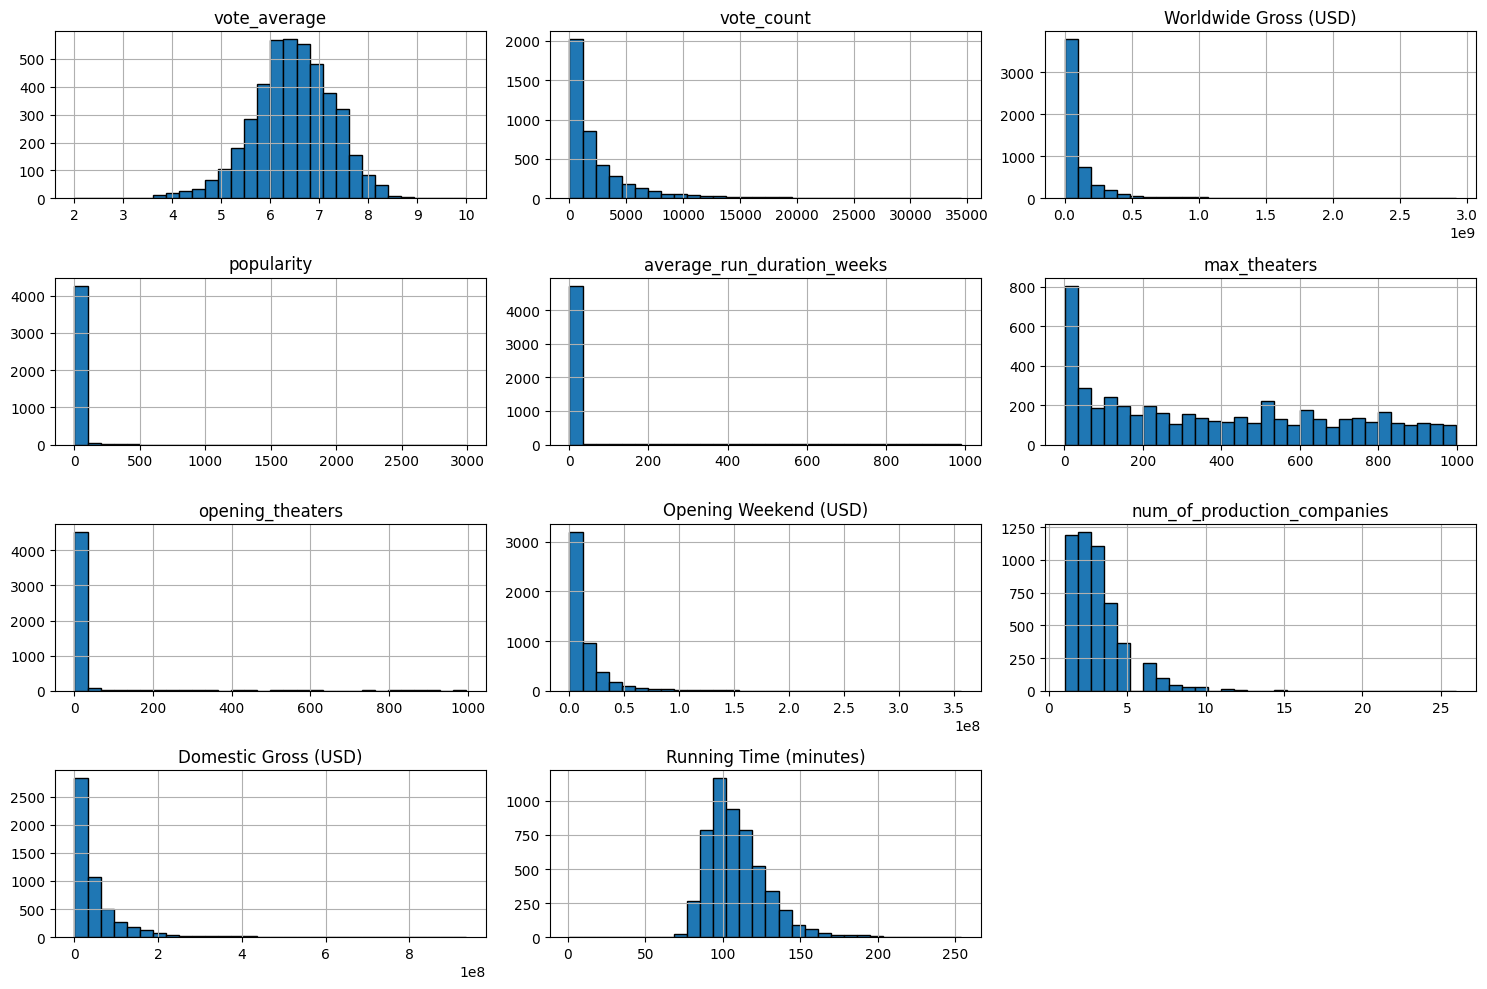

In [ ]:
#declare the features we want to visualize in a list
#(to learn there distribution, to choose the right imputation technique)
features = [
    'vote_average', 'vote_count', 'Worldwide Gross (USD)',
    'popularity', 'average_run_duration_weeks',
    'max_theaters', 'opening_theaters', 'Opening Weekend (USD)',
    'num_of_production_companies', 'Domestic Gross (USD)',
    'Running Time (minutes)',
]

#using our library, VizDat to check the distribution
df[features].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

**Comment**: All features will be imputed using the median, as they show skewed distributions. The only exceptions are Running Time (minutes) and vote_average, which have almost symmetrical distributions for these, we will apply mean imputation.

In [ ]:
#list of features, sorted for mean and median imputer
median_features = [
    'vote_count', 'Worldwide Gross (USD)',
    'popularity', 'average_run_duration_weeks',
    'max_theaters', 'opening_theaters', 'Opening Weekend (USD)',
    'num_of_production_companies', 'Domestic Gross (USD)',
]

mean_features = ['Running Time (minutes)', 'vote_average']

#median imputer
median_imputer = SimpleImputer(strategy='median')
df[median_features] = median_imputer.fit_transform(df[median_features])

#mean imputer
mean_imputer = SimpleImputer(strategy='mean')
df[mean_features] = mean_imputer.fit_transform(df[mean_features])

In [ ]:
percentage_of_missing = df.isnull().sum().sort_values(ascending = False)/df.shape[0]*100

#print the missing value percentage
percentage_of_missing[percentage_of_missing != 0]

Series([], dtype: float64)

**Comment**: All missing values were delt with.

#**Data Visualization**

-----

In this step, we'll analyze cleaned movie datasets

-----

What softwares we used to generate visualizations?
1. Python: Matplotlib, Plotly
2. Microsoft Power PI
3. Microsoft Excel

##**Question one**: How many movies were produced each decade?

The official website [IMDB](https://www.imdb.com/), has Advanced title search were it can count the number of movies produced in every month, year, or even decade.

The data for this question was gathered from the official IMDB website, link of the tabs are below:
- [1980 - 1989 number of movie data](https://www.imdb.com/search/title/?title_type=feature&release_date=1980-01-01,1989-12-31)
- [1990 - 1999 number of movie data](https://www.imdb.com/search/title/?title_type=feature&release_date=1990-01-01,1999-12-31)
- [2000 - 2009 number of movie data](https://www.imdb.com/search/title/?title_type=feature&release_date=2000-01-01,2009-12-31)
- [2010 - 2019 number of movie data](https://www.imdb.com/search/title/?title_type=feature&release_date=2010-01-01,2019-12-31&sort=alpha,asc)



In [ ]:
#create a dataframe of the decade and number of movies produced in the corresponding decade
df = pd.DataFrame({
    'Decade': ['1980-1989', '1990-1999', '2000-2009', '2010-2019'],
    'Number_of_movies': [40729, 44713, 77797, 167536]
})

In [ ]:
#getting the median to make the colors more friendly in the plot
midpoint = df['Number_of_movies'].median()

#create an interactive bar chart
fig = px.bar(
    df, x='Decade', y='Number_of_movies',
    title='Number of Movies Produced per Decade',
    labels={'Number_of_movies': 'Number of Movies Produced', 'Decade': 'Decade'},

    hover_name='Decade',
    hover_data={'Decade': False},

    color='Number_of_movies', #the features we want to make colors for
    color_continuous_scale='oranges', #set the color
    color_continuous_midpoint=midpoint #set the midpoint (for better color startpoint)
)

#adding the number of movies on the top of bars
fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))

#enhancements for the graph (bigger font)
fig.update_layout(
    xaxis=dict(title_font=dict(size=18), tickfont=dict(size=16)),
    yaxis=dict(range=[0, 200000], title_font=dict(size=18), tickfont=dict(size=16)),
    title=dict(font=dict(size=22))
)

#show the figure
fig.show()

**Comment**: We can see clearly that the movie industry is a growing industry, with thousands of movies produced every year. This trend also indicates that the movie industry is getting more competitive, meaning that as a production company, you must understand the audience preferences to ensure movie success.

##**Question two**: What are the Most Popular Movie Genres, and why is it popular?

**`To solve this question, we will be using the second dataset, The Numbers`**.

In [ ]:
#read the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/Cleaned Datasets/TheNumbers_Merged_&_Cleaned_&_Preprocessed.csv')

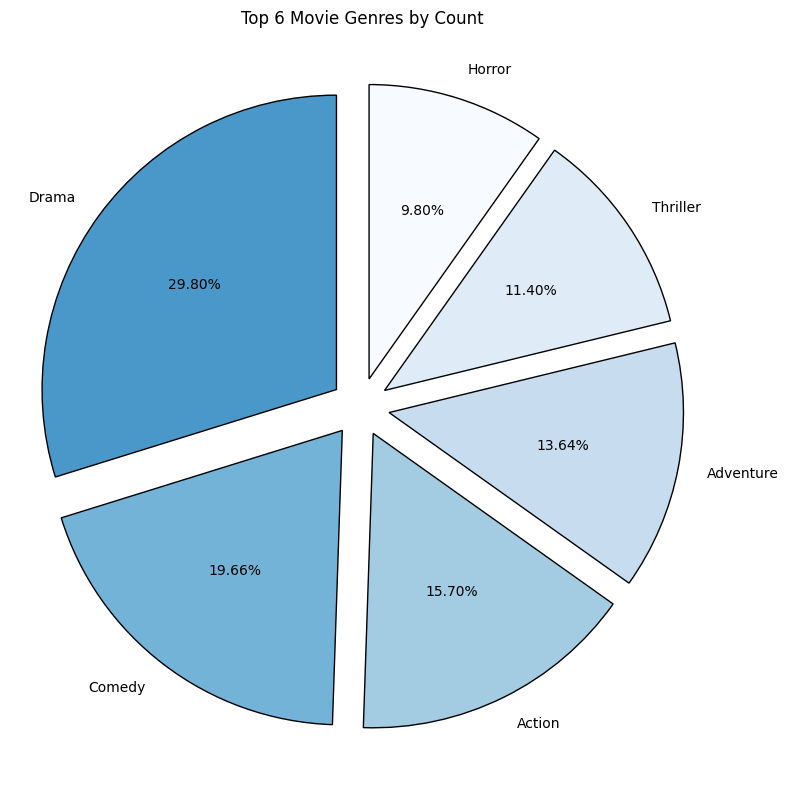

In [ ]:
#remove the Unknown genra
df = df[df['Genre'].str.lower() != 'unknown']

#group by genres and count the number of movies in each genre
genre_counts = df['Genre'].value_counts().head(6)  #getting the first 6 records

#labels and values for the pie chart
labels = genre_counts.index
sizes = genre_counts.values

#explode the slices (slightly pull out each slice)
explode = [0.1] * len(labels)

#create the pie chart with a different color scheme
colors = plt.cm.Blues_r(np.linspace(0.4, 1, 6))

#ploting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, explode=explode, colors=colors, wedgeprops=dict(edgecolor='black'))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Top 6 Movie Genres by Count")
plt.tight_layout()
plt.show()

**Comment**: We can see that Drama is the most common genre, making up nearly 30% of the dataset. Why might that be the case?

"Take a look at the chart below"

In [ ]:
#select the same genres as above
selected_genres = ['Drama', 'Comedy', 'Action', 'Adventure', 'Thriller', 'Horror']

#filter your DataFrame
df_filtered = df[df['Genre'].isin(selected_genres)]

In [ ]:
#grouping the data based on the genres
grouped_df = df_filtered.groupby('Genre').agg(
    num_of_movies=('title', 'count'),
    profit=('profit', 'mean'),
    revenue=('Worldwide Gross (USD)', 'mean'),
    budget=('Production Budget (USD)', 'mean')
).reset_index()

grouped_df = grouped_df.sort_values(by='profit', ascending=False).reset_index(drop=True).head(6)

In [ ]:
#overview of the created dataframe
grouped_df

Genre  num_of_movies        profit       revenue        budget
0  Adventure            650  1.918940e+08  2.738461e+08  8.195211e+07
1     Action            748  1.500286e+08  2.259001e+08  7.587147e+07
2     Horror            467  5.298869e+07  7.053505e+07  1.754636e+07
3     Comedy            937  4.580665e+07  7.138009e+07  2.557344e+07
4   Thriller            543  4.326945e+07  7.556810e+07  3.229865e+07
5      Drama           1420  3.370696e+07  5.487215e+07  2.116519e+07

In [ ]:
#.melt() is a pandas function
df_melted = grouped_df.melt(
    id_vars=['Genre', 'num_of_movies'], #the feature that we want to leave unchanged
    value_vars=['profit', 'revenue', 'budget'], #those features will transfer into rows
    var_name='Financials', #the features that are now rows, what is there column name?
    value_name='Amount' #the features that are not mentioned, what is there column name?
)

#.pivot_table() (to make hovering more useful)
df_pivoted = df_melted.pivot_table(
    index=['Genre', 'num_of_movies'],
    columns='Financials',
    values='Amount'
).reset_index()

#to make it a meaningful comparison between the genres
df_pivoted['avg_profit'] = df_pivoted['profit'] / df_pivoted['num_of_movies']
df_pivoted['avg_revenue'] = df_pivoted['revenue'] / df_pivoted['num_of_movies']
df_pivoted['avg_budget'] = df_pivoted['budget'] / df_pivoted['num_of_movies']

#sorting based on the average profit
df_pivoted = df_pivoted.sort_values(by='avg_budget', ascending=True).reset_index(drop=True)

#overview
df_pivoted

Financials      Genre  num_of_movies        budget        profit  \
0               Drama           1420  2.116519e+07  3.370696e+07   
1              Comedy            937  2.557344e+07  4.580665e+07   
2              Horror            467  1.754636e+07  5.298869e+07   
3            Thriller            543  3.229865e+07  4.326945e+07   
4              Action            748  7.587147e+07  1.500286e+08   
5           Adventure            650  8.195211e+07  1.918940e+08   

Financials       revenue     avg_profit    avg_revenue     avg_budget  
0           5.487215e+07   23737.293127   38642.356362   14905.063235  
1           7.138009e+07   48886.504798   76179.396324   27292.891526  
2           7.053505e+07  113466.145042  151038.645260   37572.500218  
3           7.556810e+07   79685.918708  139167.773664   59481.854956  
4           2.259001e+08  200573.038346  302005.487137  101432.448790  
5           2.738461e+08  295221.500720  421301.671676  126080.170956

In [ ]:
#making the plot
fig = px.bar(
    df_pivoted,
    x='Genre',
    y='avg_budget',
    color_discrete_sequence=['#fc4747'],
    labels={
        'Genre': 'Genre',
        'avg_profit': 'Avg. Profit per Movie',
        'avg_revenue': 'Avg. Revenue per Movie',
        'avg_budget': 'Avg. Budget per Movie',
    },
    title='🎬 Average Movie Budget by Genre',

    hover_name='Genre',
    hover_data={
        'num_of_movies': True,
        'avg_revenue': ':,.0f',
        'avg_budget': ':,.0f',
        'avg_profit': ':,.0f',
        'Genre': False
    }
)

#add edge color
fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))

#update the figure
fig.update_layout(
    xaxis_title='Genre',
    yaxis_title='Avg. Budget per Movie (USD)',
    font=dict(size=14),
    yaxis=dict(range=[0, 1.6E+5]),
)

fig.show()

**Comment**: We can observe that the most common genres (e.g. Drama and Comedy) tends to have the lowest average budget. As a result, despite their popularity and frequent production, they generally require less investment compared to high-budget genres like Adventure or Action.

However, does it return alot of revenue?

In [ ]:
#re-melt the dataframe
df_melted = pd.melt(
    df_pivoted,
    id_vars=['Genre', 'num_of_movies'],  # Keep Genre and movie count
    value_vars=['avg_budget', 'avg_profit', 'avg_revenue'],  # Metrics to melt
    var_name='Financials',
    value_name='Amount'
)

#rename metrics for cleaner labels
df_melted['Financials'] = df_melted['Financials'].map({
    'avg_budget': 'Average Budget',
    'avg_revenue': 'Average Revenue',
    'avg_profit': 'Average Profit'
})

In [ ]:
fig = px.bar(
    df_melted[df_melted['Financials'] != 'Average Profit'],
    x='Genre',
    y='Amount',
    color='Financials',
    barmode='group',
    color_discrete_map={
        'Average Budget': '#fc4747',
        'Average Revenue': '#19d44b',
    },

    hover_name='Financials',
    labels={
        'Value': 'USD',
        'Genre': 'Genre',
        'Metric': 'Metric'
    },
    title='🎬 Average Movie Budget and Revenue by Genre',
    hover_data={
        'num_of_movies': True,
        'Financials': False,
        'Genre': False
    }
)

# Optional: style
fig.update_traces(marker_line=dict(color='black', width=1.2))
fig.update_layout(
    xaxis_title='Genre',
    yaxis_title='Amount (USD)',
    font=dict(size=14),
    yaxis_tickformat=',',
    yaxis=dict(range=[0, df_melted['Amount'].max() * 1.1])  # dynamic range
)

fig.show()

**Comments**:
- Drama and Comedy genres are the most cheap (on average) to produce, and produces the less revenue out of all.

- Horror genre was the most rare movie genre, however, it production cost is the third least, but returns is among top 3.

- Thriller genre might not be the right choice as it does not make enough Return On Investment (ROI) compared with the other genres.

- Action and Adventure genres has the highest production costs and the highest returns.

In [ ]:
fig = px.bar(
    df_melted,
    x='Genre',
    y='Amount',
    color='Financials',
    barmode='group',
    color_discrete_map={
        'Average Budget': '#fc4747',
        'Average Profit': '#2c6b28',
        'Average Revenue': '#19d44b',
    },
    labels={
        'Value': 'USD',
        'Genre': 'Genre',
        'Metric': 'Metric'
    },
    title='🎬 Average Movie Budget, Revenue, and Profit by Genre',
    hover_name='Financials',
    hover_data={
        'num_of_movies': True,
        'Financials': False,
        'Genre': False
    }
)

# Optional: style
fig.update_traces(marker_line=dict(color='black', width=1.2))
fig.update_layout(
    xaxis_title='Genre',
    yaxis_title='Amount (USD)',
    font=dict(size=14),
    yaxis_tickformat=',',
    yaxis=dict(range=[0, df_melted['Amount'].max() * 1.1])  # dynamic range
)

fig.show()

##**Question three**: What is the current trending genre?

In [ ]:
#change the dtype of `release_date`
df['release_date'] = pd.to_datetime(df['release_date'])

#create `year` faeture
df['year'] = df['release_date'].dt.year

#filtering
df = df[(df['year'] >= 2000) & (df['year'] < 2025)].copy()
df = df[df['Genre'] != 'Unknown']

In [ ]:
#count genres per year
genre_year_counts = df.groupby(['year', 'Genre']).size().reset_index(name='count')

# # Step 6: Top 6 genres per 2 years
top_genres_yearly = genre_year_counts.sort_values(['year', 'count'], ascending=[True, False])
top_genres_yearly = top_genres_yearly.groupby('year').head(5)

In [ ]:
# Step 7: Plot animated bar chart
fig = px.bar(
    top_genres_yearly,
    x='count',
    y='Genre',
    color='Genre',
    orientation='h',
    animation_frame='year',
    title='🎬 Top Movie Genres per Year (2000-2024)',
    range_x=[0, 80],
    labels={'count': 'Number of Films', 'Genre': 'Genre'},

    hover_name='Genre',
    hover_data={'year': False,
                'Genre': False,
                'count': True}
)

fig.update_traces(marker=dict(line=dict(width=2, color='gray')))

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    xaxis_title='Number of Films',
    yaxis_title='Genre',
    showlegend=False
)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000  # Frame duration (ms)
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 250  # Transition duration (ms)

fig.show()

##**Question four**: What are the top movie production companies?

**`To solve this question, we will be using the second dataset, The Numbers`**

In [ ]:
#read the data
df = pd.read_csv('/content/drive/MyDrive/Datasets/Cleaned Datasets/TheNumbers_Merged_&_Cleaned_&_Preprocessed.csv')

In [ ]:
#re-define the same filter as in the `tmdb_df`, data engineering section, with some enhancements.
company_groups = {
    "Disney": [
        "Walt Disney Pictures", "Walt Disney Animation Studios", "Marvel Studios", "Marvel Entertainment",
        "Disney-Pixar", "Fox Searchlight Pictures", "Searchlight Pictures", "Blue Sky Studios", "Lucasfilm",
        "20th Century Fox", "Twentieth Century Fox", "Twentieth Century-Fox Productions", "20th Century Studios",
        "Fox 2000 Pictures", "Disney", "Walt Disney Japan", "DisneyToon Studios", "Disney Nature"
    ],
    "Lionsgate": [
        'Lionsgate', 'Summit Entertainment', 'Lionsgate Films', 'Lionsgate Premiere', 'Lionsgate UK',
        ],
    "Warner": [
        "Warner Bros. Pictures", "Warner Bros.", "Warner Bros. Animation", "Warner Animation Group",
        "Warner Bros-Seven Arts", "DC Entertainment", "Warner Premiere", "DC Comics", "DC Films",
        "New Line Cinema", "Castle Rock Entertainment", "Warner Bros Animation", "Warner", "Warner Music UK",
        "Warner Bros Animation", "Warner Independent Pictures", "Warner Brothers Korea"
    ],
    "Paramount": [
        "Paramount", "Paramount Pictures", "MTV Films", "Paramount Players", "Nickelodeon Films",
        "Nickelodeon Movies", "Paramount Animation", "BET Films", "Skydance Productions", "Bad Robot",
        "Republic Pictures", "Paramount Vantage", "Paramount Classics"
    ],
    "Amazon MGM": [
        "United Artists", "Metro-Goldwyn-Mayer Pictures", "Metro-Goldwyn-Mayer", "Amazon Studios",
        "American International Pictures", "Big Indie Pictures", "Orion Pictures", "Amazon MGM Studios",
        "Amazon MGM"
    ],
    "Universal Pictures": [
        "Universal Pictures", "Universal Pictures International", "Illumination Entertainment", "Focus Features",
        "Working Title Films", "DreamWorks Animation", "Monkeypaw Pictures", "Blumhouse", "Amblin Entertainment",
        "Universal 1440 Entertainment"
    ],
    "Sony": [
        "Sony Pictures Animation", "Sony Pictures", "Columbia Pictures", "TriStar Television", "TriStar Pictures",
        "Columbia TriStar Home Entertainment", "Screen Gems", "Stage 6 Films", "Sony Pictures Classics",
        "Sony Music Film", "Left Bank Pictures", "Affirm Films", "Sony"
    ]
}

In [ ]:
#create a function to do the filtering
def categorize_companies(feature_string):

    #split the feature string into individual companies
    companies = [company.strip() for company in feature_string.split(',')]

    #check each company and find the first matching group
    for company in companies:
        for group, companies_list in company_groups.items():
            if company in companies_list:
                return group  # Return the first matching group

    #if no match is found, return "Other"
    return "Other"

In [ ]:
#apply the function
df['parent_company'] = df['Production/Financing Companies'].apply(categorize_companies)

#now, checking the unique values under the newly created feature
print(df['parent_company'].unique())

#Perfect.

['Other' 'Amazon MGM' 'Paramount' 'Warner' 'Disney' 'Universal Pictures'
 'Sony' 'Lionsgate']


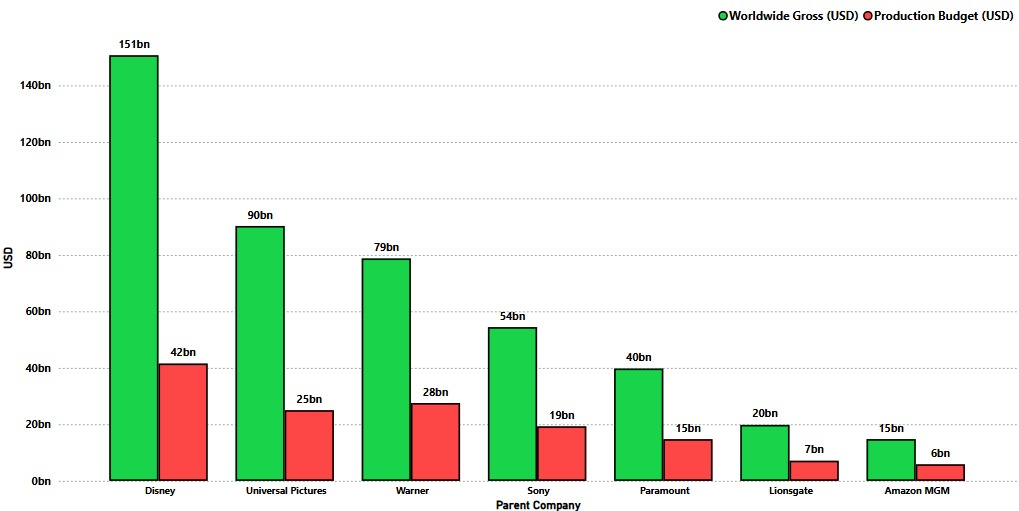

**Comment**: This chart highlights the financial performance of major film studios over several decades, comparing their total production budgets with total revenues. Disney clearly leads the industry, with the highest revenue and budget, reflecting its dominance and investment in blockbuster franchises.
Universal and Warner Bros. follow closely, showing strong returns and consistent output. Sony, Paramount, and Lionsgate operate on smaller budgets but still generate significant revenue, with Lionsgate showing particularly efficient returns despite its scale.

**`NOTE: The graph was generated using Microsoft Power PI`**

In [ ]:
#filtering out the `Other` value
filtered_df = df[df['parent_company'] != 'Other']

In [ ]:
#grouping the dataframe
grouped_df = filtered_df.groupby('parent_company').agg(
    profit=('profit', 'sum')
).reset_index()

#overview
grouped_df

#the resulted dataframe will be taken to Microsoft Excel to produce a new bar

parent_company        profit
0          Amazon MGM  8.961179e+09
1              Disney  1.092402e+11
2           Lionsgate  1.272351e+10
3           Paramount  2.503985e+10
4                Sony  3.523708e+10
5  Universal Pictures  6.528911e+10
6              Warner  5.131172e+10

**After learning that Disney and Universal Pictures are the most profitable movie production company, lets perform drill down and learn more about their subcompanies.**

In [ ]:
#create the `decade` feature
df['release_date'] = pd.to_datetime(df['release_date'])

df['decade'] = np.floor(df['release_date'].dt.year / 10) * 10

In [ ]:
#filter only movies under Disney
disney_df = df[df['parent_company'] == 'Disney']
UniPic_df = df[df['parent_company'] == 'Universal Pictures']

print("Shape of records belong to Disney:", disney_df.shape)
print("Shape of records belong to Universal Pictures:", UniPic_df.shape)

Shape of records belong to Disney: (541, 34)
Shape of records belong to Universal Pictures: (516, 34)


**Comment**: After getting 541 records of disney movies, and 516 records of universal pictures movies, now we have to filter the feature `Production/Financing Companies` to extract the subcompanies within the parent company.

In [ ]:
#define the priority order explicitly
priority_order = ['Pixar', 'Marvel', 'Lucasfilm', '20th Century', 'Walt Disney']

#the subcompanies in the dataframe appear in different ways.
disney_labels = {
    'Marvel': [
        'Marvel Studios', 'Marvel Entertainment'
    ],
    'Pixar': [
        'Disney-Pixar', 'Pixar'
    ],
    'Lucasfilm': [
        'Lucasfilm'
    ],
    '20th Century': [
        '20th Century Fox', '20th Century Studios', 'Twentieth Century Fox',
        'Twentieth Century-Fox Productions', 'Fox 2000 Pictures',
        'Fox Searchlight Pictures', 'Searchlight Pictures'
    ],
    'Walt Disney': [
        'Walt Disney Pictures', 'Walt Disney Animation Studios', 'Disney',
        'Walt Disney Japan', 'DisneyToon Studios', 'Disney Nature'
    ]
}

#flatten the variants for easier matching
replacement_map = {}
for label, variants in disney_labels.items():
    for variant in variants:
        replacement_map[variant.lower()] = label

#function to extract all matched affiliates
def extract_prioritized_affiliate(company_str):
    companies = [c.strip().lower() for c in company_str.split(',')]

    matched_labels = []
    for company in companies:
        for pattern, label in replacement_map.items():
            if pattern in company:
                matched_labels.append(label)

    #return the highest-priority match
    for label in priority_order:
        if label in matched_labels:
            return label

#to remove error
disney_df = disney_df.copy()

#apply the function, and .explode() to remove the list!
disney_df['disney_subcompany'] = disney_df['Production/Financing Companies'].apply(extract_prioritized_affiliate)

In [ ]:
#define the priority order explicitly
universal_priority_order = ['Illumination', 'DreamWorks', 'Blumhouse', 'Focus Features', 'Working Title', 'Universal Pictures']

#the subcompanies in the dataframe appear in different ways.
universal_labels = {
    'Illumination': [
        "Illumination Entertainment"
    ],
    'DreamWorks': [
        "DreamWorks Animation", "Amblin Entertainment"
    ],
    'Focus Features': [
        "Focus Features"
    ],
    'Working Title': [
        "Working Title Films"
    ],
    'Blumhouse': [
        "Blumhouse"
    ],
    'Universal Pictures': [
        "Universal Pictures", "Universal Pictures International", "Universal 1440 Entertainment"
    ]
}

#flatten the variants for easier matching
universal_replacement_map = {}
for label, variants in universal_labels.items():
    for variant in variants:
        universal_replacement_map[variant.lower()] = label

#function to extract all matched affiliates
def extract_universal_affiliate(company_str):
    companies = [c.strip().lower() for c in company_str.split(',')]
    matched_labels = []
    for company in companies:
        for pattern, label in universal_replacement_map.items():
            if pattern in company:
                matched_labels.append(label)
    for label in universal_priority_order:
        if label in matched_labels:
            return label

#to remove error
UniPic_df = UniPic_df.copy()

#apply the function, and .explode() to remove the list!
UniPic_df['subcompanies'] = UniPic_df['Production/Financing Companies'].apply(extract_universal_affiliate)

In [ ]:
print("Records that did not find a match (disney):", disney_df.isna().sum().sum())
print("Records that did not find a match (Universal Picture):", UniPic_df.isna().sum().sum())

#drop the missing values (did not find a match)
UniPic_df = UniPic_df.dropna(subset=('subcompanies'))
disney_df = disney_df.dropna(subset=('disney_subcompany'))

Records that did not find a match (disney): 3
Records that did not find a match (Universal Picture): 0


In [ ]:
#prepare the disney dataset for visualization
#grouping the dataframe based in the companies extracted
grouped_df = disney_df.groupby('disney_subcompany').agg(
    num_movies=('disney_subcompany', 'count'),
    revenue=('Worldwide Gross (USD)', 'sum'),
    budget=('Production Budget (USD)', 'sum')
).reset_index()

#create the profit feature
grouped_df['profit'] = grouped_df['revenue'] - grouped_df['budget']

#overview
grouped_df

disney_subcompany  num_movies       revenue       budget        profit
0      20th Century         312  4.543223e+10  13017145600  3.241508e+10
1         Lucasfilm          17  1.194475e+10   2831100000  9.113652e+09
2            Marvel          47  3.553355e+10   8332300000  2.720125e+10
3             Pixar          26  1.689820e+10   4113500000  1.278470e+10
4       Walt Disney         136  3.937054e+10  12925650000  2.644489e+10

In [ ]:
#create treemap
fig = px.treemap(
    grouped_df,
    path=[px.Constant("All Disney Subcompanies"), 'disney_subcompany'],
    values='num_movies',
    title='🏰 Number of Movies by Disney Subcompanies',
    color='num_movies',
    color_continuous_scale='Blues',

    #the data shown in hover
    custom_data=['revenue', 'budget', 'profit', 'num_movies'],

    #hover title
    hover_name='disney_subcompany',

    #remove the title from hover (it is already in the title)
    hover_data={
        'disney_subcompany': False,
    }
)

fig.update_traces(
    hovertemplate=(
        "<b>%{label}</b><br><br>" +
        "Total revenue: $%{customdata[0]:,.0f}<br>" +
        "Total budget: $%{customdata[1]:,.0f}<br>" +
        "Total profit: $%{customdata[2]:,.0f}<br>"
        "Number of movies: %{customdata[3]}<extra></extra>"
    )
)

fig.show()

**Comment**:
- 20th Century stands out as the largest contributor in terms of movie count, having released 312 films. Walt Disney takes second place with 136 movies. Interestingly, despite producing fewer films, Walt Disney generated nearly the same revenue as 20th Century, with 6 billion dollars less. This highlights a clear case of quality over quantity.

- Marvel Studio Made only 47 movies, and manages to exceed Walt Disney (recall, made 136 movies) in profits by 1 billion dollars, and 5 billion dollars shorter than 20th Century (recall, made 312 movies).

- This makes Marvel Studio havs the highest Return Of Investment (ROI).

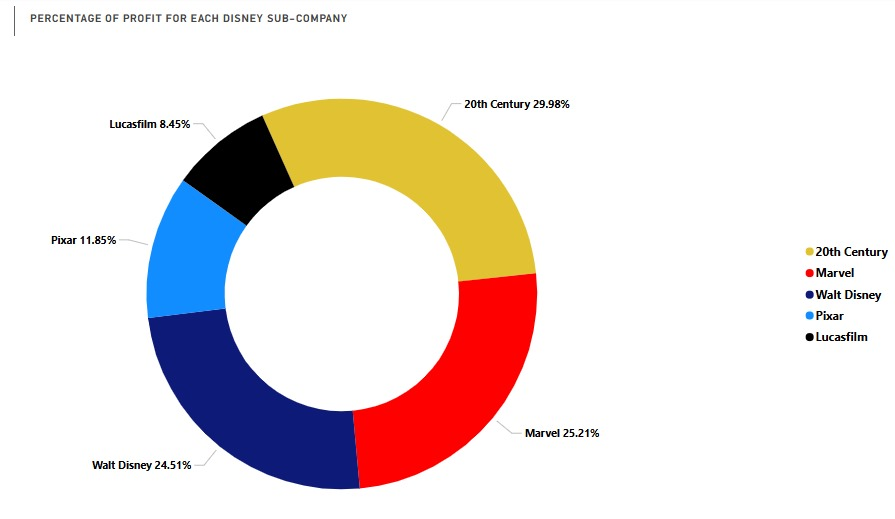

**Comments**:
- Although Marvel has produced fewer movies (47 movies) compared to 20th Century and Walt Disney, it stands out as one of the efficient studios of disney, delivering the second highest profit.

- Pixar and Lucasfilm also perform exceptionally well supporting the idea of storytelling. Their profit is less compaired to other subcompanies however, they have the smallest number of movies, with Pixar produced 26 movies, and Lucasfilms 17 movies.

- Walt Disney (main studio) contributes a large chunk, but its efficiency is less, likly because of mix of film types.

- 20th Century has biggest profit returns, but also has the largest number of releases suggesting quantity over quality issue.

**`NOTE: The graph was generated using Microsoft Power PI`**

In [ ]:
#prepare the Universal Picture dataset for visualization
#grouping the dataframe based in the companies extracted
grouped_df = UniPic_df.groupby('subcompanies').agg(
    num_movies=('subcompanies', 'count'),
    revenue=('Worldwide Gross (USD)', 'sum'),
    budget=('Production Budget (USD)', 'sum')
).reset_index()

#create the profit feature
grouped_df['profit'] = grouped_df['revenue'] - grouped_df['budget']

#overview
grouped_df

subcompanies  num_movies       revenue       budget        profit
0           Blumhouse          63  5.351702e+09    509641000  4.842061e+09
1          DreamWorks          84  2.966202e+10   7200300000  2.246172e+10
2      Focus Features          55  3.138976e+09   1202850000  1.936126e+09
3        Illumination          15  1.069743e+10   1166500000  9.530933e+09
4  Universal Pictures         240  3.496151e+10  12996780000  2.196473e+10
5       Working Title          59  6.455036e+09   1901500000  4.553536e+09

In [ ]:
#create treemap
fig = px.treemap(
    grouped_df,
    path=[px.Constant("All Universal Pictures subcompanies"), 'subcompanies'],
    values='num_movies',
    title='Number of Movies by Universal Pictures subcompanies',
    color='num_movies',
    color_continuous_scale='greens',

    #the data shown in hover
    custom_data=['revenue', 'budget', 'profit', 'num_movies'],

    #hover title
    hover_name='subcompanies',

    #remove the title from hover (it is already in the title)
    hover_data={
        'subcompanies': False,
    }
)

fig.update_traces(
    hovertemplate=(
        "<b>%{label}</b><br><br>" +
        "Total revenue: $%{customdata[0]:,.0f}<br>" +
        "Total budget: $%{customdata[1]:,.0f}<br>" +
        "Total profit: $%{customdata[2]:,.0f}<br>"
        "Number of movies: %{customdata[3]}<extra></extra>"
    )
)

fig.show()

**Comment**:
- Universal Pictures stands out as the most productive subcompany, releasing 240 movies and generating approximitly 22 billion dollars in profit. DreamWorks, while producing significantly fewer films (84), brought in over 22 billion dollars exceeding Universal Pictures earnings.

- Illumination, despite releasing only 15 movies, amassed 9.5 billion dollars in profit, showcasing an exceptional return on investment. In contrast, Focus Features produced 55 films but earned around 2 billion dollars, indicating a lower profit margin.

- Blumhouse and Working Title had similar movie productions, 63 and 59 films respectively but profits are 4.8 billion dollars Vs. 4.5 billion dollars.

- Overall, while Universal Pictures leads in quantity, subcompanies like DreamWorks and Illumination clearly shine in quality and profitability.

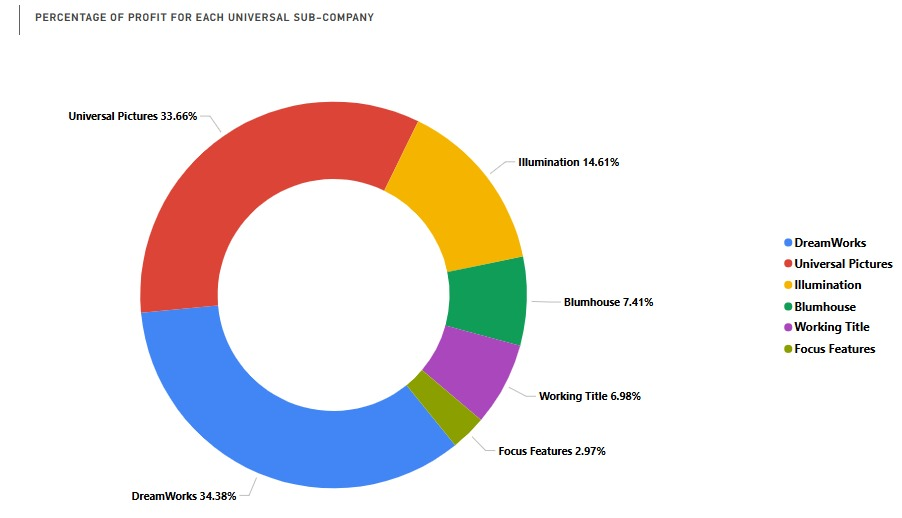

**`NOTE: The graph was generated using Microsoft Power PI`**

##**Question five**: Do top movie studios tend to produce more adult oriented or child friendly content?

the feature `MPAA Rating` contain several unique values under it:

[ 'G' - 'R' - 'PG-13' - 'PG' - 'M/PG' - 'NC-17' - 'Unknown' - 'Not Rated' - 'Open' ]

To make meaningful insight of it, we will aggregate them together into two labels, Underage and Adult.

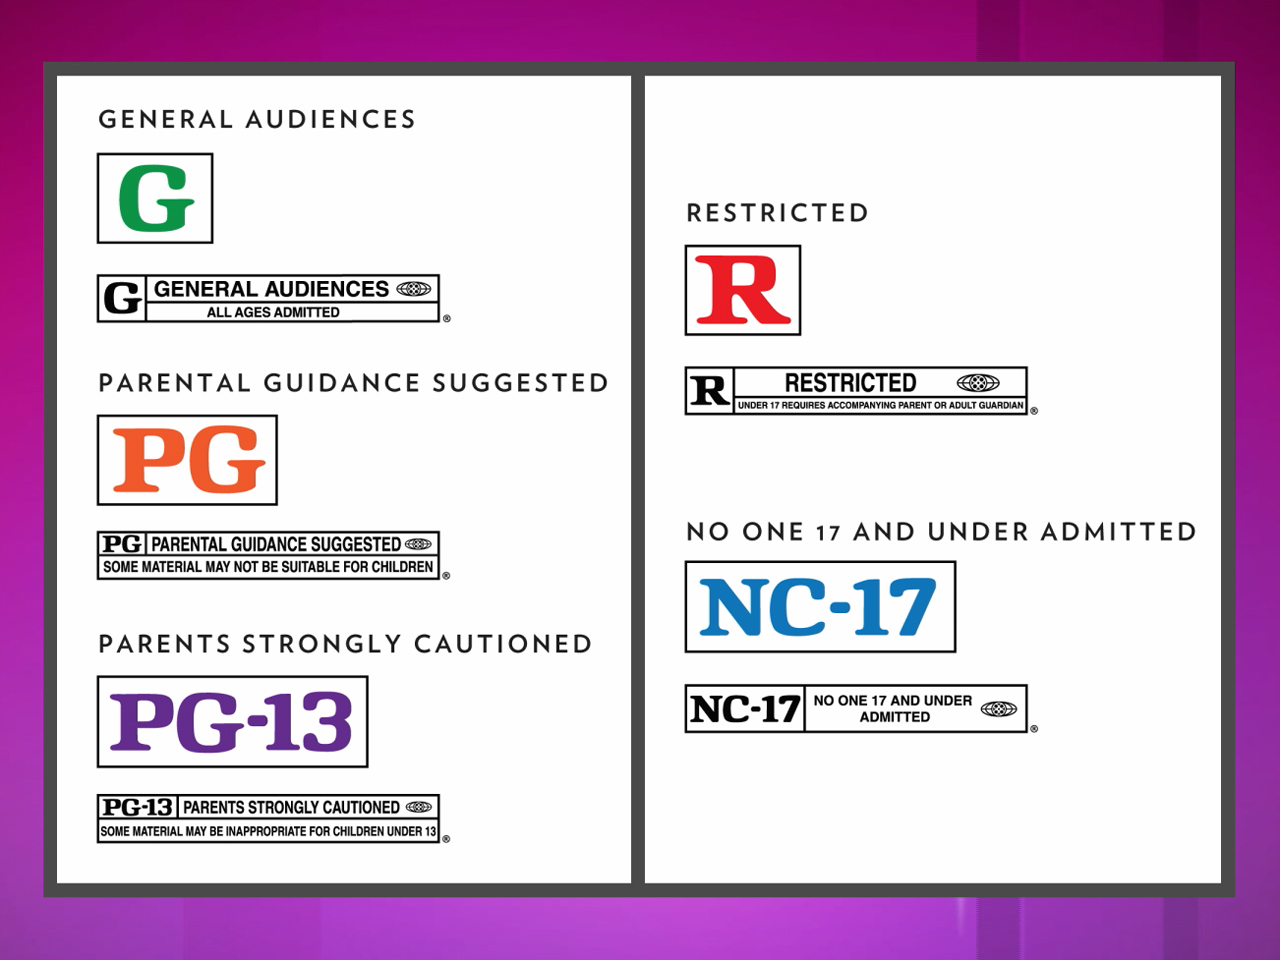

[Source](https://www.today.com/video/mpaa-providing-more-details-on-movie-ratings-26514499777)

How we will class the MPAA ratings?

For Underage (under 17): 'G', 'PG', 'PG-13'

For Adults (18 and above): 'R', 'NC-17', 'M/PG', 'Not Rated'

A question might rise, why 'M/PG' and 'Not Rated' will be classified for adults?

- 'M/PG' means Mature, and most countries set Mature age to 18, meaning those movies are for Adults.

- 'Not Rated' is a bit controversial, as in one hand, some production companies cannot afford to go through the MPAA test, while other companies intentially dont rate their movies to make the audience hooked, [Source](https://www.quora.com/What-does-it-mean-when-the-movie-is-not-rated).

The 'Unknown' will be discarded.

In [ ]:
#the unique values of MPAA separated into two lists
underage_ratings = ['G', 'PG', 'PG-13']
adult_ratings = ['R', 'NC-17', 'Not Rated', 'M/PG', 'Open']

#filter to remove the `Unknown` value
df_filtered = df[df['MPAA Rating'] != 'Unknown'].copy()
df_filtered = df_filtered[df_filtered['parent_company'] != "Other"]

#function to map ratings to simplified the target audence
def categorize_audience(rating):
    if rating in underage_ratings:
        return 'Underage'
    elif rating in adult_ratings:
        return 'Adult'

#call the function (applying it)
df_filtered['Audience Category'] = df_filtered['MPAA Rating'].apply(categorize_audience)

#count movies by parent company and audience category
audience_counts = df_filtered.groupby(['parent_company', 'Audience Category']).size().unstack(fill_value=0)

#convert to percentage
audience_percent = audience_counts.div(audience_counts.sum(axis=1), axis=0) * 100

audience_percent = audience_percent.sort_values(by='Underage', ascending=False)

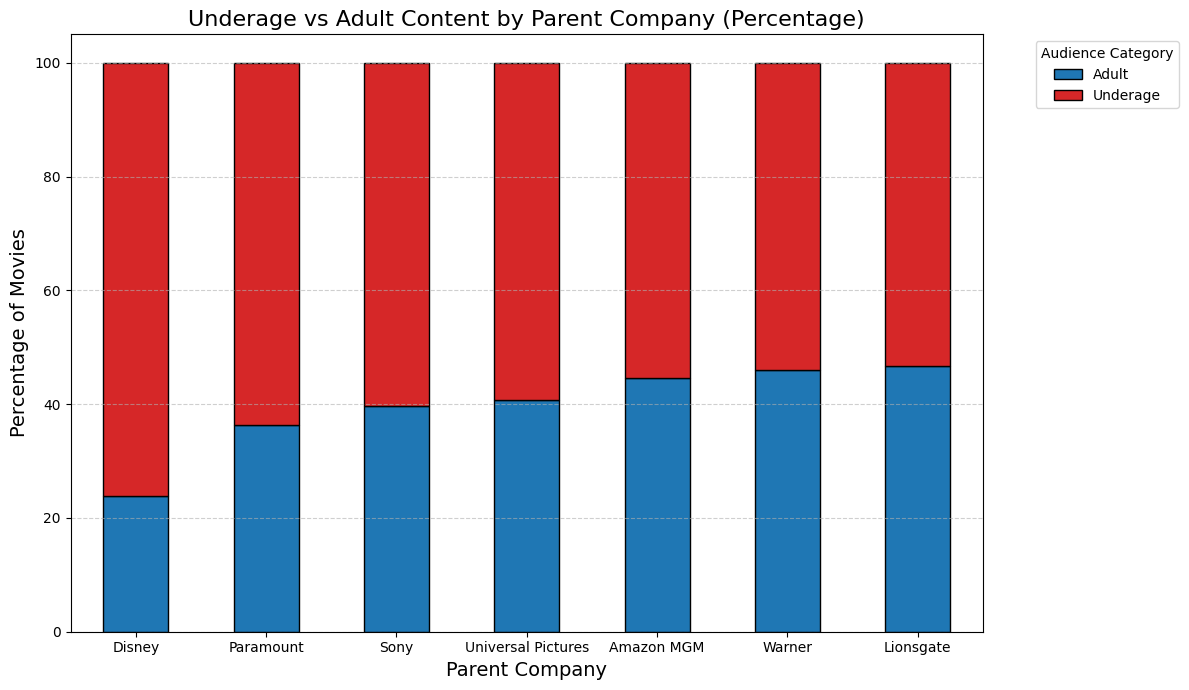

In [ ]:
#ploting
audience_percent.plot(kind='bar', stacked=True, figsize=(12, 7),
                      color=['#1f77b4', '#d62728'], edgecolor='black')

plt.title("Underage vs Adult Content by Parent Company (Percentage)", fontsize=16)
plt.xlabel("Parent Company", fontsize=14)
plt.ylabel("Percentage of Movies", fontsize=14)
plt.xticks(rotation=360)
plt.legend(title="Audience Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Comment**: Disney seems to produce content oriented for children more than to adults. Which tells us firstly that movies created for children are the most profitable of all and secondly, Disney is mainly kids movie production company.

##**Question six**: What are the median vote scores for the top movie production studios?

**`To solve this question, we will be using the second dataset, The Numbers (read from the previous question)`**

In [ ]:
#making a list of the top 6 studios
top_studios = [
    'Disney', 'Universal Pictures', 'Warner',
    'Sony', 'Paramount', 'Amazon MGM'
]

#filter for those studios
df_top = df[df['parent_company'].isin(top_studios)]

#group by studio
studio_scores = df_top.groupby('parent_company').agg({
    'vote_average': 'median',
    'title': 'count'
}).reset_index().rename(columns={
    'vote_average': 'median_score',
    'title': 'movie_count'
})

#normalize movie count for coloring the bars with no bias (0 to 1 scale)
studio_scores['normalized_count'] = (
    (studio_scores['movie_count'] - studio_scores['movie_count'].min()) /
    (studio_scores['movie_count'].max() - studio_scores['movie_count'].min())
)

#sort for better visuals
studio_scores = studio_scores.sort_values(by='median_score', ascending=True)

#plot
fig = px.bar(
    studio_scores,
    x='median_score',
    y='parent_company',
    orientation='h',
    color='movie_count',
    color_continuous_scale='GnBu',
    title='🎥 Major Studios by Median Audience Score',
    labels={
        'parent_company': 'Studio',
        'median_score': 'Median Audience Score',
        'normalized_count': 'Relative Movie Volume'
    },
    hover_data={
        'movie_count': True,
        'median_score': True,
        'normalized_count': False
    }
)

fig.update_layout(
    coloraxis_colorbar=dict(title='Number of Movies'),
    xaxis=dict(range=[
        studio_scores['median_score'].min() - 0.1,
        studio_scores['median_score'].max() + 0.1
    ]),
    height=500,
)

fig.show()

**Question to keep in mind**: Does this chart contribute with the movies revenue?

**Answer**: Yes it does, remember the chart in "Question three", We can see that Disney has the highest revenue which correspond with the highest median audience score!

Additionally, we can observe that since Disney target audience is children, parents must like Disney content, giving very high median rating!

##**Question seven**: What is the Return Of Investment (ROI) for the biggest movie production companies?

**`For this question, use the same data as the one on Question three, The Numbers`**.

In [ ]:
#filtering the dataframe
df_filtered = df[df['parent_company'] != "Other"]

grouped_df = df_filtered.groupby(['parent_company']).agg(
    budget=('Production Budget (USD)', 'sum'),
    revenue=('Worldwide Gross (USD)', 'sum'),
    num_movies=('title', 'count')
).reset_index()

#generate profit
grouped_df['profit'] = grouped_df['revenue'] - grouped_df['budget']

#generate ROI
grouped_df['ROI'] = grouped_df['profit'] / grouped_df['budget']

#dropping the features since we dont need them to produce the coming graph
grouped_df = grouped_df.drop(columns=['budget', 'revenue', 'num_movies', 'profit'])

#overview
grouped_df

parent_company       ROI
0          Amazon MGM  1.539248
1              Disney  2.633899
2           Lionsgate  1.792170
3           Paramount  1.699333
4                Sony  1.835496
5  Universal Pictures  2.613910
6              Warner  1.869472

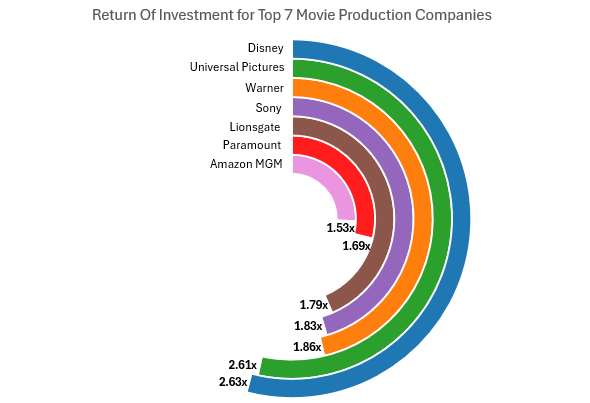

**Comment**: We can see the ROI for all top production companies, with the top companies being "Disney" and "Universal Pictures".

**NOTES**:
- The graph above was generated in Microsoft Excel
- Graph source was [McKinsey](https://www.mckinsey.com/), which is a very well know companies for its out of the box visualizations

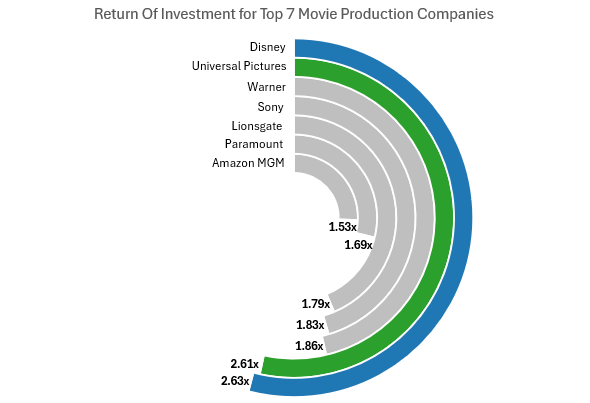

**NOTES**:
- The graph above was generated in Microsoft Excel
- Graph source was [McKinsey](https://www.mckinsey.com/), which is a very well know companies for its out of the box visualizations

In [ ]:
#filter the company "Other" and take the needed decades for visualization
df_filtered = df[df['parent_company'] != "Other"]
df_filtered = df_filtered[df_filtered['decade'].isin([1980, 1990, 2000, 2010])]

studio_colors = {
    'Disney': '#1f77b4',
    'Warner': '#ff7f0e',
    'Universal Pictures': '#2ca02c',
    'Paramount': '#d62728',
    'Sony': '#9467bd',
    'Lionsgate': '#8c564b',
    'Amazon MGM': '#17becf'
}

In [ ]:
#grouping the data on the parent company and decade
grouped_df = df_filtered.groupby(['parent_company', 'decade']).agg(
    budget=('Production Budget (USD)', 'sum'),
    revenue=('Worldwide Gross (USD)', 'sum'),
    num_movies=('title', 'count')
).reset_index()

#generate profit
grouped_df['profit'] = grouped_df['revenue'] - grouped_df['budget']

#generate ROI
grouped_df['ROI'] = grouped_df['profit'] / grouped_df['budget']
grouped_df['ROI_label'] = 'ROI: ' + grouped_df['ROI'].round(2).astype(str) + 'x'

#sorting the grouped dataframe
grouped_df = grouped_df.sort_values(by=['decade', 'ROI'], ascending=[True, False]).reset_index(drop=True)

#overview
grouped_df

parent_company  decade       budget       revenue  num_movies  \
0               Disney  1980.0    334500000  2.809104e+09          14   
1   Universal Pictures  1980.0    506900000  3.259175e+09          27   
2            Paramount  1980.0    417500000  2.459197e+09          30   
3           Amazon MGM  1980.0    459850000  1.954078e+09          31   
4                 Sony  1980.0    405300000  1.491710e+09          22   
5               Warner  1980.0    502940000  1.722829e+09          27   
6            Lionsgate  1990.0     46850000  3.272150e+08           7   
7               Disney  1990.0   3096350000  1.326991e+10          78   
8   Universal Pictures  1990.0   2556030000  8.507474e+09          61   
9            Paramount  1990.0   1759200000  4.364372e+09          49   
10              Warner  1990.0   3664900000  8.530126e+09          94   
11                Sony  1990.0   2211500000  5.049416e+09          68   
12          Amazon MGM  1990.0    993000000  1.815545e+09          26   
13           Lionsgate  2000.0   1196700000  4.416516e+09          50   
14              Disney  2000.0  10756700000  3.718512e+10         195   
15  Universal Pictures  2000.0   8179950000  2.285430e+10         157   
16              Warner  2000.0   8018500000  2.043607e+10         170   
17                Sony  2000.0   7779200000  1.890270e+10         157   
18           Paramount  2000.0   4364450000  9.568396e+09          94   
19          Amazon MGM  2000.0   2167900000  4.665353e+09          64   
20  Universal Pictures  2010.0  10318691000  4.175698e+10         203   
21              Disney  2010.0  20261595600  7.705173e+10         196   
22                Sony  2010.0   6829480000  2.327273e+10         142   
23              Warner  2010.0  10777950000  3.654231e+10         148   
24          Amazon MGM  2010.0   1182900000  3.451419e+09          38   
25           Paramount  2010.0   5551750000  1.589823e+10          78   
26           Lionsgate  2010.0   5165450000  1.417945e+10         128   

          profit       ROI   ROI_label  
0   2.474604e+09  7.397920   ROI: 7.4x  
1   2.752275e+09  5.429621  ROI: 5.43x  
2   2.041697e+09  4.890291  ROI: 4.89x  
3   1.494228e+09  3.249381  ROI: 3.25x  
4   1.086410e+09  2.680508  ROI: 2.68x  
5   1.219889e+09  2.425517  ROI: 2.43x  
6   2.803650e+08  5.984311  ROI: 5.98x  
7   1.017356e+10  3.285663  ROI: 3.29x  
8   5.951444e+09  2.328394  ROI: 2.33x  
9   2.605172e+09  1.480884  ROI: 1.48x  
10  4.865226e+09  1.327520  ROI: 1.33x  
11  2.837916e+09  1.283254  ROI: 1.28x  
12  8.225450e+08  0.828343  ROI: 0.83x  
13  3.219816e+09  2.690579  ROI: 2.69x  
14  2.642842e+10  2.456926  ROI: 2.46x  
15  1.467435e+10  1.793942  ROI: 1.79x  
16  1.241757e+10  1.548615  ROI: 1.55x  
17  1.112350e+10  1.429903  ROI: 1.43x  
18  5.203946e+09  1.192349  ROI: 1.19x  
19  2.497453e+09  1.152015  ROI: 1.15x  
20  3.143829e+10  3.046732  ROI: 3.05x  
21  5.679013e+10  2.802846   ROI: 2.8x  
22  1.644325e+10  2.407687  ROI: 2.41x  
23  2.576436e+10  2.390469  ROI: 2.39x  
24  2.268519e+09  1.917760  ROI: 1.92x  
25  1.034648e+10  1.863643  ROI: 1.86x  
26  9.013998e+09  1.745056  ROI: 1.75x

In [ ]:
#making the sunburst plot
fig = px.sunburst(
    grouped_df[grouped_df['decade'] == 1980],
    path=['parent_company', 'ROI_label'],       #sunburst hierarchy
    values='revenue',                           #sizing is based on `revenue`
    color='parent_company',                     #color by studio
    color_discrete_map=studio_colors,           #set a color map for consistency

    #the data shown in hover
    custom_data=['revenue', 'budget', 'profit', 'num_movies'],

    #hover title
    hover_name='parent_company',

    #remove the title from hover (it is already in the title)
    hover_data={
        'parent_company': False,
    },

    #title for chart (revenue because of the size)
    title='📊 ROI and Revenue of Major Film Studios (1980–1989)'
)

#make the chart bigger
fig.update_layout(
    height=800,
)

#adjust the structure of hover
fig.update_traces(
    hovertemplate=(
        "<b>%{label}</b><br><br>" +
        "Total revenue: $%{customdata[0]:,.0f}<br>" +
        "Total budget: $%{customdata[1]:,.0f}<br>" +
        "Total profit: $%{customdata[2]:,.0f}<br>"
        "Movies: %{customdata[3]}<extra></extra>"
    )
)

fig.show()

In [ ]:
#making the sunburst plot
fig = px.sunburst(
    grouped_df[grouped_df['decade'] == 1990],
    path=['parent_company', 'ROI_label'],       #sunburst hierarchy
    values='revenue',                           #sizing is based on `revenue`
    color='parent_company',                     #color by studio
    color_discrete_map=studio_colors,           #set a color map for consistency

    #the data shown in hover
    custom_data=['revenue', 'budget', 'profit', 'num_movies'],

    #hover title
    hover_name='parent_company',

    #remove the title from hover (it is already in the title)
    hover_data={
        'parent_company': False,
    },

    #title for chart (revenue because of the size)
    title='📊 ROI and Revenue of Major Film Studios (1990–1999)'
)

#make the chart bigger
fig.update_layout(
    height=800,
)

#adjust the structure of hover
fig.update_traces(
    hovertemplate=(
        "<b>%{label}</b><br><br>" +
        "Total revenue: $%{customdata[0]:,.0f}<br>" +
        "Total budget: $%{customdata[1]:,.0f}<br>" +
        "Total profit: $%{customdata[2]:,.0f}<br>"
        "Movies: %{customdata[3]}<extra></extra>"
    )
)

fig.show()

In [ ]:
#making the sunburst plot
fig = px.sunburst(
    grouped_df[grouped_df['decade'] == 2000],
    path=['parent_company', 'ROI_label'],       #sunburst hierarchy
    values='revenue',                           #sizing is based on `revenue`
    color='parent_company',                     #color by studio
    color_discrete_map=studio_colors,           #set a color map for consistency

    #the data shown in hover
    custom_data=['revenue', 'budget', 'profit', 'num_movies'],

    #hover title
    hover_name='parent_company',

    #remove the title from hover (it is already in the title)
    hover_data={
        'parent_company': False,
    },

    #title for chart (revenue because of the size)
    title='📊 ROI and Revenue of Major Film Studios (2000–2009)'
)

#make the chart bigger
fig.update_layout(
    height=800,
)

#adjust the structure of hover
fig.update_traces(
    hovertemplate=(
        "<b>%{label}</b><br><br>" +
        "Total revenue: $%{customdata[0]:,.0f}<br>" +
        "Total budget: $%{customdata[1]:,.0f}<br>" +
        "Total profit: $%{customdata[2]:,.0f}<br>"
        "Movies: %{customdata[3]}<extra></extra>"
    )
)

fig.show()

In [ ]:
#making the sunburst plot
fig = px.sunburst(
    grouped_df[grouped_df['decade'] == 2010],
    path=['parent_company', 'ROI_label'],       #sunburst hierarchy
    values='revenue',                           #sizing is based on `revenue`
    color='parent_company',                     #color by studio
    color_discrete_map=studio_colors,           #set a color map for consistency

    #the data shown in hover
    custom_data=['revenue', 'budget', 'profit', 'num_movies'],

    #hover title
    hover_name='parent_company',

    #remove the title from hover (it is already in the title)
    hover_data={
        'parent_company': False,
    },

    #title for chart (revenue because of the size)
    title='📊 ROI and Revenue of Major Film Studios (2010–2019)'
)

#make the chart bigger
fig.update_layout(
    height=800,
)

#adjust the structure of hover
fig.update_traces(
    hovertemplate=(
        "<b>%{label}</b><br><br>" +
        "Total revenue: $%{customdata[0]:,.0f}<br>" +
        "Total budget: $%{customdata[1]:,.0f}<br>" +
        "Total profit: $%{customdata[2]:,.0f}<br>"
        "Movies: %{customdata[3]}<extra></extra>"
    )
)

fig.show()

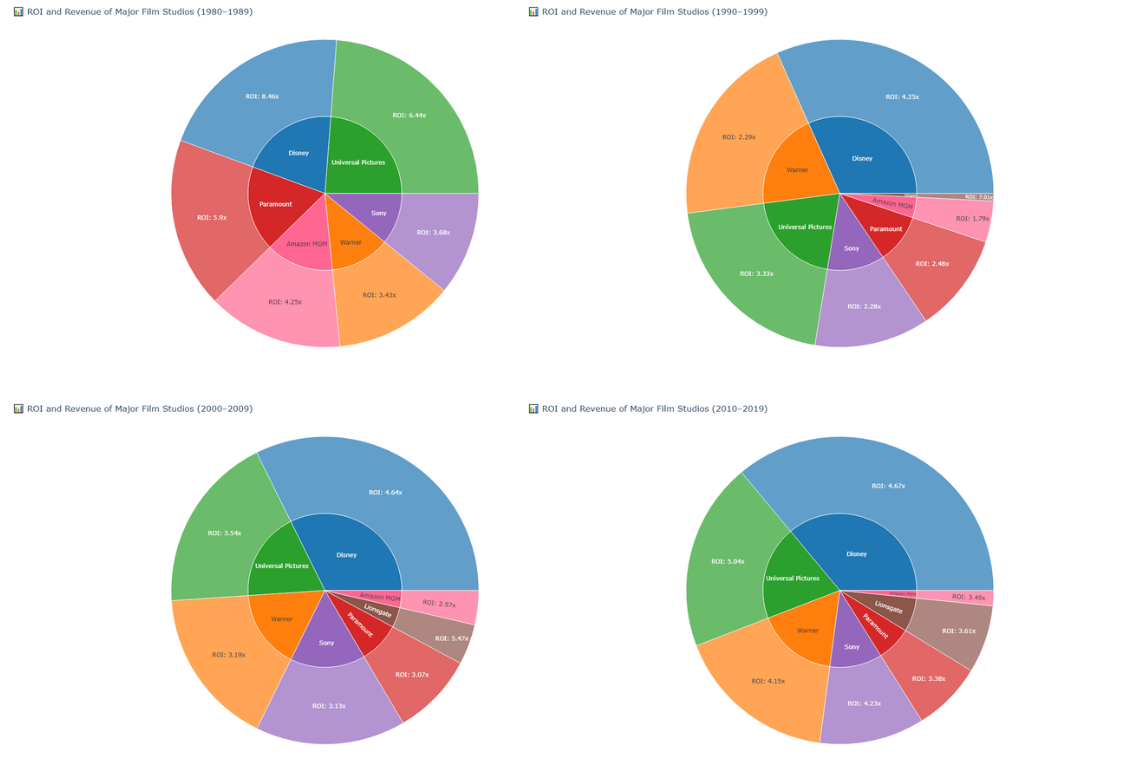

**Comment**: Disney generates the highest revenue among film companies, making it the most profitable overall. Its main competitor is Universal Pictures. Although the return on investment (ROI) for both Disney and Universal is relatively similar, Disney invests more heavily in movie production, which ultimately leads to greater overall profits.

##**Question eight**: Should companies release movies during official holiday days or not?

**`For this question, we used The Numbers dataset`**.

In [ ]:
#read the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/Cleaned Datasets/TheNumbers_Merged_&_Cleaned_&_Preprocessed.csv')

#overview
df.head(1)

title release_date  Production Budget (USD)  Domestic Gross (USD)  \
0  Sweet Charity   1969-04-01                 20000000             8000000.0   

   Worldwide Gross (USD)  Opening Weekend (USD) MPAA Rating  \
0              8000000.0              7297694.0           G   

   Running Time (minutes)          Source    Genre Production Method  \
0                   149.0  Based on Movie  Musical       Live Action   

          Creative Type Production/Financing Companies  vote_average  \
0  Contemporary Fiction     Fryer Carr and Harris              6.731   

   vote_count  adult  popularity   main_country   simplified_companies  \
0        65.0  False       8.359  United States  Fryer Carr and Harris   

  holidays_name  is_holiday  num_of_production_companies  opening_theaters  \
0    No Holiday           0                       1.0                  3.0   

   max_theaters  average_run_duration_weeks  decade_start decade_of_movie  \
0         339.5                       3.0            1960       1960-1969   

       profit  profit_abs  year  dot_size  gross_to_budget_ratio  
0 -12000000.0  12000000.0  1969  5.066997                    0.4

In [ ]:
#getting the frequency of values under `is_holiday'
holidays_count = df['is_holiday'].value_counts()

#overview
holidays_count

is_holiday
0    5185
1     242
Name: count, dtype: int64

In [ ]:
data = {
    'Non-holiday': 5185,
    'Holiday': 242
}

#normalize the data to 100 blocks for clarity
total = sum(data.values())
normalized_data = {k: round(v / total * 100) for k, v in data.items()}

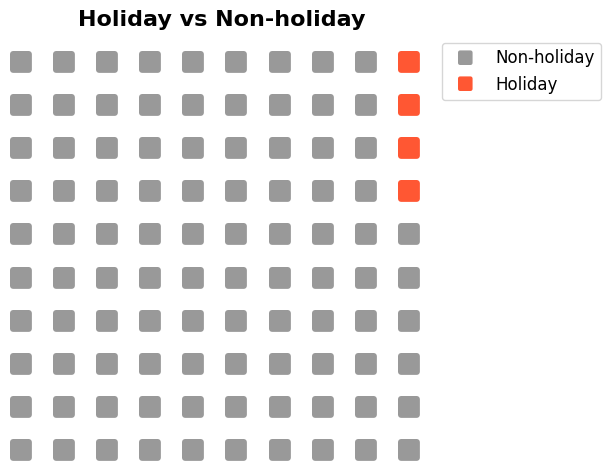

In [ ]:
#creating a waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,  #10x10 grid
    values=normalized_data,
    colors=["#999999", "#FF5733"],
    icons='square',
    icon_size=18,
    icon_legend=True,
    legend={
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1),
        'fontsize': 12
    },
    title={
        'label': 'Holiday vs Non-holiday',
        'loc': 'center',
        'fontsize': 16,
        'fontweight': 'bold'
    }
)

plt.tight_layout()
plt.show()

The first question that cameup to us, are movies released during official country holiday make more profit than no official holiday?

Logically speaking, during **News year** people usually tend to go outside, for Burj Khalifa for example, but not for movie theaters.

**`this assumption was before the analysis`**

So we beleive that profits should be less for movies released during holidays.

**Problem**: The number of movies released during the holiday was around the 300 mark records, however, the non-holiday releases were over 5000 records. This is UNFAIR comparison, BIAS.

**Solution**: We took the same holiday records, and compaired them with 6 different unique records from the non-holiday records.

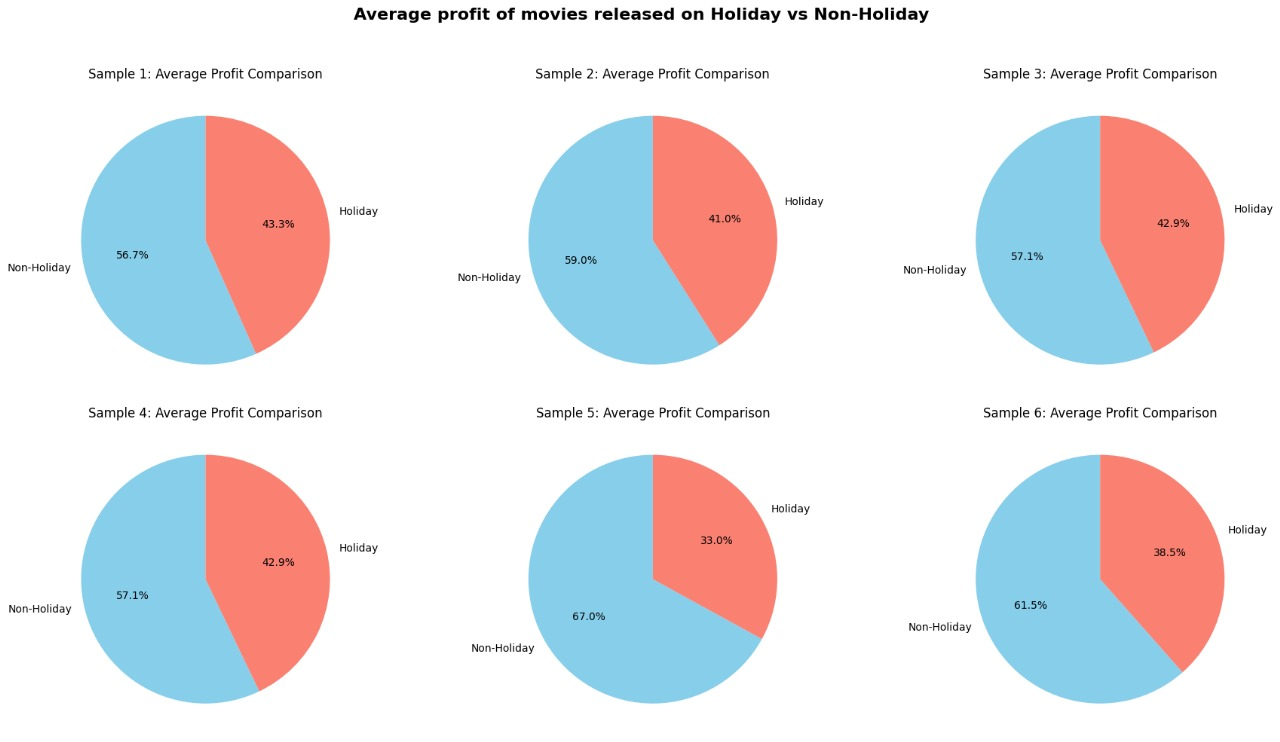

**Comment**: Looking at the graph, we can see that releasing a movie during holiday usually leads to less profits!


**`NOTE: The graph was generated using Microsoft Power PI`**

##**Question nine**: What is the most profitable month and day to release a movie on?

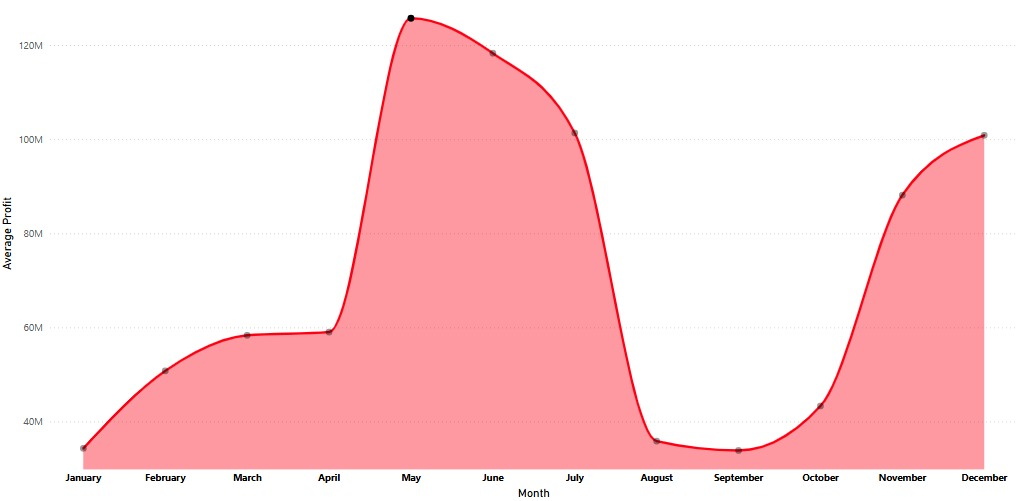

**Comment**: We can observe that May is the most profitable month to release a movie on. But, what part of may? Is it the end, middle, or last of May? Lets invistigate further.

**`NOTE: The graph was generated using Microsoft Power PI`**

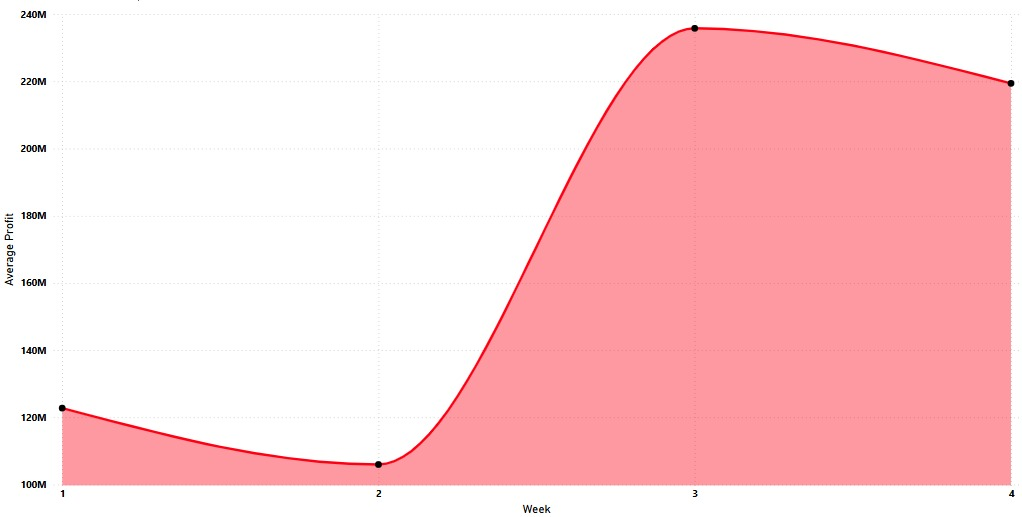

**Comment**: After drilling down, we can clearly see that the third weed onward is the most profitable period to release a movie. But what days are suggested in particular?

**`NOTE: The graph was generated using Microsoft Power PI`**

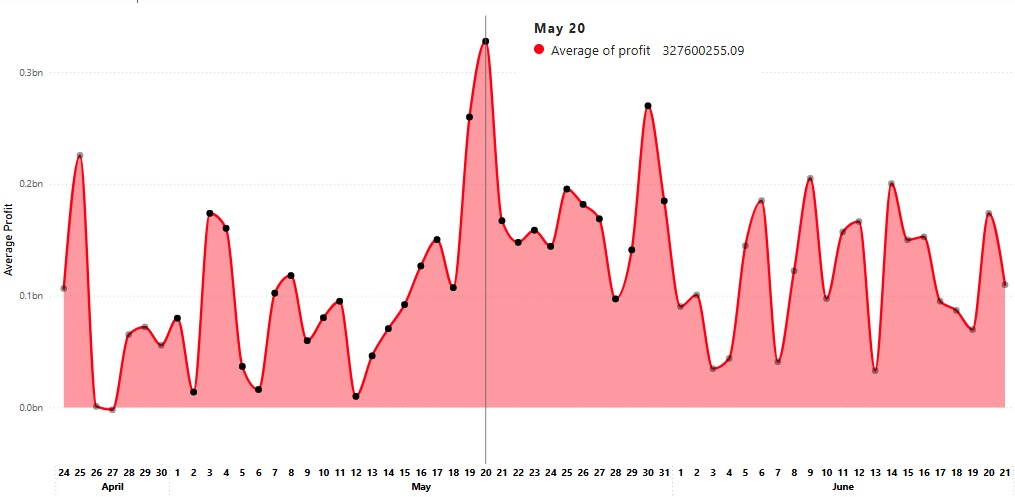

**Comment**: We can observe that 20th, and 30th of May offers the biggest profits.


**`NOTE: The graph was generated using Microsoft Power PI`**

##**Question ten**: In general, does the movies budget and revenue increase with time? Is it a profitable relationship?

**`To solve this question, we will use The Numbers dataset`**.

In [ ]:
#reading the cleaned The Numbers dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/Cleaned Datasets/TheNumbers_Merged_&_Cleaned_&_Preprocessed.csv')

#small overview
df.head(1)

title release_date  Production Budget (USD)  Domestic Gross (USD)  \
0  Sweet Charity   1969-04-01                 20000000             8000000.0   

   Worldwide Gross (USD)  Opening Weekend (USD) MPAA Rating  \
0              8000000.0              7297694.0           G   

   Running Time (minutes)          Source    Genre Production Method  \
0                   149.0  Based on Movie  Musical       Live Action   

          Creative Type Production/Financing Companies  vote_average  \
0  Contemporary Fiction     Fryer Carr and Harris              6.731   

   vote_count  adult  popularity   main_country   simplified_companies  \
0        65.0  False       8.359  United States  Fryer Carr and Harris   

  holidays_name  is_holiday  num_of_production_companies  opening_theaters  \
0    No Holiday           0                       1.0                  3.0   

   max_theaters  average_run_duration_weeks  decade_start decade_of_movie  \
0         339.5                       3.0            1960       1960-1969   

       profit  profit_abs  year  dot_size  gross_to_budget_ratio  
0 -12000000.0  12000000.0  1969  5.066997                    0.4

In [ ]:
#change the dtype of `release_date`
df['release_date'] = pd.to_datetime(df['release_date'])

#generating a feature `decade_of_movie`, will help us in visualizing this question
df['decade_start'] = (np.floor(df['release_date'].dt.year / 10) * 10).astype(int)
df['decade_of_movie'] = df['decade_start'].astype(str) + '-' + (df['decade_start'] + 9).astype(str)

#generate `profit` feature
df['profit'] = df['Worldwide Gross (USD)'] - df['Production Budget (USD)']

In [ ]:
#filter the movie
df = df[df['release_date'] < pd.Timestamp('2025-01-1')]

In [ ]:
#make a plot here for avg budget, revenue, and profit

#grouping the data based on the `decade_of_movie`
grouped_df = df.groupby('decade_of_movie').agg({
    'Production Budget (USD)': ['mean'],
    'Worldwide Gross (USD)': ['mean'],
    'profit': ['mean'],
    'decade_of_movie': ['count']
}).reset_index()

#flatten MultiIndex columns
grouped_df.columns = ['decade_of_movie', 'budget_mean', 'revenue_mean', 'profit_mean', 'movie_count']

In [ ]:
#exclude the first record (because it is very small compared with others)
#small in terms of record numbers, and revenue.
grouped_df = grouped_df.iloc[1:]

In [ ]:
grouped_df

decade_of_movie   budget_mean  revenue_mean   profit_mean  movie_count
1       1970-1979  9.572209e+06  7.689524e+07  6.732303e+07          104
2       1980-1989  1.574344e+07  7.699742e+07  6.125398e+07          253
3       1990-1999  3.188240e+07  9.346684e+07  6.158444e+07          783
4       2000-2009  3.665431e+07  9.503644e+07  5.838213e+07         1898
5       2010-2019  4.116510e+07  1.334705e+08  9.230543e+07         2035
6       2020-2029  6.869501e+07  1.829757e+08  1.142807e+08          342

**NOTE**: In order to use plotly effeciently, we have to "melt" the grouped dataframe.

Why? because plotly prefers the long formatted data!

In [ ]:
#.melt() is a pandas function
df_melted = grouped_df.melt(
    id_vars=['decade_of_movie', 'movie_count'], #the feature that we want to leave unchanged
    value_vars=['budget_mean', 'profit_mean', 'revenue_mean'], #those features will transfer into rows
    var_name='Financials', #the features that are now rows, what is there column name?
    value_name='Amount' #the features that are not mentioned, what is there column name?
)

#rename Financials for better legend labels
df_melted['Financials'] = df_melted['Financials'].map({
    'budget_mean': 'Budget',
    'profit_mean': 'Profit',
    'revenue_mean': 'Revenue'
})

In [ ]:
#removing the last decade 2020-2029 (the current decade)
df_melted = df_melted[df_melted["decade_of_movie"] != "2020-2029"]

In [ ]:
#overview
df_melted

decade_of_movie  movie_count Financials        Amount
0        1970-1979          104     Budget  9.572209e+06
1        1980-1989          253     Budget  1.574344e+07
2        1990-1999          783     Budget  3.188240e+07
3        2000-2009         1898     Budget  3.665431e+07
4        2010-2019         2035     Budget  4.116510e+07
6        1970-1979          104     Profit  6.732303e+07
7        1980-1989          253     Profit  6.125398e+07
8        1990-1999          783     Profit  6.158444e+07
9        2000-2009         1898     Profit  5.838213e+07
10       2010-2019         2035     Profit  9.230543e+07
12       1970-1979          104    Revenue  7.689524e+07
13       1980-1989          253    Revenue  7.699742e+07
14       1990-1999          783    Revenue  9.346684e+07
15       2000-2009         1898    Revenue  9.503644e+07
16       2010-2019         2035    Revenue  1.334705e+08

In [ ]:
#plot using Plotly Express
fig = px.bar(
    df_melted[df_melted['Financials'] != "Profit"],  #Exclude Profit, we dont want to create "Profit" bar
    x='decade_of_movie',
    y='Amount',
    color='Financials',
    barmode='group',
    color_discrete_map={
        'Budget': '#fc4747',
        'Revenue': '#19d44b'
    },
    labels={'decade_of_movie': 'Decade', 'Amount': 'Sales in USD (Millions)'},
    title='🎬 Decade-by-Decade Comparison of Average Budget, Revenue, and Profit for Movies',

    hover_name='Financials',           #show a bold name on the hover

    #playing with the hover
    hover_data={'movie_count': True,
                'Financials': False}
)

#add profit line
fig.add_trace(
    go.Scatter(
        x=df_melted[df_melted['Financials'] == "Profit"]['decade_of_movie'],
        y=df_melted[df_melted['Financials'] == "Profit"]['Amount'],
        mode='lines+markers',
        name='Profit',
        line=dict(color='#429e22', width=3, dash='dash'),
        marker=dict(size=8, symbol='circle')
    )
)

# Update layout for font size and limits
fig.update_layout(
    xaxis_title='Decade',
    yaxis_title='Sales in USD (Millions)',
    font=dict(size=14),
    yaxis=dict(range=[0, 2E+8]),
    bargap=0.2,
    bargroupgap=0.05
)


fig.update_traces(
    marker=dict(line=dict(color='black', width=1.5))
)

fig.show()

**Comment**: Using `The Numbers` dataset, we observe a decade-by-decade increase in both movie revenues and budgets. Additionally, movie profits have been steadily rising over the decades.

**NOTE**: This dataset is small and it does not fully cover the world trend, but it is enough to show trends.

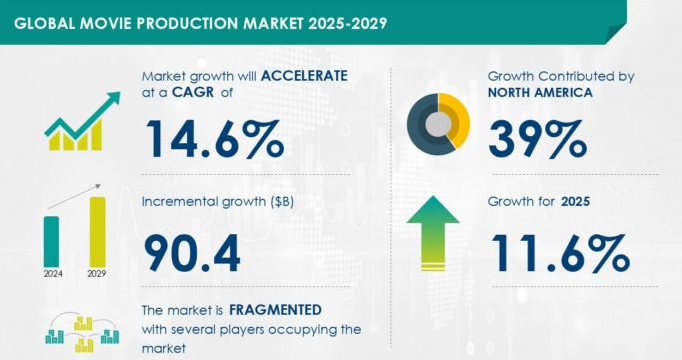

**Comment**: According to a [study](https://www.thatericalper.com/2025/02/02/global-movie-production-market-set-to-surge-with-digital-expansion-and-streaming-boom/?utm_source=chatgpt.com), movies are expected to grow even more in the current decade.

In [ ]:
#feature engineering
df['profit_abs'] = df['profit'].abs()   #used for the dot size (dot size cannot be negative)

df['year'] = df['release_date'].dt.year

In [ ]:
#play with `profit_abs` to generate the desired desired size range
df['dot_size'] = 5 + (20 - 5) * (
    (df['profit_abs'] - df['profit_abs'].min()) /
    (df['profit_abs'].max() - df['profit_abs'].min())
)

#filter the dataframe
df = df[df['year'] >= 2000]

In [ ]:
fig = px.scatter(
    df,
    y='Worldwide Gross (USD)',
    x='Production Budget (USD)',
    color='profit',                    #color points based on profit
    size='dot_size',                   #size points by profit
    size_max=20,                       #set the maximum size
    hover_name='title',                #show `movie title` on hover

    animation_frame='year', #slider by decade

    title='🎬 Movies Budget, Revenue, and Profit by Year',

    labels={'Worldwide Gross (USD)': 'Worldwide Gross in USD (Billion)', 'Production Budget (USD)': 'Production Budget in USD (Millions)'}, #x-axis and y-axis label

    color_continuous_scale='RdYlGn',   #Red-Yellow-Green

    hover_data={'dot_size': False},    #remove the `dot_size` from hover
)

#cahnge the slider label
fig.layout.sliders[0].currentvalue.prefix = 'Decade: '

#add extra space before the origin point (to show the dot in full)
fig.update_layout(
    yaxis=dict(range=[-df['Worldwide Gross (USD)'].max() * 0.05, 3.5e9]),  # Extra space on left
    xaxis=dict(range=[-df['Production Budget (USD)'].max() * 0.05, 5e8]),   # Extra space on bottom
    coloraxis=dict(cmin=-1e5, cmax=0.5e8)
)

#initialize the size of graph
fig.update_layout(height=640, width=1280)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000  # Frame duration (ms)
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 250  # Transition duration (ms)

fig.show()

**Comment**: We read a [study](https://scholars.fhsu.edu/cgi/viewcontent.cgi?article=1430&context=sacad#:~:text=Having%20income%20as%20our%20dependent,release%20month%2C%20and%20release%20year) that found a relationship between a movie’s budget (independent variable) and its revenue (dependent variable). While budget plays a role in predicting revenue, the study suggests that other factors, such as number of actors also contribute to a movie’s financial success. This study reinforces our observation that higher budgets tend to correlate with higher revenue, though the relationship is influenced by additional factors. Notably, in the lower right section of the visualization (marked by red and yellow bubbles), we can see outliers, movies with exceptionally high production budgets but low revenue. These cases suggest that while a large budget can contribute to success, it does not guarantee profitability, further emphasizing the complexity of revenue prediction in the film industry.

##**Question eleven**: What other features can we add to increase the correlation with budget and revenue?

**`To solve this question, we will use The Numbers dataset`**.

Firstly, we want to test with the feature `popularity`. This feature indicates how people were motivated to watch the movie pre-release. Will this feature create a strong connection with the budget and revenue?
Looking at the chart below, when popularity increases, it does not really mean that the revenue would increase nor budget, which suggest a very weak correlation, if it even exit.



In [ ]:
#read the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/Cleaned Datasets/TheNumbers_Merged_&_Cleaned_&_Preprocessed.csv')

#overview
df.head(1)

title release_date  Production Budget (USD)  Domestic Gross (USD)  \
0  Sweet Charity   1969-04-01                 20000000             8000000.0   

   Worldwide Gross (USD)  Opening Weekend (USD) MPAA Rating  \
0              8000000.0              7297694.0           G   

   Running Time (minutes)          Source    Genre Production Method  \
0                   149.0  Based on Movie  Musical       Live Action   

          Creative Type Production/Financing Companies  vote_average  \
0  Contemporary Fiction     Fryer Carr and Harris              6.731   

   vote_count  adult  popularity   main_country   simplified_companies  \
0        65.0  False       8.359  United States  Fryer Carr and Harris   

  holidays_name  is_holiday  num_of_production_companies  opening_theaters  \
0    No Holiday           0                       1.0                  3.0   

   max_theaters  average_run_duration_weeks  decade_start decade_of_movie  \
0         339.5                       3.0            1960       1960-1969   

       profit  profit_abs  year  dot_size  gross_to_budget_ratio  
0 -12000000.0  12000000.0  1969  5.066997                    0.4

In [ ]:
fig = px.scatter_3d(df,
                    x='Production Budget (USD)',
                    y='popularity',
                    z='Worldwide Gross (USD)',
                    color='profit',
                    size='dot_size',
                    title='Relationship Between Budget, Popularity, and Revenue in Movies',
                    color_continuous_scale='RdYlGn',

                    hover_name='title',

                    labels={
                        'Production Budget (USD)': 'Budget',
                        'Worldwide Gross (USD)': 'Revenue'
                    },

                    hover_data={'dot_size': False,
                                'title': False,
                               }
                    )

fig.update_layout(scene=dict(
    xaxis_title='Budget',
    yaxis_title='Popularity',
    zaxis_title='Revenue'
))

fig.show()

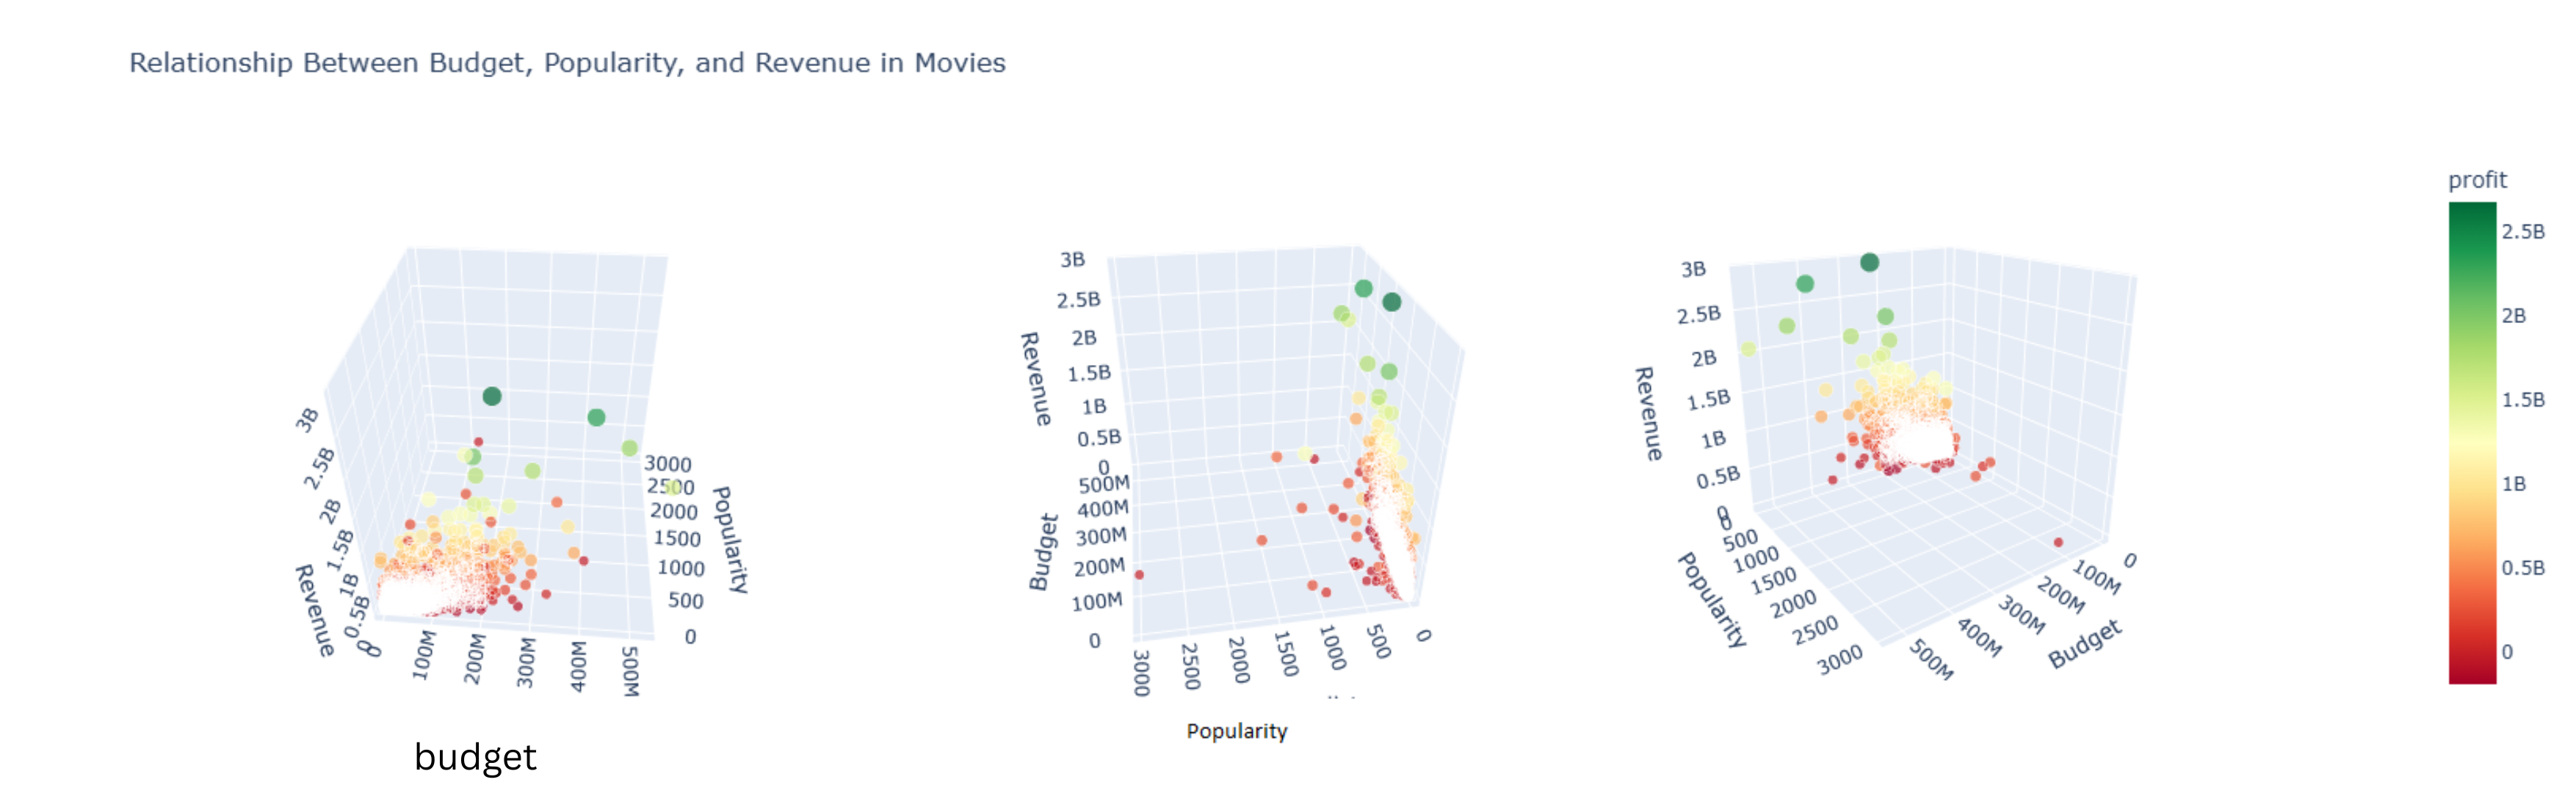

**Comment**: The addition of `Popularity` seems to be not a good affect to determine the movie revenue, as we belive many movies `popularity` scale is small.

However, we can see clearly that the correlation with revenue and budget is low.

Because of the issue of many values closer to 0, we decided here to make a bar chart to see in a clear manner.

In [ ]:
#Since `popularity` is a numerical feature, we decided to make bins out of it
#pandas has a function .qcut() that automatically bin a numerical feature!


df['popularity_binned'] = pd.qcut(
    df['popularity'],
    q=3,
    labels=["Low", "Medium", "High"],
    duplicates='drop'  # Ensure bins are unique
)

#why median()???  Because the data is right skewed.
grouped_df = df.groupby('popularity_binned', observed=False).agg(
    num_movies=('title', 'count'),
    median_revenue=('Worldwide Gross (USD)', 'mean')
).reset_index()

#create percentage feature
grouped_df['percent_of_total'] = (
    grouped_df['median_revenue'] / grouped_df['median_revenue'].sum() * 100
)

#overview
grouped_df

popularity_binned  num_movies  median_revenue  percent_of_total
0               Low        1809    3.352850e+07          9.852675
1            Medium        1809    8.424198e+07         24.755323
2              High        1809    2.225280e+08         65.392002

In [ ]:
midpoint = df['popularity'].median()

#create an interactive bar chart
fig = px.bar(
    grouped_df, x='popularity_binned', y='median_revenue',
    title='Movie popularity against revenue',
    labels={'median_revenue': 'Revenue', 'popularity_binned': 'Popularity level'},

    hover_name='popularity_binned',
    hover_data={'popularity_binned': False, 'num_movies': True},

    color='median_revenue', #the features we want to make colors for
    color_continuous_scale='oranges', #set the color
    color_continuous_midpoint=midpoint, #set the midpoint (for better color startpoint)
    range_color=[0, grouped_df['median_revenue'].max()]
)

#adding the number of movies on the top of bars
fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))

#enhancements for the graph (bigger font)
fig.update_layout(
    xaxis=dict(title_font=dict(size=18), tickfont=dict(size=16)),
    yaxis=dict(range=[0, 3e+8], title_font=dict(size=18), tickfont=dict(size=16)),
    title=dict(font=dict(size=22))
)

#show the figure
fig.show()

**Comment**: While the 3D chart shows minimal correlation with revenue, we can see here clearly some progress, when popularity increases, revenue increases!

However, this is an accurate representation since popular is actually numerical points not binned, but it shows that some correlation exist!

NOTE: Later in ML phase, we will notice that `popularity` has just over 0.2 correlation with revenue. So its a week positive correlation.

How about the “Opening Weekend (USD)”, does it affect the connection with budget and revenue? is it a positive relationship?

In [ ]:
fig = px.scatter_3d(df,
                    x='Production Budget (USD)',
                    y='Opening Weekend (USD)',
                    z='Worldwide Gross (USD)',
                    color='profit',
                    size='dot_size',
                    title='Relationship Between Budget, Opening Weekend, and Revenue in Movies',
                    color_continuous_scale='RdYlGn',

                    hover_name='title',

                    labels={
                        'Production Budget (USD)': 'Budget',
                        'Opening Weekend (USD)': 'Opening Weekend',
                        'Worldwide Gross (USD)': 'Revenue'
                    },

                    hover_data={'dot_size': False,
                                'title': False,
                               }
                    )

fig.update_layout(scene=dict(
    xaxis_title='Budget',
    yaxis_title='Opening Weekend',
    zaxis_title='Revenue'
))

fig.show()

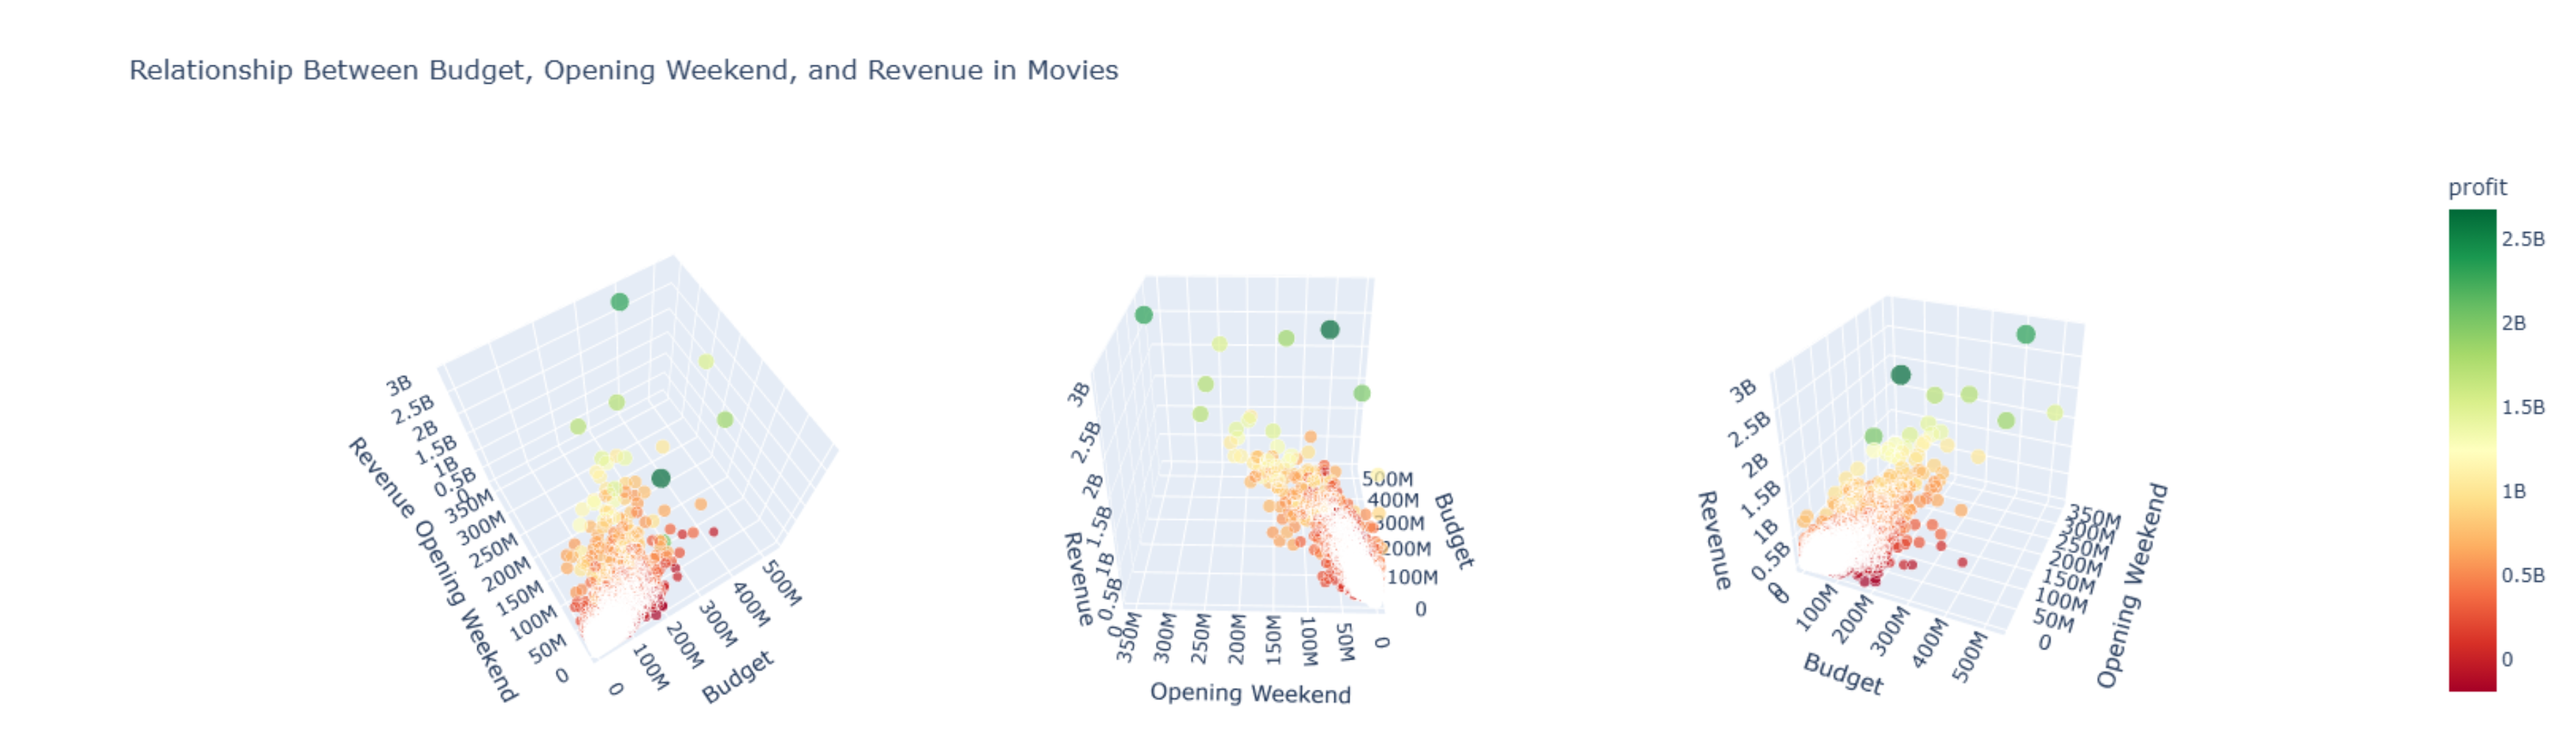

**Comment**: Looking at the above chart, we can observe that “Opening Weekend (USD)” has a positive correlation with budget and revenue. Which indicates that if the movie was released in theaters, and got in the first week good revenue, then the overall revenue of movie will be positive. Additionally, this feature will be valuable for us in the machine learning phase.

##**Question twelve**: After learning that movies on average are profitable, what about Box Offices?

**`We used the full box office dataset to uncover insights related to this question`**

**BEFORE MOVING FURTHER**:

Using this dataset, we can see that we have data upto 2024 inclusive. Because the year 2025 is still not yet completed.

This way, we cannot create a decade for 2020-2029 because we do not have data.

**UNLESS!**

We searched for a website that forecat the values between the period.

We search for many websites and stumpled abone the following [website](https://www.reportprime.com/box-office-r15738):

According to the auther, the sales are rising with a factor of **7.00%** every year starting from 2023.

This rate was from the CAGR formula:

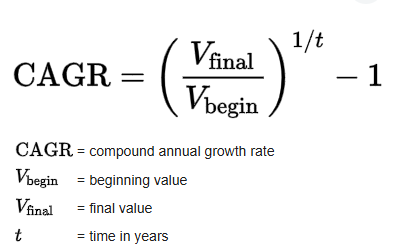

In [ ]:
#read the cleaned version
df = pd.read_csv('/content/drive/MyDrive/Datasets/Cleaned Datasets/FullBoxOffice.csv')

In [ ]:
#filter the dataframe by execluding the 2025 year
df = df[df['year'] < 2025]

#we still did not finish this year, hence we won't calculate it

**Comment**: The year 2024 has a revenue of $22.73 billion.

Using this information from the [website](https://www.reportprime.com/box-office-r15738), we can calculate the revenue of the coming years:

- 2025: $24.32 billion

- 2026: $26.03 billion

- 2027: $27.85 billion

- 2028: $29.80 billion

- 2029: $31.88 billion

So the total forecasted value is approximatly: $139.88 billion.

In [ ]:
# Group the dataframe
grouped_df = df.groupby('decade').agg(
    number_of_movies=('title', 'count'),
    total_worldwide=('worldwide', 'sum')
).reset_index()

#adding the custom forecasted value
grouped_df.loc[grouped_df['decade'] == '2020-2029', 'forecasted_worldwide'] = 139880000000

# Melt the grouped dataframe
df_melted = grouped_df.melt(
    id_vars=['decade', 'number_of_movies'],
    value_vars=['total_worldwide', 'forecasted_worldwide'],
    var_name='Financial',
    value_name='Amount'
)

In [ ]:
#overview
print("grouped dataframes")
display(grouped_df)

#space
print()
print()
print()

print("Long format (best for plotly)")
display(df_melted)

grouped dataframes


decade  number_of_movies  total_worldwide  forecasted_worldwide
0  1980-1989              2058     3.779707e+10                   NaN
1  1990-1999              3105     7.989779e+10                   NaN
2  2000-2009              5770     2.240974e+11                   NaN
3  2010-2019              7660     3.472385e+11                   NaN
4  2020-2029              1074     1.004529e+11          1.398800e+11




Long format (best for plotly)


decade  number_of_movies             Financial        Amount
0  1980-1989              2058       total_worldwide  3.779707e+10
1  1990-1999              3105       total_worldwide  7.989779e+10
2  2000-2009              5770       total_worldwide  2.240974e+11
3  2010-2019              7660       total_worldwide  3.472385e+11
4  2020-2029              1074       total_worldwide  1.004529e+11
5  1980-1989              2058  forecasted_worldwide           NaN
6  1990-1999              3105  forecasted_worldwide           NaN
7  2000-2009              5770  forecasted_worldwide           NaN
8  2010-2019              7660  forecasted_worldwide           NaN
9  2020-2029              1074  forecasted_worldwide  1.398800e+11

**Comment**: Above is the comparison between long and short format!

To visualize this question, we can go for a simple plot. However, we want to add another level of insights.

In [ ]:
#prepare data, make them into two separate dataframes
total_data = df_melted[df_melted['Financial'] == 'total_worldwide']
forecast_data = df_melted[df_melted['Financial'] == 'forecasted_worldwide']

#create figure
fig = go.Figure()

#add total worldwide bars (solid)
fig.add_trace(go.Bar(
    x=total_data['decade'],     #x-axis data
    y=total_data['Amount'],     #y-axis data
    name='Total Worldwide',     #legend
    marker_color='#19d44b',     #color of bar (revenue)
    marker_line_color='black',  #just like edge color
    marker_line_width=2,        #how thick the edge is
    customdata=total_data[['number_of_movies']],  # Attach extra data for hover
    hovertemplate="%{y}<br>Movies: %{customdata[0]}"
))

#add forecasted worldwide bars with pattern
fig.add_trace(go.Bar(
    x=forecast_data['decade'],
    y=forecast_data['Amount'],
    name='Forecasted Worldwide',
    marker_color='#82faa2',      #color of bar (forecasted)
    marker_line_color='black',
    marker_line_width=2,
    marker_pattern_shape="/",    #adding a pattern
    marker_pattern_size=8,       #pattern density
    marker_pattern_solidity=0.3  #how big is the pattern
))

#update layout for "stacked bars"
fig.update_layout(
    barmode='stack',
    title='🎬 Decade-by-Decade Comparison of Worldwide Box Office Revenue',
    xaxis_title='Decade',
    yaxis_title='Sales in USD (Billions)',
    font=dict(size=14),
    yaxis=dict(range=[0, 4e11]),
    hovermode='x unified'
)

fig.show()

**Comment**: Over the past 50 years, Box Office revenue has shown a huge increase. However, from 2020 to 2029, the revenue appears to decline. Expert analysis suggests that it is expected to reach approximately 240 billion dollars in the current decade (2020 - 2029), compared to around 374 billion dollars in the previous decade (2010 - 2019).

Various factors could contribute to this trend, but further investigation is necessary to determine the exact causes.

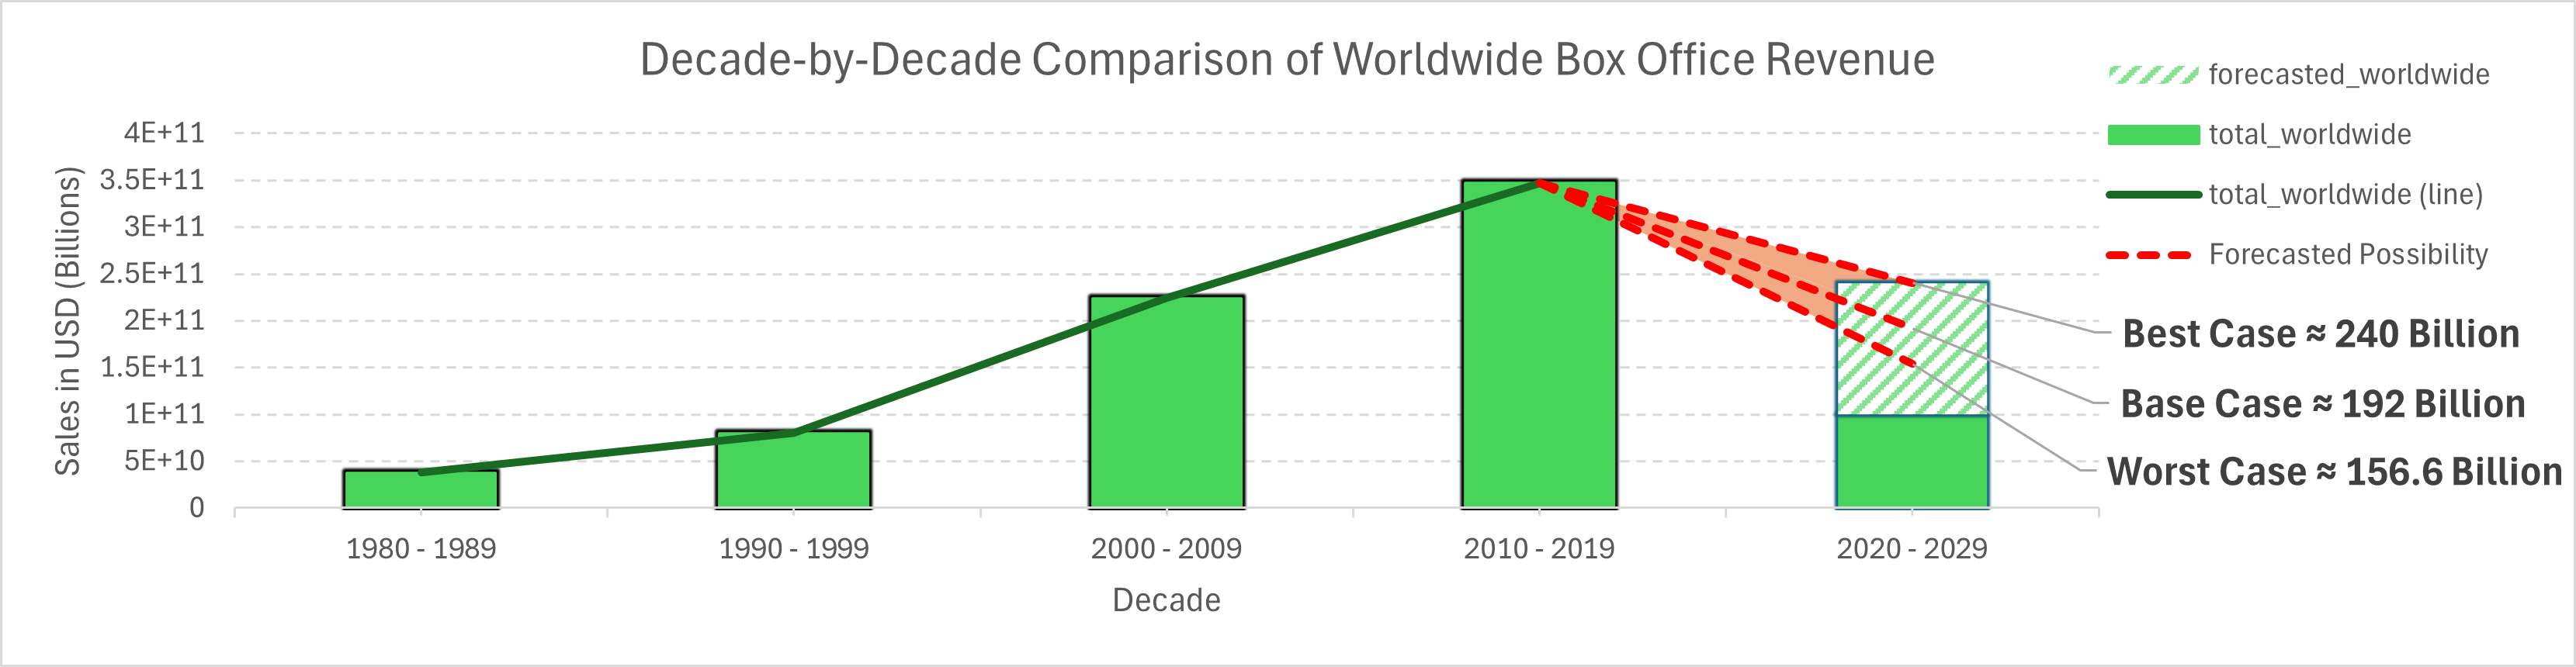

**Comment**: We have implemented the "fan chart" to approximate where the black line might land for the Best Case, Base Case, and Worst Case.

How did we generate the Cases?
1. Got the approximate Box Office revenue in the period 2020 - 2024. We used them to generate the [Best Case, Base Case, Worst Case]

2. Best Case was The highest forecasted revenue (top of the 2020-2029 bar) which is the result of (2020 - 2024) decade revenue + (2025 - 2029) decade forecasted revenue. Hence, Best Case was approximitly 240 Billion dollars.

3. Base Case must be less than the Best Case. With confedence set to 80%, then Base Case is equal to Best Case * 80%.

4. Worst Case must be less than the Base Case. With confedence set to 80%, then Worst Case is equal to Base Case * 80%.

**NOTE**:
- The graph above was generated in Microsoft Excel, we tried to implement it using python but with no resourses, it was almost impossible.

**Further investigation regarding the above visualization (performing drill down)**

In [ ]:
#recall
df.head()

title  worldwide  year  Opening Weekend (USD)  \
0                Heart Beat   954046.0  1980                    NaN   
1            One-Trick Pony   843215.0  1980                    NaN   
2    Those Lips, Those Eyes   804713.0  1980                    NaN   
3  A Small Circle of Fri...   766760.0  1980                    NaN   
4             Leo and Loree   517988.0  1980                    NaN   

  Production/Financing Companies  popularity holidays_name  is_holiday  \
0                       NaN              NaN           NaN         NaN   
1                       NaN              NaN           NaN         NaN   
2                       NaN              NaN           NaN         NaN   
3                       NaN              NaN           NaN         NaN   
4                       NaN              NaN           NaN         NaN   

   decade_start decade_of_movie  profit  profit_abs  dot_size     decade  
0           NaN             NaN     NaN         NaN       NaN  1980-1989  
1           NaN             NaN     NaN         NaN       NaN  1980-1989  
2           NaN             NaN     NaN         NaN       NaN  1980-1989  
3           NaN             NaN     NaN         NaN       NaN  1980-1989  
4           NaN             NaN     NaN         NaN       NaN  1980-1989

In [ ]:
#we have to perform groupby by year
grouped_df = df.groupby('year').agg(
    number_of_movies=('title', 'count'),
    total_worldwide=('worldwide', 'sum')
).reset_index()

#filter the data and keep what we want
grouped_df = grouped_df[(grouped_df['year'] > 2016) & (grouped_df['year'] < 2024)]

#reset the index
grouped_df = grouped_df.reset_index(drop=True)

#convert the data into long format using .melt()
df_melted = grouped_df.melt(
    id_vars=['year', 'number_of_movies'],
    value_vars=['total_worldwide'],
    var_name='Financials',
    value_name='Amount'
)

In [ ]:
#overview
df_melted

year  number_of_movies       Financials        Amount
0  2017               817  total_worldwide  3.758134e+10
1  2018               910  total_worldwide  3.846079e+10
2  2019               597  total_worldwide  3.932636e+10
3  2020               227  total_worldwide  9.154352e+09
4  2021               224  total_worldwide  1.965140e+10
5  2022               208  total_worldwide  2.137330e+10
6  2023               213  total_worldwide  2.754204e+10

In [ ]:
#making the plot
fig = px.bar(
    df_melted,
    x='year',
    y='Amount',
    color='Financials',
    color_discrete_map={'total_worldwide': '#19d44b'},
    labels={'year': 'Year', 'Amount': 'Sales in USD (Billion)'},
    title='🎬 Year-by-Year Comparison of Worldwide Box Office Revenue',

    hover_name='year',           #Make the year bold on the hover

    #playing with the hover
    hover_data={'number_of_movies': True,
                'year': False}
)

#add edge color
fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))

#update layout for font size and limits
fig.update_layout(
    font=dict(size=14),
    yaxis=dict(range=[0, 5E+10]),
    transition_duration=800
)

fig.show()

**Comment**: We can clearly see that box office revenue was steadily increasing. However, when 2020 hit, sales dropped significantly!

In [ ]:
#making the plot
fig = px.bar(
    df_melted,
    x='year',
    y='Amount',
    color='Financials',
    color_discrete_map={'total_worldwide': '#19d44b'},
    labels={'year': 'Year', 'Amount': 'Sales in USD (Billion)'},
    title='🎬 Year-by-Year Comparison of Worldwide Box Office Revenue',

    hover_name='year',           #Make the year bold on the hover

    #playing with the hover
    hover_data={'number_of_movies': True,
                'year': False}
)

#add edge color
fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))

#add line chart
fig.add_trace(
    go.Scatter(
        x=df_melted['year'],
        y=df_melted['Amount'],
        mode='lines+markers',
        name='total_worldwide (line)',
        line=dict(color='#2c6b28', width=3, dash='dash'),
        marker=dict(size=8, symbol='circle')
    )
)

#update layout for font size and limits
fig.update_layout(
    font=dict(size=14),
    yaxis=dict(range=[0, 5E+10]),
    transition_duration=800
)

fig.show()

**Comment**: After 2020, the box office began regaining its momentum. But why 2020 was a bad performing year?

In [ ]:
#assign gray color to all bars except 2020 bar, we make it red
df_melted['Financials'] = df_melted['year'].apply(lambda x: "COVID-19 Impact" if x == 2020 else "Other Years")

#making the plot
fig = px.bar(
    df_melted,
    x='year',
    y='Amount',
    color='Financials',
    color_discrete_map={'COVID-19 Impact': '#fc4747', 'Other Years': '#aeb2b8'},
    labels={'year': 'Year', 'Amount': 'Sales in USD (Billion)'},
    title='🎬 Year-by-Year Comparison of Worldwide Box Office Revenue',

    hover_name='year',           #Make the year bold on the hover

    #playing with the hover
    hover_data={'number_of_movies': True,
                'year': False}
)

#add edge color
fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))

#highlight 2020 bar with annotation
fig.add_annotation(
    x=2020, y=df_melted[df_melted['year'] == 2020]['Amount'].values[0],
    text="📉 COVID-19 Impact", showarrow=True,
    arrowhead=4, arrowsize=1.2, arrowcolor="red",
    font=dict(size=16, color="red"),
    bgcolor="white", bordercolor="black"
)

#update layout for font size and limits
fig.update_layout(
    font=dict(size=14),
    yaxis=dict(range=[0, 5E+10]),
    transition_duration=800
)

fig.show()

**Comment**: In 2020, COVID-19 hit, shutting down theaters and delaying major movie releases. Box office revenue dropped to historic lows as people stayed home. As lock-down lifted, theaters reopened, and big movies returned to the big screen. Audiences slowly came back, and by the mid-2020s, the box office was recovering.

In [ ]:
#assign gray color to all bars except 2020 bar, we make it red
df_melted['Financials'] = df_melted['year'].apply(
    lambda x: "COVID-19 Impact" if x == 2020 else
              "Post-COVID" if x in [2021, 2022, 2023] else "Pre-COVID"
)

#making the plot
fig = px.bar(
    df_melted,
    x='year',
    y='Amount',
    color='Financials',
    color_discrete_map={'Pre-COVID': '#aeb2b8', 'COVID-19 Impact': '#fc4747', 'Post-COVID': '#19d44b'},
    labels={'year': 'Year', 'Amount': 'Sales in USD (Billion)'},
    title='🎬 Year-by-Year Comparison of Worldwide Box Office Revenue',

    hover_name='year',           #Make the year bold on the hover

    #playing with the hover
    hover_data={'number_of_movies': True,
                'year': False}
)

#filter the DataFrame to include only rows from 2020 onwards
df_filtered = df_melted[df_melted['year'] >= 2020]

#add line chart
fig.add_trace(
    go.Scatter(
        x=df_filtered['year'],
        y=df_filtered['Amount'],
        mode='lines+markers',
        name='total_worldwide (line)',
        line=dict(color='#2c6b28', width=3, dash='dash'),
        marker=dict(size=8, symbol='circle')
    )
)

#add edge color
fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))

#update layout for font size and limits
fig.update_layout(
    font=dict(size=14),
    yaxis=dict(range=[0, 5E+10])
)

fig.show()

**Comment**: However, Box Office still did not gain its popularity back, why? Thats because of movie streaming websites, on top of them Netflix. Streaming websites had become a major player, changing how movies were released and watched.

Lets check another dataset holding information regarding streaming websites.

##**Question thirteen**: How streaming websites affected box office revenue?

When COVID-19 hit, most businesses shut down or lost a large percentage of their revenue. Surprisingly, this crisis somehow created competitors for box offices, such as Netflix and other movie streaming websites.

To explore this question, We incorporating a Netflix stock market dataset.

**Limitation**:
- Netflix stock dataset only starts from 2018 upto 2022.

- We did not find stock dataset related to box office.

**Datasets links**:
- [Netflix stocks dataset](https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction/data)

In [ ]:
#read the netflix stocks dataset
netflix_stocks_df = pd.read_csv('/content/drive/MyDrive/Datasets/Cleaned Datasets/NFLX.csv')

#overview
display(netflix_stocks_df.head(3))

print("\nDataframe shape:", df.shape)

Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   

     Volume  
0  11896100  
1  12595800  
2   8981500


Dataframe shape: (19667, 14)


In [ ]:
#data exploring
netflix_stocks_df['Date'] = pd.to_datetime(netflix_stocks_df['Date'])

print("The earlies date available in this dataset:", netflix_stocks_df['Date'].min())
print("The furthest date available in this dataset:", netflix_stocks_df['Date'].max())

The earlies date available in this dataset: 2018-02-05 00:00:00
The furthest date available in this dataset: 2022-02-04 00:00:00


In [ ]:
#setting the `date` to be the index for better visualization
netflix_stocks_df = netflix_stocks_df.set_index("Date")

In [ ]:
#creating a figure
fig = go.Figure()

#create the line chart
fig.add_trace(go.Scatter(x=netflix_stocks_df.index, y=netflix_stocks_df["Close"], mode='lines', name='Close Price'))

#graph enhancements
fig.update_layout(
    title="📈 Historical Stock Prices for Netflix (2018–2022)",
    xaxis_title="Date",
    yaxis_title="Stock Price in USD",
    xaxis=dict(
        tickformat='%Y-%m',                   #format ticks, include year and month
        tick0='2018-01-01',                   #first tick
        dtick='M3',                           #every 3 months
        range=['2018-01-01', netflix_stocks_df.index.max()]  #start from Jan 1, 2018 to last date
    ),
    yaxis=dict(
        tickprefix="$",
        showgrid=True,
        gridwidth=1,
        gridcolor='LightGray',
        griddash='dash'
    ),
    showlegend=True,
    plot_bgcolor='white'
)

fig.show()

In [ ]:
#creating a figure
fig = go.Figure()

#create the line chart
fig.add_trace(go.Scatter(x=netflix_stocks_df.index, y=netflix_stocks_df["Close"], mode='lines', name='Close Price'))

#highlighting a specific date
fig.add_vline(
    x="2020-01-02",  # The date to highlight
    line_width=2,
    line_dash="dash",
    line_color="red"
)

#adding the text to the highlight
fig.add_annotation(
    x="2020-01-02",
    y=netflix_stocks_df.loc["2020-01-02", "Close"],
    text="📈 COVID-19 Started",
    ax=0,
    ay=-100,
    font=dict(size=14, color="red"),
    bgcolor="white",
    bordercolor="red",
    borderwidth=1
)

#graph enhancements
fig.update_layout(
    title="📈 Historical Stock Prices for Netflix (2018–2022)",
    xaxis_title="Date",
    yaxis_title="Stock Price in USD",
    xaxis=dict(
        tickformat='%Y-%m',                   #format ticks, include year and month
        tick0='2018-01-01',                   #first tick
        dtick='M3',                           #every 3 months
        range=['2018-01-01', netflix_stocks_df.index.max()]  #start from Jan 1, 2018 to last date
    ),
    yaxis=dict(
        tickprefix="$",
        showgrid=True,
        gridwidth=1,
        gridcolor='LightGray',
        griddash='dash'
    ),
    showlegend=True,
    plot_bgcolor='white'
)

fig.show()

**Comment**: COVID-19 took place in China at late 2019, and started to spread on January 2020.

In [ ]:
#creating a figure
fig = go.Figure()

#create the line chart
fig.add_trace(go.Scatter(x=netflix_stocks_df.index, y=netflix_stocks_df["Close"], mode='lines', name='Close Price'))


#highlighting a specific date
fig.add_vline(
    x="2020-03-11",  # The date to highlight
    line_width=2,
    line_dash="dash",
    line_color="red"
)

#adding the text to the highlight (date 2020-03-11)
fig.add_annotation(
    x="2020-03-11",
    y=netflix_stocks_df.loc["2020-03-11", "Close"],
    text="📈 COVID-19 Affect On The Global",
    arrowcolor="red",
    ax=0,
    ay=70,
    font=dict(size=14, color="red"),
    bgcolor="white",
    bordercolor="red",
    borderwidth=1
)

#graph enhancements
fig.update_layout(
    title="📈 Historical Stock Prices for Netflix (2018–2022)",
    xaxis_title="Date",
    yaxis_title="Stock Price in USD",
    xaxis=dict(
        tickformat='%Y-%m',                   #format ticks, include year and month
        tick0='2018-01-01',                   #first tick
        dtick='M3',                           #every 3 months
        range=['2018-01-01', netflix_stocks_df.index.max()]  #start from Jan 1, 2018 to last date
    ),
    yaxis=dict(
        tickprefix="$",
        showgrid=True,
        gridwidth=1,
        gridcolor='LightGray',
        griddash='dash'
    ),
    showlegend=True,
    plot_bgcolor='white'
)

fig.show()

**Comment**: While COVID-19 actually began during January 2020, World Health Organization (WHO) announced [global pandamic](https://www.who.int/director-general/speeches/detail/who-director-general-s-opening-remarks-at-the-media-briefing-on-covid-19---11-march-2020) on March of 2020, making all the companies around the world drop in stock market, Netflix included.

However, Netflix quickly bounced back as more people turned to streaming while staying at home during lockdowns.



In [ ]:
#creating a figure
fig = go.Figure()

#create the line chart
fig.add_trace(go.Scatter(x=netflix_stocks_df.index, y=netflix_stocks_df["Close"], mode='lines', name='Close Price'))


#highlighting a specific date
fig.add_vline(
    x="2022-01-03",  # The date to highlight
    line_width=2,
    line_dash="dash",
    line_color="red"
)

#adding the text to the highlight (date 2020-03-11)
fig.add_annotation(
    x="2022-01-03",
    y=netflix_stocks_df.loc["2022-01-03", "Close"],
    text="📉 Netflix raised their prices",
    arrowcolor="red",
    ax=0,
    ay=200,
    font=dict(size=14, color="red"),
    bgcolor="white",
    bordercolor="red",
    borderwidth=1
)

#graph enhancements
fig.update_layout(
    title="📈 Historical Stock Prices for Netflix (2018–2022)",
    xaxis_title="Date",
    yaxis_title="Stock Price in USD",
    xaxis=dict(
        tickformat='%Y-%m',                   #format ticks, include year and month
        tick0='2018-01-01',                   #first tick
        dtick='M3',                           #every 3 months
        range=['2018-01-01', netflix_stocks_df.index.max()]  #start from Jan 1, 2018 to last date
    ),
    yaxis=dict(
        tickprefix="$",
        showgrid=True,
        gridwidth=1,
        gridcolor='LightGray',
        griddash='dash'
    ),
    showlegend=True,
    plot_bgcolor='white'
)

fig.show()

**Comment**: In January 2022, Netflix raised its subscription prices across the U.S. and Canada, which contributed to a loss of over 200,000 subscribers in the first quarter. This unexpected decline in users led to a sharp drop in investor confidence, causing Netflix stock price to drop.

Sources:
- [Netflix raised their prices](https://www.cnbc.com/select/netflix-price-hike-how-to-save-maximize-subscription/#:~:text=The%20last%20time%20Netflix%20increased,year%20to%20the%20streaming%20service.)

- [Netflix lost 200,000 Subscribers](https://time.com/6198354/netflix-subscribers-loss-second-quarter-future/)

#**Conclusion**

Any intertainment institution decided to follow the hidden trends discovered can assume an increase in their overall revenue by 25%.

Evenmore, the companies can integrate their data and find more actionable insights to increase the revenue further!